# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 25.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

____
offset reward
1.0
____
offset reward
0.999999999945
____
offset reward
0.999999986934
____
offset reward
0.999999948261
____
offset reward
0.999999898896
____
offset reward
0.999999496407
____
offset reward
0.999998321346
____
offset reward
0.999996257465
____
offset reward
0.999993374712
____
offset reward
0.999989504603
____
offset reward
0.999984897901
____
offset reward
0.999979580798
____
offset reward
0.99997519149
____
offset reward
0.999970452797
____
offset reward
0.999965543877
____
offset reward
0.999957854883
____
offset reward
0.99995010097
____
offset reward
0.999942442196
____
offset reward
0.999936197894
____
offset reward
0.999930337791
____
offset reward
0.999925003751
____
offset reward
0.999921136511
____
offset reward
0.999918013411
____
offset reward
0.99991568986
____
offset reward
0.999912720037
____
offset reward
0.999910617018
____
offset reward
0.999909370337
____
offset reward
0.999905140343
____
offset reward
0.999901783373
____
offset reward
0.9998992

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

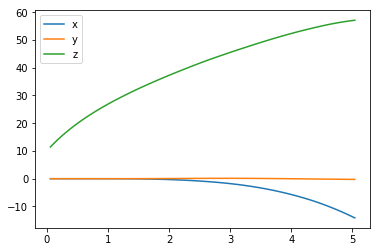

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

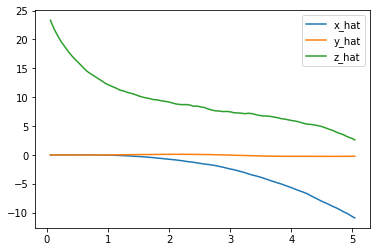

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

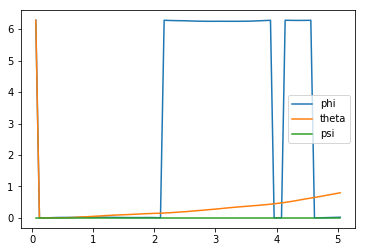

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

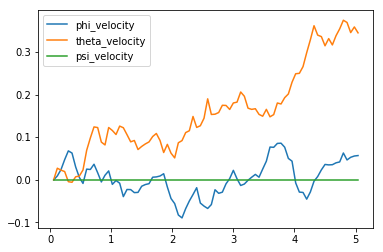

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

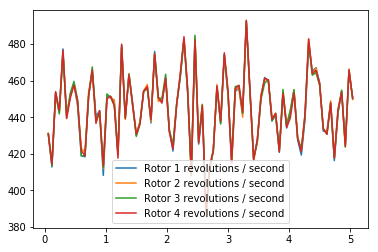

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -1.41362355e+01  -2.57913110e-01   5.71244852e+01   2.15380113e-02
   7.98819553e-01   0.00000000e+00]
[-10.89819285  -0.21864795   2.63299994]
[ 0.05669489  0.34521972  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 5
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

____
offset reward
1.0
____
offset reward
0.999918085989
____
offset reward
0.999764942417
____
offset reward
0.999552342007
____
offset reward
0.999300192179
____
offset reward
0.99901930653
____
offset reward
0.998721006849
____
offset reward
0.998418775621
____
offset reward
0.998123227928
____
offset reward
0.997846725008
____
offset reward
0.997598047932
____
offset reward
0.997388042448
____
offset reward
0.997229729347
____
offset reward
0.997129067446
____
offset reward
0.997096668522
____
offset reward
0.997190559876
____
offset reward
0.997134593701
____
offset reward
0.996928108682
____
offset reward
0.996619373616
____
offset reward
0.996156717024
____
offset reward
0.995453275515
____
offset reward
0.994224339622
____
offset reward
0.992770507126
____
offset reward
0.991164515945
____
offset reward
0.989525577717
____
offset reward
0.987970221075
____
offset reward
0.986652498217
____
offset reward
0.985679035669
____
offset reward
0.98526087288
____
offset reward
0.985320

Episode =    3, score =   2.926 (best =   2.939), noise_scale = 0.2____
offset reward
1.0
____
offset reward
0.999923888277
____
offset reward
0.9997818805
____
offset reward
0.99958497615
____
offset reward
0.999351830184
____
offset reward
0.999092777167
____
offset reward
0.998818507007
____
offset reward
0.99854181706
____
offset reward
0.998272923223
____
offset reward
0.99802362472
____
offset reward
0.997802333979
____
offset reward
0.997619476227
____
offset reward
0.997487291269
____
offset reward
0.997411552039
____
offset reward
0.997402399486
____
offset reward
0.99755629153
____
offset reward
0.995997780589
____
offset reward
0.993616795528
____
offset reward
0.992659261531
____
offset reward
0.99169785118
____
offset reward
0.990731930529
____
offset reward
0.989719664735
____
offset reward
0.988732983517
____
offset reward
0.987768768638
____
offset reward
0.986843231497
____
offset reward
0.98592380602
____
offset reward
0.985005986858
____
offset reward
0.984119204868


This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## Train your agent here.
import sys
from collections import defaultdict

import pandas as pd
import numpy as np

from agents.agent import Agent
from task import Task
import csv

n_episodes = 100;
init_pose = np.array([0., 0., 10., 0., 0., 0.]) #6DOF
init_velocities = np.array([0., 0., 16]) #linear in 3DOF - essential to have some initial velocity
init_angle_velocities = np.array([0., 0., 0.]) #angular in 3DOF
target_pos = np.array([0., 0., 10.]) 
task = Task(init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, target_pos=target_pos)
agent = Agent(task)

best_score = -1000
worst_score = 1000

rewards = defaultdict(list)

for i_episode in range(1, n_episodes+1):
    state = agent.reset_episode()
    cur_score = 0
    while True:
        #debug only
        #print('_________________________')
        #print(i_episode)
        #print(task.sim.pose)
        #print(task.sim.v)
        #print('_________________________')
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        cur_score += reward
        best_score = max(cur_score, best_score)
        worst_score = min(cur_score, worst_score)
        if done:
            
            rewards[i_episode].append(cur_score)
            if i_episode % 50 == 0:
                print('_________________________')
                print(i_episode)
                print(task.sim.pose)
                print(task.sim.v)
                print('_________________________')      
                print("\rEpisode = {:4d}, score = {:7.2f} (high = {:7.2f}, low = {:7.2f})".format(
                    i_episode, cur_score, best_score, worst_score)) 
            break
    sys.stdout.flush()

Using TensorFlow backend.


____
offset reward
1.0
____
offset reward
0.999087378255
____
offset reward
0.997102283324
____
offset reward
0.995210194824
____
offset reward
0.99412882573
____
offset reward
0.995029084813
____
offset reward
0.997535901201
____
offset reward
0.997668279215
____
offset reward
0.995729044737
____
offset reward
0.995981440709
____
offset reward
0.998201886132
____
offset reward
0.997974432173
____
offset reward
0.998256192781
____
offset reward
0.996584014249
____
offset reward
0.995261446711
____
offset reward
0.994933018209
____
offset reward
0.995200138828
____
offset reward
0.996417686186
____
offset reward
0.996838951138
____
offset reward
0.995671730612
____
offset reward
0.99563709842
____
offset reward
0.995015678922
____
offset reward
0.993684148118
____
offset reward
0.993521695285
____
offset reward
0.99474187831
____
offset reward
0.993994764019
____
offset reward
0.993597774323
____
offset reward
0.99381376168
____
offset reward
0.994164781779
____
offset reward
0.99471424

____
offset reward
0.982689455674
____
offset reward
0.981227166123
____
offset reward
0.980431698812
____
offset reward
0.980491983131
____
offset reward
0.981306899392
____
offset reward
0.982656106625
____
offset reward
0.984554202688
____
offset reward
0.985274605585
____
offset reward
0.9840059325
____
offset reward
0.982570354713
____
offset reward
0.981181198177
____
offset reward
0.980202469649
____
offset reward
0.979937947267
____
offset reward
0.980393670007
____
offset reward
0.981417236547
____
offset reward
0.982677289888
____
offset reward
0.983956099257
____
offset reward
0.985088549503
____
offset reward
0.986025822873
____
offset reward
0.986896664793
____
offset reward
0.987860521379
____
offset reward
0.989194072
____
offset reward
0.990790376474
____
offset reward
0.990323298123
____
offset reward
0.990042223855
____
offset reward
0.989758413507
____
offset reward
0.989297949763
____
offset reward
0.988659941107
____
offset reward
0.987920597572
____
offset reward


____
offset reward
0.993255016503
____
offset reward
0.993205895229
____
offset reward
0.993243320678
____
offset reward
0.993533533659
____
offset reward
0.994299773037
____
offset reward
0.995393923379
____
offset reward
0.99516234415
____
offset reward
0.995328955381
____
offset reward
0.99576411519
____
offset reward
0.996565991367
____
offset reward
0.997708802311
____
offset reward
0.998972045639
____
offset reward
0.998577388063
____
offset reward
0.997499869503
____
offset reward
0.996123772166
____
offset reward
0.994894662558
____
offset reward
0.993949065079
____
offset reward
0.993379969988
____
offset reward
0.993215669765
____
offset reward
0.99357686366
____
offset reward
0.994415876346
____
offset reward
0.995137561751
____
offset reward
0.99522504728
____
offset reward
0.994900395538
____
offset reward
0.99476778383
____
offset reward
0.994939692472
____
offset reward
0.994887626705
____
offset reward
0.993984026549
____
offset reward
0.992982272805
____
offset reward


____
offset reward
1.0
____
offset reward
0.999927309859
____
offset reward
0.999060958519
____
offset reward
0.998156044507
____
offset reward
0.997990640469
____
offset reward
0.998163402997
____
offset reward
0.998168908701
____
offset reward
0.998317196794
____
offset reward
0.998994094917
____
offset reward
0.999584186571
____
offset reward
0.999414665063
____
offset reward
0.999540387122
____
offset reward
0.99969006981
____
offset reward
0.999684744439
____
offset reward
0.999593756363
____
offset reward
0.999577820762
____
offset reward
0.999393900558
____
offset reward
0.998767870895
____
offset reward
0.997967228394
____
offset reward
0.997644852201
____
offset reward
0.997634941474
____
offset reward
0.997621984586
____
offset reward
0.997795205116
____
offset reward
0.998184138942
____
offset reward
0.998859209476
____
offset reward
0.999706332913
____
offset reward
0.999069721138
____
offset reward
0.997909877817
____
offset reward
0.996788287731
____
offset reward
0.99580

____
offset reward
0.995905636379
____
offset reward
0.996306353387
____
offset reward
0.996824745032
____
offset reward
0.997591130734
____
offset reward
0.997135311801
____
offset reward
0.996286912368
____
offset reward
0.995421234828
____
offset reward
0.995231737735
____
offset reward
0.995773782586
____
offset reward
0.99663142169
____
offset reward
0.997620789967
____
offset reward
0.998510047746
____
offset reward
0.998800765779
____
offset reward
0.997722300053
____
offset reward
0.996691482026
____
offset reward
0.99592656439
____
offset reward
0.995496954736
____
offset reward
0.995477308884
____
offset reward
0.995038328428
____
offset reward
0.994174212269
____
offset reward
0.993645515571
____
offset reward
0.993497113734
____
offset reward
0.993687333821
____
offset reward
0.994153358228
____
offset reward
0.994783329738
____
offset reward
0.995522679029
____
offset reward
0.996305521895
____
offset reward
0.997027117846
____
offset reward
0.997705625969
____
offset rewa

____
offset reward
0.99549018735
____
offset reward
0.994413825285
____
offset reward
0.993454035097
____
offset reward
0.992794754477
____
offset reward
0.992508512929
____
offset reward
0.99262463345
____
offset reward
0.993051459605
____
offset reward
0.993652660173
____
offset reward
0.994327544538
____
offset reward
0.995045283114
____
offset reward
0.995805529407
____
offset reward
0.996497412033
____
offset reward
0.996968236411
____
offset reward
0.997176259006
____
offset reward
0.997206328668
____
offset reward
0.997193114412
____
offset reward
0.997209893993
____
offset reward
0.997204319785
____
offset reward
0.997037362081
____
offset reward
0.996632183025
____
offset reward
0.996020495455
____
offset reward
0.995296488176
____
offset reward
0.994508924079
____
offset reward
0.99365345376
____
offset reward
0.992773793001
____
offset reward
0.991987277995
____
offset reward
0.991425446244
____
offset reward
0.991161638205
____
offset reward
0.991252649405
____
offset rewar

____
offset reward
0.997899812784
____
offset reward
0.998681165677
____
offset reward
0.998452635651
____
offset reward
0.997694107583
____
offset reward
0.997894285667
____
offset reward
0.997397407015
____
offset reward
0.997267132581
____
offset reward
0.996640455394
____
offset reward
0.99542248462
____
offset reward
0.995027946981
____
offset reward
0.995431488453
____
offset reward
0.995878020358
____
offset reward
1.0
____
offset reward
0.999005888921
____
offset reward
0.998828908268
____
offset reward
0.998801349332
____
offset reward
0.999922898073
____
offset reward
0.999941803285
____
offset reward
0.999969280682
____
offset reward
0.99882877845
____
offset reward
0.998826024846
____
offset reward
0.998876817263
____
offset reward
0.999847674678
____
offset reward
0.999137287857
____
offset reward
0.998928378701
____
offset reward
0.999025166532
____
offset reward
0.999659265936
____
offset reward
0.99904813235
____
offset reward
0.998805645454
____
offset reward
0.9987659

____
offset reward
0.996894562614
____
offset reward
0.997138178485
____
offset reward
0.99823960238
____
offset reward
0.999669275259
____
offset reward
0.99809962919
____
offset reward
0.997097309225
____
offset reward
0.996850212212
____
offset reward
0.997441568605
____
offset reward
0.998711103452
____
offset reward
0.999471203295
____
offset reward
0.997930853782
____
offset reward
0.996942656506
____
offset reward
0.996749568101
____
offset reward
0.997480770421
____
offset reward
0.998962385848
____
offset reward
0.998882966439
____
offset reward
0.99747467299
____
offset reward
0.996761955397
____
offset reward
0.99693051576
____
offset reward
0.997969028783
____
offset reward
0.999546160683
____
offset reward
0.998647252899
____
offset reward
0.997256618996
____
offset reward
0.996586473629
____
offset reward
0.996852344523
____
offset reward
0.997970130053
____
offset reward
0.999612965428
____
offset reward
0.998283708769
____
offset reward
0.997099559192
____
offset reward

____
offset reward
0.995013868034
____
offset reward
0.994168974917
____
offset reward
0.993839333357
____
offset reward
0.992987945561
____
offset reward
0.993106223601
____
offset reward
0.99420735105
____
offset reward
0.996249569109
____
offset reward
0.994866192593
____
offset reward
0.992877446292
____
offset reward
0.991790133808
____
offset reward
0.991687822514
____
offset reward
0.992553862028
____
offset reward
0.992498367625
____
offset reward
0.993317246979
____
offset reward
0.995087395094
____
offset reward
0.997549011815
____
offset reward
0.995808005641
____
offset reward
0.994463174544
____
offset reward
0.994034633913
____
offset reward
0.993178664104
____
offset reward
0.992402864309
____
offset reward
0.992543351199
____
offset reward
0.993680772032
____
offset reward
0.995712908793
____
offset reward
0.994483589873
____
offset reward
0.992802779211
____
offset reward
0.992047104526
____
offset reward
0.992200574487
____
offset reward
0.993196608489
____
offset rew

____
offset reward
0.976207113769
____
offset reward
0.978316430455
____
offset reward
0.980758859268
____
offset reward
0.983223528073
____
offset reward
0.985444381561
____
offset reward
0.986539631241
____
offset reward
0.986862046866
____
offset reward
0.987853225882
____
offset reward
0.988708765037
____
offset reward
0.987450123395
____
offset reward
0.984606106927
____
offset reward
0.981398322626
____
offset reward
0.978702896665
____
offset reward
0.977399507352
____
offset reward
0.97805689571
____
offset reward
0.979661429403
____
offset reward
0.98106862292
____
offset reward
0.981998566357
____
offset reward
0.982482283554
____
offset reward
0.982019066842
____
offset reward
0.979901139074
____
offset reward
0.977062214731
____
offset reward
0.976884447953
____
offset reward
0.977288904744
____
offset reward
0.974791125214
____
offset reward
0.972776400251
____
offset reward
0.972248554092
____
offset reward
1.0
____
offset reward
0.998313933993
____
offset reward
0.997282

____
offset reward
0.996534964238
____
offset reward
0.996146500046
____
offset reward
0.996395097645
____
offset reward
0.996867539673
____
offset reward
0.997445366683
____
offset reward
0.9987243745
____
offset reward
0.998406404971
____
offset reward
0.997720290052
____
offset reward
0.996928241623
____
offset reward
0.99627732219
____
offset reward
0.996449557698
____
offset reward
0.997457794498
____
offset reward
0.996847471657
____
offset reward
0.995901791181
____
offset reward
0.995722451998
____
offset reward
0.996311942997
____
offset reward
0.996630718344
____
offset reward
0.997222090745
____
offset reward
0.998515807968
____
offset reward
0.997879018233
____
offset reward
0.997409682046
____
offset reward
0.996775249766
____
offset reward
0.99614215018
____
offset reward
0.996297783022
____
offset reward
0.9972791514
____
offset reward
0.996276441882
____
offset reward
0.995623568847
____
offset reward
0.995903771996
____
offset reward
0.99680454344
____
offset reward
0.

____
offset reward
0.987782984931
____
offset reward
0.989022581741
____
offset reward
0.990526966541
____
offset reward
0.991220438118
____
offset reward
0.990620329757
____
offset reward
0.989703540285
____
offset reward
0.988745914287
____
offset reward
0.987675659394
____
offset reward
0.98674505967
____
offset reward
0.986311321468
____
offset reward
0.98640738108
____
offset reward
0.986822570844
____
offset reward
0.987665226498
____
offset reward
0.987826876283
____
offset reward
0.988585313684
____
offset reward
0.989823619741
____
offset reward
0.99119224833
____
offset reward
0.992308400043
____
offset reward
0.992155888988
____
offset reward
0.991721836211
____
offset reward
0.991051837604
____
offset reward
0.990428274643
____
offset reward
0.989727757243
____
offset reward
0.989355792163
____
offset reward
0.989470989561
____
offset reward
0.989781854948
____
offset reward
0.990116509401
____
offset reward
0.99021892521
____
offset reward
0.990778862711
____
offset reward

____
offset reward
0.983939671361
____
offset reward
0.982390273607
____
offset reward
0.980591250379
____
offset reward
0.979320673708
____
offset reward
0.978780559016
____
offset reward
0.979050480552
____
offset reward
0.980463068854
____
offset reward
0.982299308144
____
offset reward
0.983891493947
____
offset reward
0.984603681161
____
offset reward
0.984620046209
____
offset reward
0.983971400868
____
offset reward
0.983063342444
____
offset reward
0.982067887048
____
offset reward
0.981383203695
____
offset reward
0.981002367545
____
offset reward
0.981513306443
____
offset reward
0.982975921839
____
offset reward
1.0
____
offset reward
0.998503770156
____
offset reward
0.998498413426
____
offset reward
0.999859530058
____
offset reward
0.999980292843
____
offset reward
0.999983585929
____
offset reward
0.999972199664
____
offset reward
0.998711585995
____
offset reward
0.99885589855
____
offset reward
0.999733838241
____
offset reward
0.999641744385
____
offset reward
0.99979

____
offset reward
0.996486743081
____
offset reward
0.996016387173
____
offset reward
0.996293422112
____
offset reward
0.997160234913
____
offset reward
0.998080108548
____
offset reward
0.99938917241
____
offset reward
0.998316151715
____
offset reward
0.997221397898
____
offset reward
0.996618899025
____
offset reward
0.996513939454
____
offset reward
0.997038264063
____
offset reward
0.998301500452
____
offset reward
0.99766487173
____
offset reward
0.997049432856
____
offset reward
0.996427449041
____
offset reward
0.995418180272
____
offset reward
0.995383657809
____
offset reward
0.996428502468
____
offset reward
0.995456825547
____
offset reward
0.995291790447
____
offset reward
0.99629542213
____
offset reward
0.996109847679
____
offset reward
0.996085322281
____
offset reward
0.997296143746
____
offset reward
0.996293501345
____
offset reward
0.996002775751
____
offset reward
0.996639353556
____
offset reward
0.996605426998
____
offset reward
0.997287465535
____
offset rewar

____
offset reward
0.991940066588
____
offset reward
0.993809856659
____
offset reward
0.993975269741
____
offset reward
0.99407372338
____
offset reward
0.994849726974
____
offset reward
0.99614241599
____
offset reward
0.995519670792
____
offset reward
0.993720820372
____
offset reward
0.992508193238
____
offset reward
0.992354326161
____
offset reward
0.993295393979
____
offset reward
0.995094792952
____
offset reward
0.997121646663
____
offset reward
0.998596917138
____
offset reward
0.99740655536
____
offset reward
0.995248937198
____
offset reward
0.993808295867
____
offset reward
0.993535948013
____
offset reward
0.99155702502
____
offset reward
0.990181573455
____
offset reward
0.989995567492
____
offset reward
0.99088997124
____
offset reward
0.992496481751
____
offset reward
0.99447281965
____
offset reward
0.996415755206
____
offset reward
0.997843217006
____
offset reward
0.997078529597
____
offset reward
0.996432645448
____
offset reward
0.996622829562
____
offset reward
0

____
offset reward
0.993773949936
____
offset reward
0.993944514097
____
offset reward
0.994800525704
____
offset reward
0.995929029342
____
offset reward
0.995317525391
____
offset reward
0.994878759072
____
offset reward
0.994976509184
____
offset reward
0.994993873516
____
offset reward
0.995006972166
____
offset reward
0.995091058821
____
offset reward
0.99355828862
____
offset reward
0.992707848306
____
offset reward
0.992558076956
____
offset reward
0.992396751624
____
offset reward
0.992313928592
____
offset reward
0.992547831612
____
offset reward
0.993220297616
____
offset reward
0.993636357253
____
offset reward
0.993346567112
____
offset reward
0.992765300939
____
offset reward
0.992034445177
____
offset reward
0.990720190214
____
offset reward
0.989075073998
____
offset reward
0.987505839588
____
offset reward
0.986397189236
____
offset reward
0.985915743905
____
offset reward
0.986089052793
____
offset reward
0.98661530198
____
offset reward
0.987508580941
____
offset rewa

____
offset reward
0.996871394357
____
offset reward
0.996967104142
____
offset reward
0.997565610103
____
offset reward
0.999187845624
____
offset reward
0.998557342362
____
offset reward
0.997622622242
____
offset reward
0.996946795614
____
offset reward
0.996661802169
____
offset reward
0.996951671746
____
offset reward
0.997928319749
____
offset reward
0.998781146637
____
offset reward
0.997495146168
____
offset reward
0.996998588857
____
offset reward
0.996983990522
____
offset reward
0.997072583105
____
offset reward
0.997532353963
____
offset reward
0.998760048137
____
offset reward
0.997817379517
____
offset reward
0.996515642659
____
offset reward
0.995943004216
____
offset reward
0.995193580422
____
offset reward
0.994875271828
____
offset reward
0.995312825002
____
offset reward
0.996539482263
____
offset reward
0.998129735202
____
offset reward
0.997332989014
____
offset reward
0.997084052422
____
offset reward
0.997410758374
____
offset reward
0.998128206809
____
offset re

____
offset reward
0.998321693497
____
offset reward
0.999334344882
____
offset reward
0.999712439473
____
offset reward
0.999443150377
____
offset reward
0.998879083483
____
offset reward
0.998097188551
____
offset reward
0.997451711168
____
offset reward
0.996926853885
____
offset reward
0.996615180415
____
offset reward
0.996557526597
____
offset reward
0.996640638064
____
offset reward
0.996902186131
____
offset reward
0.998051275654
____
offset reward
0.998592005184
____
offset reward
0.998156145868
____
offset reward
0.99736568556
____
offset reward
0.99656164332
____
offset reward
0.995970900689
____
offset reward
0.995804818646
____
offset reward
0.995809525171
____
offset reward
0.995962559924
____
offset reward
0.996894125762
____
offset reward
0.997917624654
____
offset reward
0.998188268439
____
offset reward
0.997978169907
____
offset reward
0.997373195867
____
offset reward
0.996397036616
____
offset reward
0.995601194752
____
offset reward
0.995169727515
____
offset rewa

____
offset reward
0.991753896945
____
offset reward
0.990049731674
____
offset reward
0.988612814706
____
offset reward
0.987682862787
____
offset reward
0.987563872414
____
offset reward
0.988341951071
____
offset reward
0.989954412673
____
offset reward
0.991824997021
____
offset reward
0.992175179538
____
offset reward
0.992152071881
____
offset reward
0.990620375789
____
offset reward
0.988731422555
____
offset reward
0.987769941173
____
offset reward
0.987747408138
____
offset reward
0.98761511623
____
offset reward
0.987458072043
____
offset reward
0.988081767739
____
offset reward
0.989650652251
____
offset reward
0.992094744836
____
offset reward
0.992190739833
____
offset reward
0.990038015208
____
offset reward
0.987655697306
____
offset reward
0.984981384116
____
offset reward
0.982728570128
____
offset reward
0.982265380768
____
offset reward
0.982822074511
____
offset reward
0.984644752777
____
offset reward
0.987399426216
____
offset reward
0.989084695629
____
offset rew

____
offset reward
0.998228262369
____
offset reward
0.999815969582
____
offset reward
0.998923813017
____
offset reward
0.998515676849
____
offset reward
0.99847890306
____
offset reward
0.998958031976
____
offset reward
0.999658494065
____
offset reward
0.998086573307
____
offset reward
0.997245982326
____
offset reward
0.997016257596
____
offset reward
0.99720661274
____
offset reward
0.998217554142
____
offset reward
0.999860386594
____
offset reward
0.998843754947
____
offset reward
0.998294762366
____
offset reward
0.998244211074
____
offset reward
0.998830661796
____
offset reward
0.999754549364
____
offset reward
0.998169143768
____
offset reward
0.997194878709
____
offset reward
0.996872211539
____
offset reward
0.997151973537
____
offset reward
0.998261918702
____
offset reward
0.999895529661
____
offset reward
0.998769121192
____
offset reward
0.998122068139
____
offset reward
0.998096559801
____
offset reward
0.998814713023
____
offset reward
0.999721830727
____
offset rewa

____
offset reward
0.997838004234
____
offset reward
0.996264419405
____
offset reward
0.995179049393
____
offset reward
0.994890490929
____
offset reward
0.995484454522
____
offset reward
0.996806597058
____
offset reward
0.998435395487
____
offset reward
0.999820628291
____
offset reward
0.999482109801
____
offset reward
0.999687328106
____
offset reward
0.999262045692
____
offset reward
0.997699612884
____
offset reward
0.996137317903
____
offset reward
0.995084081469
____
offset reward
0.994874136007
____
offset reward
0.99557640255
____
offset reward
0.996968672618
____
offset reward
0.998601800013
____
offset reward
0.999946507464
____
offset reward
0.999434212342
____
offset reward
0.999741269213
____
offset reward
0.999124901494
____
offset reward
0.997531671607
____
offset reward
0.995996835822
____
offset reward
0.995018609554
____
offset reward
0.994912415314
____
offset reward
0.995714852961
____
offset reward
0.997169047967
____
offset reward
0.998793811462
____
offset rew

____
offset reward
0.994995333558
____
offset reward
0.995105730352
____
offset reward
0.996039463933
____
offset reward
0.997614185501
____
offset reward
0.999111994243
____
offset reward
0.99996778386
____
offset reward
0.999837336319
____
offset reward
0.999658730522
____
offset reward
0.998343044289
____
offset reward
0.996707533092
____
offset reward
0.995565538565
____
offset reward
0.995124050597
____
offset reward
0.995284813133
____
offset reward
0.996258328859
____
offset reward
0.997881224994
____
offset reward
0.999273094674
____
offset reward
0.999918040422
____
offset reward
0.999985535084
____
offset reward
0.999497933174
____
offset reward
0.998122489025
____
offset reward
0.996511518397
____
offset reward
0.995583936754
____
offset reward
0.995319161446
____
offset reward
0.995502580814
____
offset reward
0.996517827916
____
offset reward
0.99818004234
____
offset reward
0.999412640443
____
offset reward
0.999820697726
____
offset reward
0.999848172876
____
offset rewa

____
offset reward
0.996205414247
____
offset reward
0.996434081788
____
offset reward
0.996386067422
____
offset reward
0.99709076367
____
offset reward
0.998779211818
____
offset reward
0.999722432719
____
offset reward
0.999454402408
____
offset reward
0.99938591452
____
offset reward
0.999319448786
____
offset reward
0.998246684279
____
offset reward
0.997444842936
____
offset reward
0.998055322843
____
offset reward
0.998123609146
____
offset reward
0.998052757091
____
offset reward
0.999147788591
____
offset reward
0.999695436156
____
offset reward
0.999961081819
____
offset reward
0.999391117004
____
offset reward
1.0
____
offset reward
0.999601217183
____
offset reward
0.998447129302
____
offset reward
0.997609682574
____
offset reward
0.997608151851
____
offset reward
0.998692203838
____
offset reward
0.997284290326
____
offset reward
0.997581262158
____
offset reward
0.998127116802
____
offset reward
0.997707320617
____
offset reward
0.996080413472
____
offset reward
0.995638

____
offset reward
0.995091550302
____
offset reward
0.99535528139
____
offset reward
0.996411358476
____
offset reward
0.998029267888
____
offset reward
0.99939926469
____
offset reward
0.999924500982
____
offset reward
0.999906459167
____
offset reward
0.99934988305
____
offset reward
0.997873824631
____
offset reward
0.99629478253
____
offset reward
0.995265996441
____
offset reward
0.99493749538
____
offset reward
0.995329404269
____
offset reward
0.996506942948
____
offset reward
0.998128326318
____
offset reward
0.999503411726
____
offset reward
0.999790754252
____
offset reward
0.999849989121
____
offset reward
0.99926851579
____
offset reward
0.99774886415
____
offset reward
0.996177580358
____
offset reward
0.995122601068
____
offset reward
0.994820137956
____
offset reward
0.995339537184
____
offset reward
0.996614570776
____
offset reward
0.998242135426
____
offset reward
0.999618808897
____
offset reward
0.999682286862
____
offset reward
0.99983684066
____
offset reward
0.9

____
offset reward
0.99836454811
____
offset reward
0.996741966471
____
offset reward
0.995299925455
____
offset reward
0.994504381402
____
offset reward
0.99461135075
____
offset reward
0.995589866431
____
offset reward
0.997124991086
____
offset reward
0.998707898674
____
offset reward
0.999824737698
____
offset reward
0.999867431465
____
offset reward
0.999533480421
____
offset reward
0.998199836534
____
offset reward
0.996568398414
____
offset reward
0.995193103138
____
offset reward
0.994504817331
____
offset reward
0.99470335197
____
offset reward
0.995753953831
____
offset reward
0.997329394949
____
offset reward
0.998865768455
____
offset reward
0.999859224541
____
offset reward
0.999942150238
____
offset reward
0.999393581517
____
offset reward
0.998007739428
____
offset reward
0.996379059838
____
offset reward
0.995109661166
____
offset reward
0.994553857572
____
offset reward
0.994832157443
____
offset reward
0.995944401213
____
offset reward
0.997556398993
____
offset rewar

____
offset reward
0.999357578102
____
offset reward
0.999730217357
____
offset reward
0.999601170119
____
offset reward
0.99870168752
____
offset reward
0.997092977876
____
offset reward
0.995717496778
____
offset reward
0.995134288017
____
offset reward
0.995048768701
____
offset reward
0.99554423846
____
offset reward
0.996941578583
____
offset reward
0.998546350911
____
offset reward
0.999391316484
____
offset reward
0.999589547852
____
offset reward
0.999456004879
____
offset reward
0.998530361177
____
offset reward
0.99687867776
____
offset reward
0.995668930409
____
offset reward
0.995341506729
____
offset reward
0.995319227174
____
offset reward
0.995801825445
____
offset reward
0.997264862766
____
offset reward
0.998805465461
____
offset reward
0.999388639345
____
offset reward
0.999431085653
____
offset reward
0.999325905271
____
offset reward
0.998369299326
____
offset reward
0.996683220089
____
offset reward
0.995691987438
____
offset reward
0.995634118762
____
offset rewar

____
offset reward
0.99639150689
____
offset reward
0.996683250879
____
offset reward
0.998264144146
____
offset reward
0.999273797721
____
offset reward
0.998761080521
____
offset reward
0.998541493291
____
offset reward
1.0
____
offset reward
0.999555919082
____
offset reward
0.998303184412
____
offset reward
0.9973176164
____
offset reward
0.997317578862
____
offset reward
0.99859356023
____
offset reward
0.997040536612
____
offset reward
0.997488477344
____
offset reward
0.997889581751
____
offset reward
0.997312294882
____
offset reward
0.995761424321
____
offset reward
0.995460993846
____
offset reward
0.995509849815
____
offset reward
0.996350447878
____
offset reward
0.997989209578
____
offset reward
0.999175974074
____
offset reward
0.999530209816
____
offset reward
0.999532049985
____
offset reward
0.998938072097
____
offset reward
0.997458174417
____
offset reward
0.995925138097
____
offset reward
0.995164365878
____
offset reward
0.994988199054
____
offset reward
0.99525162

____
offset reward
0.995127932839
____
offset reward
0.996446335639
____
offset reward
0.99807561226
____
offset reward
0.999333178872
____
offset reward
0.99988340493
____
offset reward
0.999652592042
____
offset reward
0.998605898775
____
offset reward
0.997018362686
____
offset reward
0.995518937391
____
offset reward
0.99461340958
____
offset reward
0.994484261717
____
offset reward
0.995181640587
____
offset reward
0.996580273793
____
offset reward
0.998206038229
____
offset reward
0.999464572639
____
offset reward
0.999985934012
____
offset reward
0.999638821126
____
offset reward
0.998484378615
____
offset reward
0.996880150641
____
offset reward
0.995392913975
____
offset reward
0.994504688315
____
offset reward
0.994460406937
____
offset reward
0.995283465592
____
offset reward
0.996742740276
____
offset reward
0.998360459052
____
offset reward
0.999592461838
____
offset reward
0.999950958677
____
offset reward
0.999589017623
____
offset reward
0.99835009121
____
offset reward

____
offset reward
0.996621057558
____
offset reward
0.995238622327
____
offset reward
0.994540777845
____
offset reward
0.994730046283
____
offset reward
0.995774105539
____
offset reward
0.997348209533
____
offset reward
0.998888053871
____
offset reward
0.999887796184
____
offset reward
0.999906859843
____
offset reward
0.999435193781
____
offset reward
0.998053777233
____
offset reward
0.996425257354
____
offset reward
0.995153176471
____
offset reward
0.994592708156
____
offset reward
0.99486457822
____
offset reward
0.995970923065
____
offset reward
0.997580932673
____
offset reward
0.999044333039
____
offset reward
0.999886326108
____
offset reward
0.999987527166
____
offset reward
0.9992825651
____
offset reward
0.997850072627
____
offset reward
0.996241756872
____
offset reward
0.995118021266
____
offset reward
0.994701569909
____
offset reward
0.995030524062
____
offset reward
0.996188242722
____
offset reward
0.997826718598
____
offset reward
0.999176613521
____
offset rewar

____
offset reward
0.99952598248
____
offset reward
0.999444903457
____
offset reward
0.998632284931
____
offset reward
0.997007670702
____
offset reward
0.995691379905
____
offset reward
0.995290095589
____
offset reward
0.995247438898
____
offset reward
0.995638360828
____
offset reward
0.997019014817
____
offset reward
0.99862568889
____
offset reward
0.999313625892
____
offset reward
0.999373419116
____
offset reward
0.99930522365
____
offset reward
0.99845493407
____
offset reward
0.996774408684
____
offset reward
0.995669017421
____
offset reward
0.995564393098
____
offset reward
0.99557002687
____
offset reward
0.995944998668
____
offset reward
0.997413930447
____
offset reward
0.998930665095
____
offset reward
0.999304228774
____
offset reward
0.999208460371
____
offset reward
0.999187915428
____
offset reward
0.998283393246
____
offset reward
0.996568633143
____
offset reward
0.995745988286
____
offset reward
0.995942704214
____
offset reward
0.99594304302
____
offset reward
0

____
offset reward
0.997228329803
____
offset reward
0.995697455882
____
offset reward
0.995417034766
____
offset reward
0.995477068395
____
offset reward
0.996354812382
____
offset reward
0.9980004629
____
offset reward
0.999152872107
____
offset reward
0.999486716645
____
offset reward
0.999477315491
____
offset reward
0.998852764471
____
offset reward
0.997352312329
____
offset reward
0.995837663845
____
offset reward
0.995103714414
____
offset reward
0.99494067776
____
offset reward
0.995225734247
____
offset reward
0.996341992411
____
offset reward
0.997983638832
____
offset reward
0.999176357269
____
offset reward
0.999633055146
____
offset reward
0.999577120525
____
offset reward
0.998792720148
____
offset reward
0.997252161065
____
offset reward
0.995748598783
____
offset reward
0.994934170206
____
offset reward
0.994746903263
____
offset reward
0.995179138837
____
offset reward
0.996418955324
____
offset reward
0.9980522552
____
offset reward
0.999270733919
____
offset reward


____
offset reward
0.997135730846
____
offset reward
0.995609830842
____
offset reward
0.9946428007
____
offset reward
0.994504613238
____
offset reward
0.995241510714
____
offset reward
0.996651687776
____
offset reward
0.998277377268
____
offset reward
0.999571037515
____
offset reward
0.999878863483
____
offset reward
0.999757825858
____
offset reward
0.998587530223
____
offset reward
0.996984989599
____
offset reward
0.995477352257
____
offset reward
0.994553062125
____
offset reward
0.99450518936
____
offset reward
0.995350096881
____
offset reward
0.99681857128
____
offset reward
0.99843632666
____
offset reward
0.999679296257
____
offset reward
0.999856396165
____
offset reward
0.999678604103
____
offset reward
0.998434576518
____
offset reward
0.99681464021
____
offset reward
0.995345049156
____
offset reward
0.994501601372
____
offset reward
0.994556057898
____
offset reward
0.99549427675
____
offset reward
0.997012113067
____
offset reward
0.998607060595
____
offset reward
0.

____
offset reward
0.999786564642
____
offset reward
0.999861727055
____
offset reward
0.999123063496
____
offset reward
0.997664414356
____
offset reward
0.996058193476
____
offset reward
0.994957998316
____
offset reward
0.994570646413
____
offset reward
0.994938018653
____
offset reward
0.996136640408
____
offset reward
0.997781485393
____
offset reward
0.999101506437
____
offset reward
0.999728697473
____
offset reward
0.999711303913
____
offset reward
0.998929662551
____
offset reward
0.997412830741
____
offset reward
0.995871761531
____
offset reward
0.994980364341
____
offset reward
0.994737873363
____
offset reward
0.995143847162
____
offset reward
0.996401805172
____
offset reward
0.998053817297
____
offset reward
0.999202371185
____
offset reward
0.999632971394
____
offset reward
0.999561848966
____
offset reward
0.998753425398
____
offset reward
0.997178524256
____
offset reward
0.995731367234
____
offset reward
0.995074605966
____
offset reward
0.994949172303
____
offset re

____
offset reward
0.995844081734
____
offset reward
0.997095167143
____
offset reward
0.998746716895
____
offset reward
0.999364744805
____
offset reward
0.999266605986
____
offset reward
0.999281960471
____
offset reward
0.998659299991
____
offset reward
0.997001344775
____
offset reward
0.995873578944
____
offset reward
0.995960944128
____
offset reward
0.996044219071
____
offset reward
0.996180418295
____
offset reward
0.997504157954
____
offset reward
0.999100373027
____
offset reward
0.999407212388
____
offset reward
0.99912231175
____
offset reward
0.999207784522
____
offset reward
0.998574337577
____
offset reward
0.996856076374
____
offset reward
0.995985079993
____
offset reward
0.996421468801
____
offset reward
0.996513522543
____
offset reward
0.99657477992
____
offset reward
0.997981657894
____
offset reward
0.999416304318
____
offset reward
0.999281070646
____
offset reward
0.998842057776
____
offset reward
1.0
____
offset reward
0.999547868527
____
offset reward
0.998278

____
offset reward
0.999664722646
____
offset reward
0.999650383201
____
offset reward
0.998936259451
____
offset reward
0.997436917167
____
offset reward
0.995898859438
____
offset reward
0.995026405759
____
offset reward
0.994794566764
____
offset reward
0.995164735529
____
offset reward
0.996338980364
____
offset reward
0.997969716777
____
offset reward
0.999243068457
____
offset reward
0.999814167632
____
offset reward
0.99972922431
____
offset reward
0.998862884369
____
offset reward
0.997323763826
____
offset reward
0.995797084583
____
offset reward
0.994872707441
____
offset reward
0.994646410911
____
offset reward
0.995153990993
____
offset reward
0.996430934294
____
offset reward
0.998060013855
____
offset reward
0.999354304123
____
offset reward
0.999952348449
____
offset reward
0.999775403378
____
offset reward
0.998781286172
____
offset reward
0.997214773135
____
offset reward
0.995692466559
____
offset reward
0.994741609622
____
offset reward
0.994556816402
____
offset rew

____
offset reward
0.998940409709
____
offset reward
0.997351324091
____
offset reward
0.995826028246
____
offset reward
0.994858935894
____
offset reward
0.994758916735
____
offset reward
0.995560503052
____
offset reward
0.997006570874
____
offset reward
0.998621056768
____
offset reward
0.999875771309
____
offset reward
0.999618886303
____
offset reward
0.999984206362
____
offset reward
0.998793664442
____
offset reward
0.997187912629
____
offset reward
0.995712466885
____
offset reward
0.994840905354
____
offset reward
0.994824899418
____
offset reward
0.995687711326
____
offset reward
0.997178603494
____
offset reward
0.998776031678
____
offset reward
0.999931925548
____
offset reward
0.999665326934
____
offset reward
0.999880429464
____
offset reward
0.998642958183
____
offset reward
0.997016932624
____
offset reward
0.995614873616
____
offset reward
0.994867457092
____
offset reward
0.99493128529
____
offset reward
0.995845894455
____
offset reward
0.997384847529
____
offset rew

____
offset reward
0.998936884049
____
offset reward
0.997399475448
____
offset reward
0.995907333231
____
offset reward
0.995192435491
____
offset reward
0.995036817267
____
offset reward
0.995393227236
____
offset reward
0.996649756112
____
offset reward
0.998308899976
____
offset reward
0.999311713367
____
offset reward
0.999581992206
____
offset reward
0.99952326341
____
offset reward
0.998765490512
____
offset reward
0.997163964616
____
offset reward
0.995799753237
____
offset reward
0.995357294884
____
offset reward
0.995305199154
____
offset reward
0.995651222278
____
offset reward
0.996979627623
____
offset reward
0.998612318657
____
offset reward
0.999359259486
____
offset reward
0.999432330916
____
offset reward
0.999381763525
____
offset reward
0.998597085052
____
offset reward
0.99693524245
____
offset reward
0.995764787335
____
offset reward
0.995625199322
____
offset reward
0.995635019829
____
offset reward
0.99595617276
____
offset reward
0.997368366469
____
offset rewar

____
offset reward
0.999287809154
____
offset reward
0.998770179231
____
offset reward
0.996440017597
____
offset reward
1.0
____
offset reward
0.999543740223
____
offset reward
0.99826611367
____
offset reward
0.99724351374
____
offset reward
0.997243567457
____
offset reward
0.998522508772
____
offset reward
0.996974347966
____
offset reward
0.997410180977
____
offset reward
0.997824578701
____
offset reward
0.997268304552
____
offset reward
0.99570565821
____
offset reward
0.995389262595
____
offset reward
0.995429803455
____
offset reward
0.996240333671
____
offset reward
0.99787151848
____
offset reward
0.999082388215
____
offset reward
0.999453313599
____
offset reward
0.999464643535
____
offset reward
0.998899805422
____
offset reward
0.997442729511
____
offset reward
0.995894648249
____
offset reward
0.995107149872
____
offset reward
0.994917973356
____
offset reward
0.995160406338
____
offset reward
0.996215312636
____
offset reward
0.997851369186
____
offset reward
0.99909654

____
offset reward
0.99944995819
____
offset reward
0.999989521282
____
offset reward
0.999791419693
____
offset reward
0.99875650544
____
offset reward
0.997174451364
____
offset reward
0.995672273766
____
offset reward
0.994760040383
____
offset reward
0.994619361013
____
offset reward
0.995301990591
____
offset reward
0.996687516924
____
offset reward
0.998308821097
____
offset reward
0.999573200587
____
offset reward
0.999890668286
____
offset reward
0.999782209393
____
offset reward
0.998646702463
____
offset reward
0.997048860402
____
offset reward
0.995553758185
____
offset reward
0.99464624788
____
offset reward
0.994576467765
____
offset reward
0.995374938533
____
offset reward
0.996819590422
____
offset reward
0.998438189007
____
offset reward
0.999687411299
____
offset reward
0.999827748831
____
offset reward
0.999742515507
____
offset reward
0.998525404816
____
offset reward
0.996911925375
____
offset reward
0.995431548243
____
offset reward
0.994563885787
____
offset rewar

____
offset reward
0.997021006628
____
offset reward
0.998621347012
____
offset reward
0.999795967617
____
offset reward
0.999818217768
____
offset reward
0.999660462222
____
offset reward
0.99837991351
____
offset reward
0.996756051841
____
offset reward
0.995340547411
____
offset reward
0.994580960169
____
offset reward
0.994696448487
____
offset reward
0.995674735553
____
offset reward
0.997218736842
____
offset reward
0.998782032637
____
offset reward
0.999840662158
____
offset reward
0.999879594483
____
offset reward
0.999538525481
____
offset reward
0.998208309404
____
offset reward
0.996576296712
____
offset reward
0.995251287598
____
offset reward
0.994618054606
____
offset reward
0.994809951239
____
offset reward
0.995844504602
____
offset reward
0.997431650606
____
offset reward
0.998933620645
____
offset reward
0.999843930875
____
offset reward
0.999982701032
____
offset reward
0.999389392427
____
offset reward
0.998007584898
____
offset reward
0.99638165191
____
offset rewa

____
offset reward
0.999589782515
____
offset reward
0.999542695962
____
offset reward
0.998815213531
____
offset reward
0.997229175015
____
offset reward
0.995842353312
____
offset reward
0.995379163999
____
offset reward
0.995322025315
____
offset reward
0.995644253693
____
offset reward
0.996943857802
____
offset reward
0.998589066077
____
offset reward
0.999367921693
____
offset reward
0.999448152065
____
offset reward
0.999405952328
____
offset reward
0.998655160548
____
offset reward
0.997002336753
____
offset reward
0.995795548122
____
offset reward
0.995635477362
____
offset reward
0.995647760843
____
offset reward
0.995944949336
____
offset reward
0.997332241667
____
offset reward
0.998917685426
____
offset reward
0.999392123498
____
offset reward
0.999292750345
____
offset reward
0.999292373359
____
offset reward
0.998497813395
____
offset reward
0.996789323972
____
offset reward
0.995844225392
____
offset reward
0.996008581906
____
offset reward
0.996035974552
____
offset re

____
offset reward
0.99710134619
____
offset reward
0.997499071532
____
offset reward
0.997943185414
____
offset reward
0.997417273904
____
offset reward
0.995837995353
____
offset reward
0.99550146752
____
offset reward
0.995532435057
____
offset reward
0.996302821387
____
offset reward
0.997920937213
____
offset reward
0.999166699865
____
offset reward
0.999562783172
____
offset reward
0.999588159376
____
offset reward
0.999065605816
____
offset reward
0.99764277672
____
offset reward
0.996073918259
____
offset reward
0.995247275905
____
offset reward
0.99503816466
____
offset reward
0.995249835256
____
offset reward
0.996257903962
____
offset reward
0.997885844531
____
offset reward
0.999168466612
____
offset reward
0.999700927924
____
offset reward
0.999710448884
____
offset reward
0.999035095026
____
offset reward
0.99755836299
____
offset reward
0.995999343703
____
offset reward
0.995091391655
____
offset reward
0.99483383522
____
offset reward
0.995173251594
____
offset reward
0

____
offset reward
0.996694322595
____
offset reward
0.998312583599
____
offset reward
0.999526251641
____
offset reward
0.999986876208
____
offset reward
0.999574548246
____
offset reward
0.998368372298
____
offset reward
0.996749031637
____
offset reward
0.995290026403
____
offset reward
0.994459002109
____
offset reward
0.994483464132
____
offset reward
0.995368907532
____
offset reward
0.99686216574
____
offset reward
0.998468041414
____
offset reward
0.999649018476
____
offset reward
0.999966799888
____
offset reward
0.999501428079
____
offset reward
0.998214905726
____
offset reward
0.996589880295
____
offset reward
0.995160481482
____
offset reward
0.994388645343
____
offset reward
0.994518169099
____
offset reward
0.995509857349
____
offset reward
0.997046790446
____
offset reward
0.998632008466
____
offset reward
0.999750237862
____
offset reward
0.999959540728
____
offset reward
0.999407991454
____
offset reward
0.998056952364
____
offset reward
0.996425486297
____
offset rew

____
offset reward
0.995265683431
____
offset reward
0.994684312773
____
offset reward
0.994932854449
____
offset reward
0.996017814989
____
offset reward
0.997620866536
____
offset reward
0.999095661437
____
offset reward
0.999956870183
____
offset reward
0.999920663324
____
offset reward
0.999398327043
____
offset reward
0.997981552157
____
offset reward
0.996367590116
____
offset reward
0.995223897877
____
offset reward
0.994786714757
____
offset reward
0.995091861123
____
offset reward
0.996226169404
____
offset reward
0.997859944955
____
offset reward
0.999226926317
____
offset reward
0.999909128426
____
offset reward
0.999946424483
____
offset reward
0.999238596087
____
offset reward
0.99776840487
____
offset reward
0.996190722585
____
offset reward
0.99523088722
____
offset reward
0.99493636525
____
offset reward
0.995274123399
____
offset reward
0.996461092591
____
offset reward
0.998118789918
____
offset reward
0.999336911034
____
offset reward
0.999820643124
____
offset rewar

____
offset reward
0.99581522271
____
offset reward
0.995614638854
____
offset reward
0.995632873992
____
offset reward
0.995878618518
____
offset reward
0.997198480153
____
offset reward
0.998818280037
____
offset reward
0.999360795737
____
offset reward
0.99925896684
____
offset reward
0.9992695788
____
offset reward
0.99856388258
____
offset reward
0.996877258535
____
offset reward
0.995837660194
____
offset reward
0.995967288745
____
offset reward
0.996022926518
____
offset reward
0.996217748044
____
offset reward
0.997621407841
____
offset reward
0.999158417638
____
offset reward
0.999372777325
____
offset reward
0.999104092407
____
offset reward
0.999191819718
____
offset reward
0.998459615537
____
offset reward
0.996736822967
____
offset reward
0.995994810044
____
offset reward
0.996465167626
____
offset reward
0.996512041393
____
offset reward
0.996654962948
____
offset reward
0.998137306229
____
offset reward
0.999413636106
____
offset reward
0.999167171712
____
offset reward


____
offset reward
0.996228681956
____
offset reward
0.997839972604
____
offset reward
0.999181170672
____
offset reward
0.999767111155
____
offset reward
0.999818023035
____
offset reward
0.9992123009
____
offset reward
0.99778534233
____
offset reward
0.996198482863
____
offset reward
0.995230339135
____
offset reward
0.994926521771
____
offset reward
0.995207839803
____
offset reward
0.996284000663
____
offset reward
0.997905240554
____
offset reward
0.999260575305
____
offset reward
0.999919682955
____
offset reward
0.99992027729
____
offset reward
0.999155100437
____
offset reward
0.997666506019
____
offset reward
0.996093330773
____
offset reward
0.995080491559
____
offset reward
0.994769612665
____
offset reward
0.995182962962
____
offset reward
0.996380146697
____
offset reward
0.998005425154
____
offset reward
0.999368000078
____
offset reward
0.99994562476
____
offset reward
0.999971735395
____
offset reward
0.999066421922
____
offset reward
0.997534913601
____
offset reward


____
offset reward
0.995409638812
____
offset reward
0.994520156093
____
offset reward
0.994512569917
____
offset reward
0.995390279298
____
offset reward
0.996873883982
____
offset reward
0.998484569961
____
offset reward
0.999700161776
____
offset reward
0.999872711378
____
offset reward
0.999627210274
____
offset reward
0.998362422506
____
offset reward
0.996742014326
____
offset reward
0.995291600603
____
offset reward
0.994481139671
____
offset reward
0.994568675826
____
offset reward
0.995529502704
____
offset reward
0.997055282472
____
offset reward
0.99864042483
____
offset reward
0.999770490145
____
offset reward
0.999901353458
____
offset reward
0.999521116897
____
offset reward
0.998203521987
____
offset reward
0.996576701738
____
offset reward
0.995192035906
____
offset reward
0.994483647447
____
offset reward
0.994655847777
____
offset reward
0.995681508057
____
offset reward
0.997244275111
____
offset reward
0.998786341185
____
offset reward
0.999799846698
____
offset rew

____
offset reward
0.999775651943
____
offset reward
0.999061075378
____
offset reward
0.997588533944
____
offset reward
0.996018543599
____
offset reward
0.995069054867
____
offset reward
0.9947798017
____
offset reward
0.99512045457
____
offset reward
0.996309091255
____
offset reward
0.997963820806
____
offset reward
0.999173243717
____
offset reward
0.999651925722
____
offset reward
0.999627610432
____
offset reward
0.998902366015
____
offset reward
0.99737434359
____
offset reward
0.995876497411
____
offset reward
0.995152107686
____
offset reward
0.994990718501
____
offset reward
0.99533276003
____
offset reward
0.996570744888
____
offset reward
0.998230440863
____
offset reward
0.999248334893
____
offset reward
0.999525741146
____
offset reward
0.999476092616
____
offset reward
0.998743738605
____
offset reward
0.997156557361
____
offset reward
0.995775712115
____
offset reward
0.995317271236
____
offset reward
0.995260722746
____
offset reward
0.995584610359
____
offset reward


____
offset reward
0.999106742648
____
offset reward
0.999163655839
____
offset reward
0.998189805581
____
offset reward
0.996471772871
____
offset reward
0.995999413991
____
offset reward
0.996484369228
____
offset reward
0.996424299854
____
offset reward
0.996763743283
____
offset reward
0.998416109742
____
offset reward
0.999562965543
____
offset reward
0.999210550995
____
offset reward
0.998941948557
____
offset reward
1.0
____
offset reward
0.999526007297
____
offset reward
0.998213381674
____
offset reward
0.997136209619
____
offset reward
0.997136935012
____
offset reward
0.998473159764
____
offset reward
0.996889781275
____
offset reward
0.997375774778
____
offset reward
0.997751789426
____
offset reward
0.997149945916
____
offset reward
0.995612411493
____
offset reward
0.995321545457
____
offset reward
0.995374872725
____
offset reward
0.996227809406
____
offset reward
0.99786705338
____
offset reward
0.999039062479
____
offset reward
0.999386446107
____
offset reward
0.99938

____
offset reward
0.995835941575
____
offset reward
0.994909663301
____
offset reward
0.994683445828
____
offset reward
0.995192405765
____
offset reward
0.996470998438
____
offset reward
0.998099632146
____
offset reward
0.999390607416
____
offset reward
0.999985075955
____
offset reward
0.999804862653
____
offset reward
0.998807375661
____
offset reward
0.997239564216
____
offset reward
0.995718870103
____
offset reward
0.994769521335
____
offset reward
0.994587596483
____
offset reward
0.995229010377
____
offset reward
0.996586963678
____
offset reward
0.998211381838
____
offset reward
0.999505786896
____
offset reward
0.999916437708
____
offset reward
0.999801484092
____
offset reward
0.998702742283
____
offset reward
0.997115544022
____
offset reward
0.995601273092
____
offset reward
0.994654913231
____
offset reward
0.994538999726
____
offset reward
0.995295022673
____
offset reward
0.996715326836
____
offset reward
0.998338514157
____
offset reward
0.99961871989
____
offset rew

____
offset reward
0.999961036448
____
offset reward
0.999427192382
____
offset reward
0.998081705386
____
offset reward
0.996447116851
____
offset reward
0.995078232448
____
offset reward
0.994403908549
____
offset reward
0.994620223011
____
offset reward
0.995686633678
____
offset reward
0.997268288209
____
offset reward
0.998796755857
____
offset reward
0.999773606423
____
offset reward
0.999952389471
____
offset reward
0.999269165787
____
offset reward
0.997872373057
____
offset reward
0.996248213473
____
offset reward
0.994995856817
____
offset reward
0.994459830309
____
offset reward
0.994757158697
____
offset reward
0.995883699049
____
offset reward
0.997496472588
____
offset reward
0.998943409984
____
offset reward
0.99976315306
____
offset reward
0.999843473982
____
offset reward
0.999117845894
____
offset reward
0.997673618338
____
offset reward
0.996073339771
____
offset reward
0.994968646886
____
offset reward
0.994569183022
____
offset reward
0.994916012456
____
offset rew

____
offset reward
0.999554806883
____
offset reward
0.999465346994
____
offset reward
0.998634792704
____
offset reward
0.997006971307
____
offset reward
0.99570837498
____
offset reward
0.995319520605
____
offset reward
0.99527994783
____
offset reward
0.995681632636
____
offset reward
0.997070619755
____
offset reward
0.998666023209
____
offset reward
0.999339226608
____
offset reward
0.999395930671
____
offset reward
0.999325719965
____
offset reward
0.998471123374
____
offset reward
0.996796024142
____
offset reward
0.995700755194
____
offset reward
0.99560039256
____
offset reward
0.995606173128
____
offset reward
0.995978458215
____
offset reward
0.997440791705
____
offset reward
0.998955489527
____
offset reward
0.99933297384
____
offset reward
0.999235997938
____
offset reward
0.999218499994
____
offset reward
0.998328276587
____
offset reward
0.996616180489
____
offset reward
0.995778325474
____
offset reward
0.995971729506
____
offset reward
0.99597615681
____
offset reward


____
offset reward
0.997093973236
____
offset reward
0.997470977043
____
offset reward
0.997944358627
____
offset reward
0.997460161511
____
offset reward
0.995862993394
____
offset reward
0.995505353701
____
offset reward
0.995529325775
____
offset reward
0.996276541834
____
offset reward
0.997889517816
____
offset reward
0.999155044062
____
offset reward
0.999564541177
____
offset reward
0.999595412691
____
offset reward
0.999086581579
____
offset reward
0.997673176324
____
offset reward
0.996094537681
____
offset reward
0.995253141363
____
offset reward
0.995037266221
____
offset reward
0.995241802379
____
offset reward
0.996239188693
____
offset reward
0.997866252681
____
offset reward
0.999158253024
____
offset reward
0.999698025333
____
offset reward
0.999712784934
____
offset reward
0.999045482798
____
offset reward
0.99757274498
____
offset reward
0.996008753339
____
offset reward
0.995093327962
____
offset reward
0.994830711753
____
offset reward
0.995165135057
____
offset rew

____
offset reward
0.996614699987
____
offset reward
0.998236252547
____
offset reward
0.999503819786
____
offset reward
0.999954857453
____
offset reward
0.999722545618
____
offset reward
0.99858994607
____
offset reward
0.996992690215
____
offset reward
0.99549459809
____
offset reward
0.994582337044
____
offset reward
0.994507907666
____
offset reward
0.995302674635
____
offset reward
0.996745609076
____
offset reward
0.998364627565
____
offset reward
0.999616668882
____
offset reward
0.999894617074
____
offset reward
0.999679984121
____
offset reward
0.998467009895
____
offset reward
0.996856067603
____
offset reward
0.995375567215
____
offset reward
0.994505015998
____
offset reward
0.994519975227
____
offset reward
0.99541607161
____
offset reward
0.9969076993
____
offset reward
0.998513333192
____
offset reward
0.999712002866
____
offset reward
0.999883230324
____
offset reward
0.999596634099
____
offset reward
0.998318054963
____
offset reward
0.996695132731
____
offset reward


____
offset reward
0.998133861856
____
offset reward
0.996503665497
____
offset reward
0.995282707809
____
offset reward
0.994761808962
____
offset reward
0.994971996526
____
offset reward
0.996011162973
____
offset reward
0.997622300387
____
offset reward
0.999054067655
____
offset reward
0.999817037217
____
offset reward
0.999931014689
____
offset reward
0.99932440864
____
offset reward
0.997925250911
____
offset reward
0.996313190904
____
offset reward
0.995265749047
____
offset reward
0.994901058794
____
offset reward
0.995148612006
____
offset reward
0.996232202029
____
offset reward
0.997880954476
____
offset reward
0.999186084553
____
offset reward
0.9997448059
____
offset reward
0.999781428361
____
offset reward
0.999161344474
____
offset reward
0.997700668887
____
offset reward
0.996139184406
____
offset reward
0.99531859089
____
offset reward
0.995109314779
____
offset reward
0.995370313317
____
offset reward
0.996503836195
____
offset reward
0.998175191191
____
offset reward

____
offset reward
0.999198393186
____
offset reward
0.999110393326
____
offset reward
0.999064930407
____
offset reward
0.998068994097
____
offset reward
0.996365031958
____
offset reward
0.995648469079
____
offset reward
0.995865754587
____
offset reward
0.995848024241
____
offset reward
0.996278805606
____
offset reward
0.997889160392
____
offset reward
0.999179132951
____
offset reward
0.999141776064
____
offset reward
0.998962076044
____
offset reward
0.998996565825
____
offset reward
0.99793568544
____
offset reward
0.996244195202
____
offset reward
0.995876117527
____
offset reward
0.996359894268
____
offset reward
0.996272760199
____
offset reward
0.996686857296
____
offset reward
0.998373099916
____
offset reward
0.999410207186
____
offset reward
0.998988754638
____
offset reward
0.99876452314
____
offset reward
1.0
____
offset reward
0.999556561491
____
offset reward
0.998305159105
____
offset reward
0.99732214373
____
offset reward
0.997321874403
____
offset reward
0.9985802

____
offset reward
0.997264642791
____
offset reward
0.995759290698
____
offset reward
0.9949421225
____
offset reward
0.994752635648
____
offset reward
0.995181823553
____
offset reward
0.996418735312
____
offset reward
0.998052976282
____
offset reward
0.999274808018
____
offset reward
0.999791650892
____
offset reward
0.999648071028
____
offset reward
0.998711092652
____
offset reward
0.997139959137
____
offset reward
0.995647590034
____
offset reward
0.994783725881
____
offset reward
0.994617701991
____
offset reward
0.995195769639
____
offset reward
0.996529731181
____
offset reward
0.998156463268
____
offset reward
0.999399033211
____
offset reward
0.999930558422
____
offset reward
0.999679066406
____
offset reward
0.99861315872
____
offset reward
0.997019034175
____
offset reward
0.995529975676
____
offset reward
0.994645028086
____
offset reward
0.994536929743
____
offset reward
0.995253712369
____
offset reward
0.996663314141
____
offset reward
0.998284349054
____
offset rewar

____
offset reward
0.999706882634
____
offset reward
0.99986432267
____
offset reward
0.999636864755
____
offset reward
0.998371014455
____
offset reward
0.996748462011
____
offset reward
0.9952958699
____
offset reward
0.994483148391
____
offset reward
0.994571903349
____
offset reward
0.995536980505
____
offset reward
0.99706607082
____
offset reward
0.998652929393
____
offset reward
0.999781662428
____
offset reward
0.999895122639
____
offset reward
0.99952132971
____
offset reward
0.998198518674
____
offset reward
0.996568537231
____
offset reward
0.995185343253
____
offset reward
0.994482900311
____
offset reward
0.994665029844
____
offset reward
0.995701908623
____
offset reward
0.997272083352
____
offset reward
0.998811372769
____
offset reward
0.999815999703
____
offset reward
0.999969502658
____
offset reward
0.999383794648
____
offset reward
0.998010827078
____
offset reward
0.996383027753
____
offset reward
0.995103553703
____
offset reward
0.994531269707
____
offset reward


____
offset reward
0.999275235693
____
offset reward
0.999788063231
____
offset reward
0.999788189405
____
offset reward
0.999103449367
____
offset reward
0.997598510518
____
offset reward
0.996071963617
____
offset reward
0.995307733927
____
offset reward
0.99512744671
____
offset reward
0.995440443467
____
offset reward
0.996643776217
____
offset reward
0.998312416371
____
offset reward
0.99937054113
____
offset reward
0.999668236756
____
offset reward
0.999631517637
____
offset reward
0.998932492938
____
offset reward
0.997360918627
____
offset reward
0.995949716605
____
offset reward
0.995461674347
____
offset reward
0.99539925623
____
offset reward
0.99569982654
____
offset reward
0.996969893915
____
offset reward
0.998623707715
____
offset reward
0.999433786469
____
offset reward
0.999522719465
____
offset reward
0.999488118078
____
offset reward
0.998773306907
____
offset reward
0.997136841582
____
offset reward
0.995897441662
____
offset reward
0.995715209063
____
offset reward

____
offset reward
0.999568540587
____
offset reward
0.999384269011
____
offset reward
0.998996629604
____
offset reward
1.0
____
offset reward
0.999570215945
____
offset reward
0.998347587077
____
offset reward
0.997408296488
____
offset reward
0.997407378964
____
offset reward
0.998617468079
____
offset reward
0.997110496797
____
offset reward
0.997508923546
____
offset reward
0.997947427593
____
offset reward
0.997408212936
____
offset reward
0.99583714872
____
offset reward
0.995516723979
____
offset reward
0.995556174361
____
offset reward
0.996364998552
____
offset reward
0.997997706578
____
offset reward
0.999210404101
____
offset reward
0.999582074729
____
offset reward
0.99959445273
____
offset reward
0.99903088696
____
offset reward
0.997572402086
____
offset reward
0.996021764111
____
offset reward
0.995232407583
____
offset reward
0.995042550927
____
offset reward
0.995285760792
____
offset reward
0.99634510544
____
offset reward
0.997985478664
____
offset reward
0.99923059

____
offset reward
0.999361372614
____
offset reward
0.999948251896
____
offset reward
0.999756933229
____
offset reward
0.998747770071
____
offset reward
0.997174141454
____
offset reward
0.995657196508
____
offset reward
0.99471860088
____
offset reward
0.994550011109
____
offset reward
0.995205770731
____
offset reward
0.996575954553
____
offset reward
0.998202706242
____
offset reward
0.999489229677
____
offset reward
0.999947081902
____
offset reward
0.999752460253
____
offset reward
0.998636121627
____
offset reward
0.99704348797
____
offset reward
0.995536698432
____
offset reward
0.994607531801
____
offset reward
0.994513424388
____
offset reward
0.995289935438
____
offset reward
0.996722151553
____
offset reward
0.998341104947
____
offset reward
0.999604376316
____
offset reward
0.999888235748
____
offset reward
0.999706759267
____
offset reward
0.99850916598
____
offset reward
0.996902892052
____
offset reward
0.995415447467
____
offset reward
0.994527375122
____
offset rewar

____
offset reward
0.994678719799
____
offset reward
0.995792451137
____
offset reward
0.997391151522
____
offset reward
0.998898864589
____
offset reward
0.999831078503
____
offset reward
0.999955424405
____
offset reward
0.999217131116
____
offset reward
0.997784767388
____
offset reward
0.996164628
____
offset reward
0.994950462479
____
offset reward
0.994466627233
____
offset reward
0.994822815112
____
offset reward
0.996000461613
____
offset reward
0.997626135334
____
offset reward
0.999041991762
____
offset reward
0.99981368169
____
offset reward
0.99983936388
____
offset reward
0.999051929906
____
offset reward
0.997567579639
____
offset reward
0.995980736085
____
offset reward
0.994923467213
____
offset reward
0.994576921318
____
offset reward
0.994988830341
____
offset reward
0.996225159075
____
offset reward
0.997870517353
____
offset reward
0.999156973871
____
offset reward
0.999749493999
____
offset reward
0.999699157218
____
offset reward
0.998876143412
____
offset reward


____
offset reward
0.997121525674
____
offset reward
0.995766625042
____
offset reward
0.995332872361
____
offset reward
0.99528271886
____
offset reward
0.995637322887
____
offset reward
0.996976587463
____
offset reward
0.998603868264
____
offset reward
0.999338115091
____
offset reward
0.999407794499
____
offset reward
0.999354077877
____
offset reward
0.998556521836
____
offset reward
0.996889963362
____
offset reward
0.995732614307
____
offset reward
0.995601195103
____
offset reward
0.995610255565
____
offset reward
0.995940666662
____
offset reward
0.997362902515
____
offset reward
0.998914553843
____
offset reward
0.999340696795
____
offset reward
0.999240800086
____
offset reward
0.999233919481
____
offset reward
0.998398007375
____
offset reward
0.996689502089
____
offset reward
0.995794782201
____
offset reward
0.995975576309
____
offset reward
0.995993154844
____
offset reward
0.996287247774
____
offset reward
0.997790661062
____
offset reward
0.999218287584
____
offset rew

____
offset reward
0.997218524246
____
offset reward
0.995666255777
____
offset reward
0.995362767945
____
offset reward
0.995409882855
____
offset reward
0.996240088324
____
offset reward
0.997874314037
____
offset reward
0.999069791586
____
offset reward
0.999430474653
____
offset reward
0.999436251322
____
offset reward
0.998856091885
____
offset reward
0.997388370116
____
offset reward
0.995849745907
____
offset reward
0.995076267615
____
offset reward
0.994893925823
____
offset reward
0.995146710423
____
offset reward
0.996215478859
____
offset reward
0.997851646258
____
offset reward
0.999083105995
____
offset reward
0.999571619634
____
offset reward
0.999544514038
____
offset reward
0.998809180109
____
offset reward
0.997298028695
____
offset reward
0.99577076238
____
offset reward
0.994916153391
____
offset reward
0.994697487514
____
offset reward
0.995086925894
____
offset reward
0.996282181287
____
offset reward
0.9979174874
____
offset reward
0.999177740639
____
offset rewar

____
offset reward
0.999970585182
____
offset reward
0.999666985187
____
offset reward
0.998502672558
____
offset reward
0.996895108664
____
offset reward
0.995413951278
____
offset reward
0.994537231312
____
offset reward
0.994506110088
____
offset reward
0.995340546897
____
offset reward
0.996805668297
____
offset reward
0.99841887342
____
offset reward
0.999640129925
____
offset reward
0.999916108014
____
offset reward
0.999612985058
____
offset reward
0.998368437314
____
offset reward
0.996751077793
____
offset reward
0.995292992831
____
offset reward
0.994464353592
____
offset reward
0.994527116753
____
offset reward
0.99546236571
____
offset reward
0.996971881681
____
offset reward
0.998568452575
____
offset reward
0.999735237835
____
offset reward
0.999905550134
____
offset reward
0.999529669037
____
offset reward
0.998223630051
____
offset reward
0.99659860107
____
offset reward
0.995181219667
____
offset reward
0.994428262892
____
offset reward
0.994582888737
____
offset rewar

____
offset reward
0.995848770829
____
offset reward
0.997444428988
____
offset reward
0.998925260763
____
offset reward
0.999800860004
____
offset reward
0.999940768523
____
offset reward
0.999280166788
____
offset reward
0.997877445635
____
offset reward
0.996261025284
____
offset reward
0.995103202269
____
offset reward
0.994648710528
____
offset reward
0.994932759006
____
offset reward
0.996046577717
____
offset reward
0.997677407404
____
offset reward
0.999059329182
____
offset reward
0.999759291353
____
offset reward
0.99981439604
____
offset reward
0.999129654948
____
offset reward
0.997673985482
____
offset reward
0.996088849262
____
offset reward
0.995111230591
____
offset reward
0.994801479432
____
offset reward
0.995118073689
____
offset reward
0.996282654482
____
offset reward
0.997940446678
____
offset reward
0.999178039185
____
offset reward
0.999677776819
____
offset reward
0.999667436613
____
offset reward
0.998963328972
____
offset reward
0.997444835652
____
offset rew

____
offset reward
0.995941987556
____
offset reward
0.997297500985
____
offset reward
0.998895009357
____
offset reward
0.999398131458
____
offset reward
0.999296976388
____
offset reward
0.999302715306
____
offset reward
0.998552868505
____
offset reward
0.996856631357
____
offset reward
0.995864810468
____
offset reward
0.996011022873
____
offset reward
0.996052713901
____
offset reward
0.996281160532
____
offset reward
0.99772271786
____
offset reward
0.999226157635
____
offset reward
0.999397188572
____
offset reward
0.999142896669
____
offset reward
0.999226230734
____
offset reward
0.998436091888
____
offset reward
0.996697800157
____
offset reward
0.996007552993
____
offset reward
0.99647902553
____
offset reward
0.996493217043
____
offset reward
0.996674669196
____
offset reward
0.9982142593
____
offset reward
0.999549554959
____
offset reward
0.999334517264
____
offset reward
0.998967660139
____
offset reward
1.0
____
offset reward
0.999549866911
____
offset reward
0.99828467

____
offset reward
0.997117058433
____
offset reward
0.995632862155
____
offset reward
0.994847197199
____
offset reward
0.994682036479
____
offset reward
0.995145142705
____
offset reward
0.996415275802
____
offset reward
0.998047448627
____
offset reward
0.999238604245
____
offset reward
0.999724852069
____
offset reward
0.99954782356
____
offset reward
0.998571190072
____
offset reward
0.996983069239
____
offset reward
0.995510317095
____
offset reward
0.994679328048
____
offset reward
0.994547086423
____
offset reward
0.99516490938
____
offset reward
0.996529306862
____
offset reward
0.998152384428
____
offset reward
0.999360154424
____
offset reward
0.999851483029
____
offset reward
0.999558425598
____
offset reward
0.998456204651
____
offset reward
0.996853236673
____
offset reward
0.995387443963
____
offset reward
0.994538107845
____
offset reward
0.994470261171
____
offset reward
0.995227413674
____
offset reward
0.996660377602
____
offset reward
0.9982750436
____
offset reward

____
offset reward
0.998361339998
____
offset reward
0.99673702667
____
offset reward
0.995284705243
____
offset reward
0.994475366708
____
offset reward
0.99456812294
____
offset reward
0.995536487495
____
offset reward
0.997067793752
____
offset reward
0.998654293731
____
offset reward
0.999780200707
____
offset reward
0.99990079847
____
offset reward
0.999510253387
____
offset reward
0.998182772399
____
offset reward
0.996550619745
____
offset reward
0.995168947458
____
offset reward
0.994471297543
____
offset reward
0.994660273775
____
offset reward
0.995704217807
____
offset reward
0.997278536014
____
offset reward
0.998821157059
____
offset reward
0.99982337765
____
offset reward
0.999969986937
____
offset reward
0.999370902352
____
offset reward
0.99798588044
____
offset reward
0.996353254301
____
offset reward
0.995077784302
____
offset reward
0.994516988879
____
offset reward
0.994792763311
____
offset reward
0.995904772632
____
offset reward
0.997518742776
____
offset reward


____
offset reward
0.999267493306
____
offset reward
0.999788266166
____
offset reward
0.999796592653
____
offset reward
0.99912909039
____
offset reward
0.997638065674
____
offset reward
0.996105579824
____
offset reward
0.995327411026
____
offset reward
0.99513933939
____
offset reward
0.995435856004
____
offset reward
0.996615140121
____
offset reward
0.9982821797
____
offset reward
0.999359247328
____
offset reward
0.999669197071
____
offset reward
0.999642157273
____
offset reward
0.998970619651
____
offset reward
0.997416837043
____
offset reward
0.995985774673
____
offset reward
0.995475908677
____
offset reward
0.995408926097
____
offset reward
0.995685871751
____
offset reward
0.996921785169
____
offset reward
0.998584019057
____
offset reward
0.999428327144
____
offset reward
0.999526740632
____
offset reward
0.999500072471
____
offset reward
0.998825217389
____
offset reward
0.997206438894
____
offset reward
0.995927283761
____
offset reward
0.995717761381
____
offset reward

____
offset reward
0.996500574962
____
offset reward
0.996675932927
____
offset reward
0.998209476838
____
offset reward
0.999565827128
____
offset reward
0.999370531011
____
offset reward
0.99900276033
____
offset reward
1.0
____
offset reward
0.999562344446
____
offset reward
0.99832302208
____
offset reward
0.997358007503
____
offset reward
0.997357630316
____
offset reward
0.998609052785
____
offset reward
0.997072182958
____
offset reward
0.997500822392
____
offset reward
0.997916562507
____
offset reward
0.997354647723
____
offset reward
0.995796392942
____
offset reward
0.995490999815
____
offset reward
0.99553799629
____
offset reward
0.996371548247
____
offset reward
0.998008912812
____
offset reward
0.999200362655
____
offset reward
0.999558634541
____
offset reward
0.999564015297
____
offset reward
0.998982489587
____
offset reward
0.997513530541
____
offset reward
0.995976372595
____
offset reward
0.99520519332
____
offset reward
0.995023486516
____
offset reward
0.99527640

____
offset reward
0.995268273633
____
offset reward
0.996624162852
____
offset reward
0.998244435667
____
offset reward
0.999457348711
____
offset reward
0.999957632352
____
offset reward
0.99967676189
____
offset reward
0.998586439699
____
offset reward
0.996988056888
____
offset reward
0.995516715319
____
offset reward
0.994657270109
____
offset reward
0.994574556938
____
offset reward
0.995314071741
____
offset reward
0.99673639085
____
offset reward
0.998352357303
____
offset reward
0.999575752824
____
offset reward
0.999945094844
____
offset reward
0.999665850468
____
offset reward
0.998480480016
____
offset reward
0.996868535934
____
offset reward
0.995400048539
____
offset reward
0.994546511668
____
offset reward
0.994541809059
____
offset reward
0.995399555364
____
offset reward
0.996876868093
____
offset reward
0.998485786618
____
offset reward
0.999688355315
____
offset reward
0.999894209716
____
offset reward
0.999608323798
____
offset reward
0.998344814504
____
offset rewa

____
offset reward
0.996430769506
____
offset reward
0.995092366362
____
offset reward
0.994462043097
____
offset reward
0.994723398077
____
offset reward
0.995823166654
____
offset reward
0.997413198021
____
offset reward
0.998925235006
____
offset reward
0.999869490479
____
offset reward
0.999989800577
____
offset reward
0.999289965158
____
offset reward
0.997870417969
____
offset reward
0.996249750578
____
offset reward
0.995022302788
____
offset reward
0.994519780463
____
offset reward
0.99485436219
____
offset reward
0.996012725635
____
offset reward
0.997633375276
____
offset reward
0.999061205516
____
offset reward
0.999852327207
____
offset reward
0.999899280606
____
offset reward
0.999135392609
____
offset reward
0.997666448449
____
offset reward
0.996073685334
____
offset reward
0.994997367649
____
offset reward
0.994630265667
____
offset reward
0.9950171397
____
offset reward
0.996229505576
____
offset reward
0.997873400399
____
offset reward
0.99917957558
____
offset reward

____
offset reward
0.99946180041
____
offset reward
0.999376926732
____
offset reward
0.998555340542
____
offset reward
0.996928809599
____
offset reward
0.995621681045
____
offset reward
0.995227170552
____
offset reward
0.995186100443
____
offset reward
0.995582627251
____
offset reward
0.996968061779
____
offset reward
0.998570778566
____
offset reward
0.999252205771
____
offset reward
0.999310900979
____
offset reward
0.999241211888
____
offset reward
0.998386141819
____
offset reward
0.996705624179
____
offset reward
0.9956047084
____
offset reward
0.995502195748
____
offset reward
0.995507624486
____
offset reward
0.995886997231
____
offset reward
0.997360972217
____
offset reward
0.998877577441
____
offset reward
0.999250760258
____
offset reward
0.999156490062
____
offset reward
0.999133523918
____
offset reward
0.998221726499
____
offset reward
0.996505723424
____
offset reward
0.995691112874
____
offset reward
0.995890599392
____
offset reward
0.995888792759
____
offset rewar

____
offset reward
0.995501603034
____
offset reward
0.996327780074
____
offset reward
0.997963945863
____
offset reward
0.999163036405
____
offset reward
0.999524989097
____
offset reward
0.999531138074
____
offset reward
0.998949380968
____
offset reward
0.997477879132
____
offset reward
0.995937585388
____
offset reward
0.995165166878
____
offset reward
0.994983622136
____
offset reward
0.995239343519
____
offset reward
0.996316588747
____
offset reward
0.997958505207
____
offset reward
0.999188454987
____
offset reward
0.999672317331
____
offset reward
0.999640550208
____
offset reward
0.998895169679
____
offset reward
0.997375556849
____
offset reward
0.995851519838
____
offset reward
0.995005391723
____
offset reward
0.994793929389
____
offset reward
0.995193876305
____
offset reward
0.996401797184
____
offset reward
0.998036198997
____
offset reward
0.999283896571
____
offset reward
0.999826889413
____
offset reward
0.999711050285
____
offset reward
0.998806205469
____
offset re

____
offset reward
0.997031569008
____
offset reward
0.995512146637
____
offset reward
0.994558042224
____
offset reward
0.994434980773
____
offset reward
0.995184690091
____
offset reward
0.99660117803
____
offset reward
0.998221789874
____
offset reward
0.999503358163
____
offset reward
0.999961061667
____
offset reward
0.99966348041
____
offset reward
0.99848736687
____
offset reward
0.996886727978
____
offset reward
0.995384566464
____
offset reward
0.994469234384
____
offset reward
0.994430451104
____
offset reward
0.995282391731
____
offset reward
0.996754072346
____
offset reward
0.998370779173
____
offset reward
0.99960669504
____
offset reward
0.999936259266
____
offset reward
0.999593742982
____
offset reward
0.998349008062
____
offset reward
0.996732317689
____
offset reward
0.99526811847
____
offset reward
0.994428551974
____
offset reward
0.99448526083
____
offset reward
0.995423616074
____
offset reward
0.996940134641
____
offset reward
0.998533265959
____
offset reward
0

____
offset reward
0.999828875672
____
offset reward
0.999802785134
____
offset reward
0.998962092393
____
offset reward
0.997450726651
____
offset reward
0.995885144992
____
offset reward
0.994873656808
____
offset reward
0.994572771389
____
offset reward
0.995035138565
____
offset reward
0.996312704156
____
offset reward
0.997953462572
____
offset reward
0.999198013617
____
offset reward
0.999749769364
____
offset reward
0.999660894243
____
offset reward
0.998792240197
____
offset reward
0.99723459729
____
offset reward
0.995741588125
____
offset reward
0.994924535902
____
offset reward
0.994739314957
____
offset reward
0.995223867055
____
offset reward
0.996555121717
____
offset reward
0.998193190877
____
offset reward
0.999263872361
____
offset reward
0.999639224445
____
offset reward
0.999515941976
____
offset reward
0.998625100688
____
offset reward
0.997019120151
____
offset reward
0.995637378386
____
offset reward
0.995048419308
____
offset reward
0.994958892723
____
offset rew

____
offset reward
0.996014632079
____
offset reward
0.997494358345
____
offset reward
0.999002460585
____
offset reward
0.999365153589
____
offset reward
0.999271684633
____
offset reward
0.999246705381
____
offset reward
0.998327068489
____
offset reward
0.996614790752
____
offset reward
0.995811340946
____
offset reward
0.996013654749
____
offset reward
0.996009955462
____
offset reward
0.996377669757
____
offset reward
0.997943942202
____
offset reward
0.999297153236
____
offset reward
0.999313209098
____
offset reward
0.999107518861
____
offset reward
0.999166028079
____
offset reward
0.998192717845
____
offset reward
0.996518313574
____
offset reward
0.996095040904
____
offset reward
0.996600504822
____
offset reward
0.996536255763
____
offset reward
0.997124050293
____
offset reward
0.998796788675
____
offset reward
0.999370907334
____
offset reward
0.998845303126
____
offset reward
0.998907351004
____
offset reward
1.0
____
offset reward
0.999550407143
____
offset reward
0.9982

____
offset reward
0.998993479221
____
offset reward
0.99756455394
____
offset reward
0.99600158839
____
offset reward
0.995183968519
____
offset reward
0.994979302937
____
offset reward
0.995196486161
____
offset reward
0.996212023264
____
offset reward
0.997840101445
____
offset reward
0.999115356116
____
offset reward
0.999642055428
____
offset reward
0.999647120022
____
offset reward
0.99896525133
____
offset reward
0.997486602784
____
offset reward
0.995932875944
____
offset reward
0.995031843017
____
offset reward
0.994778468288
____
offset reward
0.995122127468
____
offset reward
0.996268127755
____
offset reward
0.997896808583
____
offset reward
0.999194958942
____
offset reward
0.999791928136
____
offset reward
0.999732451604
____
offset reward
0.998896814784
____
offset reward
0.997373032194
____
offset reward
0.995830895446
____
offset reward
0.99487909439
____
offset reward
0.994627133035
____
offset reward
0.99510650667
____
offset reward
0.99636043755
____
offset reward
0

____
offset reward
0.998320958664
____
offset reward
0.999648357101
____
offset reward
0.999750903312
____
offset reward
0.999937754568
____
offset reward
0.998804408191
____
offset reward
0.997211354511
____
offset reward
0.995685770671
____
offset reward
0.99472005299
____
offset reward
0.994620570732
____
offset reward
0.995419687511
____
offset reward
0.996863025851
____
offset reward
0.998484647566
____
offset reward
0.999759581289
____
offset reward
0.999726110398
____
offset reward
0.99986097141
____
offset reward
0.99865388923
____
offset reward
0.997043355768
____
offset reward
0.995551958575
____
offset reward
0.994662379936
____
offset reward
0.994660795012
____
offset reward
0.99555078745
____
offset reward
0.997044402736
____
offset reward
0.998648402022
____
offset reward
0.999839062006
____
offset reward
0.999751929654
____
offset reward
0.999750069047
____
offset reward
0.998485328167
____
offset reward
0.996862862653
____
offset reward
0.995434435326
____
offset reward

____
offset reward
0.994551977345
____
offset reward
0.994837277335
____
offset reward
0.995954407681
____
offset reward
0.99758517144
____
offset reward
0.998963921034
____
offset reward
0.999660252327
____
offset reward
0.999713234273
____
offset reward
0.999026158314
____
offset reward
0.997568798441
____
offset reward
0.995987515868
____
offset reward
0.99501562337
____
offset reward
0.994708907335
____
offset reward
0.995026288748
____
offset reward
0.99619055098
____
offset reward
0.997845384488
____
offset reward
0.999076548625
____
offset reward
0.999572356905
____
offset reward
0.999562786027
____
offset reward
0.998862561086
____
offset reward
0.99734834684
____
offset reward
0.995834717839
____
offset reward
0.995091393263
____
offset reward
0.994919979597
____
offset reward
0.995241079152
____
offset reward
0.996453315815
____
offset reward
0.998115366977
____
offset reward
0.999155866005
____
offset reward
0.999444410697
____
offset reward
0.999405724566
____
offset reward

____
offset reward
0.997795019458
____
offset reward
0.999204968299
____
offset reward
0.999271926936
____
offset reward
0.999046130048
____
offset reward
0.999117372243
____
offset reward
0.998208088584
____
offset reward
0.996520890855
____
offset reward
0.996024024313
____
offset reward
0.996530886132
____
offset reward
0.996492230418
____
offset reward
0.997047200242
____
offset reward
0.998715667924
____
offset reward
0.999292271889
____
offset reward
0.998767050816
____
offset reward
0.998836248948
____
offset reward
1.0
____
offset reward
0.999559519218
____
offset reward
0.998314275911
____
offset reward
0.997341647196
____
offset reward
0.997340832133
____
offset reward
0.998558853644
____
offset reward
0.997053684749
____
offset reward
0.997434988627
____
offset reward
0.997898804516
____
offset reward
0.997399277392
____
offset reward
0.995808467353
____
offset reward
0.995457543956
____
offset reward
0.995483474255
____
offset reward
0.996236443078
____
offset reward
0.9978

____
offset reward
0.999752216023
____
offset reward
0.998826615899
____
offset reward
0.997259119641
____
offset reward
0.995757984213
____
offset reward
0.994881495625
____
offset reward
0.994703594018
____
offset reward
0.995269083137
____
offset reward
0.9965946209
____
offset reward
0.998223774466
____
offset reward
0.999474174342
____
offset reward
0.999983585057
____
offset reward
0.999777662259
____
offset reward
0.99872251169
____
offset reward
0.997131292974
____
offset reward
0.995635683754
____
offset reward
0.99473789396
____
offset reward
0.994616869025
____
offset reward
0.995322764293
____
offset reward
0.996726934144
____
offset reward
0.998351403906
____
offset reward
0.999602665253
____
offset reward
0.999885108031
____
offset reward
0.99975865632
____
offset reward
0.998596945485
____
offset reward
0.996990038637
____
offset reward
0.995506755888
____
offset reward
0.994626476074
____
offset reward
0.994591415241
____
offset reward
0.995421825523
____
offset reward


____
offset reward
0.997186006288
____
offset reward
0.998766034258
____
offset reward
0.999868384058
____
offset reward
0.999846116507
____
offset reward
0.999532756307
____
offset reward
0.998184961415
____
offset reward
0.996552609767
____
offset reward
0.995190415737
____
offset reward
0.994524130036
____
offset reward
0.994747709341
____
offset reward
0.99581953705
____
offset reward
0.997403496484
____
offset reward
0.998932294541
____
offset reward
0.999906769213
____
offset reward
0.999919040737
____
offset reward
0.999391426845
____
offset reward
0.997988702207
____
offset reward
0.996361171411
____
offset reward
0.99510879573
____
offset reward
0.994577120752
____
offset reward
0.99488308467
____
offset reward
0.996019894787
____
offset reward
0.997639049052
____
offset reward
0.999085342454
____
offset reward
0.999899166389
____
offset reward
0.999968340031
____
offset reward
0.999226781116
____
offset reward
0.997767913013
____
offset reward
0.996164659158
____
offset rewar

____
offset reward
0.996636608103
____
offset reward
0.998292152955
____
offset reward
0.999269768277
____
offset reward
0.999526603236
____
offset reward
0.999455444148
____
offset reward
0.998665482106
____
offset reward
0.997048832544
____
offset reward
0.995711516816
____
offset reward
0.995292919735
____
offset reward
0.99524632107
____
offset reward
0.995620472088
____
offset reward
0.996982600909
____
offset reward
0.99860017883
____
offset reward
0.99931053746
____
offset reward
0.999375604365
____
offset reward
0.999313548252
____
offset reward
0.998484980725
____
offset reward
0.996808773205
____
offset reward
0.995679488503
____
offset reward
0.995562260505
____
offset reward
0.995568942396
____
offset reward
0.995926186791
____
offset reward
0.997376865613
____
offset reward
0.99890688594
____
offset reward
0.99930154762
____
offset reward
0.999204778303
____
offset reward
0.999189236839
____
offset reward
0.998309543911
____
offset reward
0.99659555625
____
offset reward
0

____
offset reward
0.997220903133
____
offset reward
0.99722113593
____
offset reward
0.998513280122
____
offset reward
0.996956326482
____
offset reward
0.997405206193
____
offset reward
0.997808374561
____
offset reward
0.997236834873
____
offset reward
0.995684356581
____
offset reward
0.995383443178
____
offset reward
0.995432598016
____
offset reward
0.996268590208
____
offset reward
0.997903770941
____
offset reward
0.999094087461
____
offset reward
0.999451953269
____
offset reward
0.999456843788
____
offset reward
0.998874802755
____
offset reward
0.997406064662
____
offset reward
0.995869169829
____
offset reward
0.995097324745
____
offset reward
0.994915669926
____
offset reward
0.995169463596
____
offset reward
0.996240692016
____
offset reward
0.997878254223
____
offset reward
0.999109351615
____
offset reward
0.999596299155
____
offset reward
0.999568205449
____
offset reward
0.998831354452
____
offset reward
0.997316733453
____
offset reward
0.99578802156
____
offset rewa

____
offset reward
0.996612625547
____
offset reward
0.998236870761
____
offset reward
0.999510101459
____
offset reward
0.999943573027
____
offset reward
0.999737619992
____
offset reward
0.998606707486
____
offset reward
0.99700789047
____
offset reward
0.995507118788
____
offset reward
0.994592698811
____
offset reward
0.994517476601
____
offset reward
0.995312972145
____
offset reward
0.996757772091
____
offset reward
0.998379325254
____
offset reward
0.999632297884
____
offset reward
0.999880351488
____
offset reward
0.999690740886
____
offset reward
0.998473293116
____
offset reward
0.996858980862
____
offset reward
0.995378053902
____
offset reward
0.994510943802
____
offset reward
0.994532465155
____
offset reward
0.995436630571
____
offset reward
0.99693482781
____
offset reward
0.998542566507
____
offset reward
0.999738122899
____
offset reward
0.999866428944
____
offset reward
0.999600554206
____
offset reward
0.998313005784
____
offset reward
0.996687707527
____
offset rewa

____
offset reward
0.995173357458
____
offset reward
0.994571573983
____
offset reward
0.994795923972
____
offset reward
0.995857437314
____
offset reward
0.997450754035
____
offset reward
0.998934017376
____
offset reward
0.999815154568
____
offset reward
0.999961122974
____
offset reward
0.99930743091
____
offset reward
0.997909144376
____
offset reward
0.996290790348
____
offset reward
0.995126612864
____
offset reward
0.994665432744
____
offset reward
0.994943028576
____
offset reward
0.996051076537
____
offset reward
0.997678508624
____
offset reward
0.999063094278
____
offset reward
0.999767348436
____
offset reward
0.999827583641
____
offset reward
0.999151270122
____
offset reward
0.997702921245
____
offset reward
0.996116947934
____
offset reward
0.99513352359
____
offset reward
0.994818262988
____
offset reward
0.995125668632
____
offset reward
0.996277701105
____
offset reward
0.997931449158
____
offset reward
0.999177057013
____
offset reward
0.999684475311
____
offset rewa

____
offset reward
0.99585786684
____
offset reward
0.997233582972
____
offset reward
0.998818254273
____
offset reward
0.999298438436
____
offset reward
0.999196701352
____
offset reward
0.999199603707
____
offset reward
0.998426879537
____
offset reward
0.996726837224
____
offset reward
0.995762059768
____
offset reward
0.995919513869
____
offset reward
0.995955242934
____
offset reward
0.996199713843
____
offset reward
0.997652948711
____
offset reward
0.99913196762
____
offset reward
0.999275981373
____
offset reward
0.999011564605
____
offset reward
0.999104331058
____
offset reward
0.998318244154
____
offset reward
0.996640558531
____
offset reward
0.996030046282
____
offset reward
0.996540631649
____
offset reward
0.996562679002
____
offset reward
0.99676923063
____
offset reward
0.998301562818
____
offset reward
0.999475994656
____
offset reward
0.999168823899
____
offset reward
0.998831311243
____
offset reward
1.0
____
offset reward
0.999524572939
____
offset reward
0.9982091

____
offset reward
0.996939126584
____
offset reward
0.995512813254
____
offset reward
0.994799789891
____
offset reward
0.994688382349
____
offset reward
0.995225011453
____
offset reward
0.996559789776
____
offset reward
0.99817953463
____
offset reward
0.999303818071
____
offset reward
0.999727924566
____
offset reward
0.999484122535
____
offset reward
0.998435294059
____
offset reward
0.996827312569
____
offset reward
0.995400340717
____
offset reward
0.994633766529
____
offset reward
0.994563908097
____
offset reward
0.995252044063
____
offset reward
0.996664483019
____
offset reward
0.998273288129
____
offset reward
0.999424354123
____
offset reward
0.99985023038
____
offset reward
0.999486563413
____
offset reward
0.998322211793
____
offset reward
0.99670422712
____
offset reward
0.995277006801
____
offset reward
0.994491572104
____
offset reward
0.994493228802
____
offset reward
0.995317410455
____
offset reward
0.996788790405
____
offset reward
0.998389740677
____
offset rewar

____
offset reward
0.998528675828
____
offset reward
0.996914918088
____
offset reward
0.995444145543
____
offset reward
0.994590959043
____
offset reward
0.994629935471
____
offset reward
0.995552019471
____
offset reward
0.997061173803
____
offset reward
0.99865818179
____
offset reward
0.999823161939
____
offset reward
0.9998026557
____
offset reward
0.999663055538
____
offset reward
0.998372581048
____
offset reward
0.996745526485
____
offset reward
0.995334669317
____
offset reward
0.994585754053
____
offset reward
0.994714719938
____
offset reward
0.995706165619
____
offset reward
0.997257711596
____
offset reward
0.998815678188
____
offset reward
0.999862080543
____
offset reward
0.999873030377
____
offset reward
0.999530249232
____
offset reward
0.998191412386
____
offset reward
0.996562214032
____
offset reward
0.995250742295
____
offset reward
0.994633239026
____
offset reward
0.994838838435
____
offset reward
0.995883558737
____
offset reward
0.997471779883
____
offset rewar

____
offset reward
0.999223021352
____
offset reward
0.999577686207
____
offset reward
0.999431949199
____
offset reward
0.99850485051
____
offset reward
0.996885986197
____
offset reward
0.99553108694
____
offset reward
0.994969112372
____
offset reward
0.994895045942
____
offset reward
0.995414353814
____
offset reward
0.996834235881
____
offset reward
0.998427776855
____
offset reward
0.999246591256
____
offset reward
0.999435211547
____
offset reward
0.999287772837
____
offset reward
0.998331224537
____
offset reward
0.996668568529
____
offset reward
0.995482882608
____
offset reward
0.995171935025
____
offset reward
0.995155697197
____
offset reward
0.995670437027
____
offset reward
0.997164205484
____
offset reward
0.998686516467
____
offset reward
0.999237919341
____
offset reward
0.999276517034
____
offset reward
0.999153437894
____
offset reward
0.998147658044
____
offset reward
0.996455773692
____
offset reward
0.99551324028
____
offset reward
0.995473603163
____
offset rewar

____
offset reward
0.996450548655
____
offset reward
0.996683089249
____
offset reward
0.998255906611
____
offset reward
0.999381407811
____
offset reward
0.998900056878
____
offset reward
0.998683517989
____
offset reward
1.0
____
offset reward
0.999558306745
____
offset reward
0.998310533638
____
offset reward
0.99733376916
____
offset reward
0.997333128142
____
offset reward
0.998563969241
____
offset reward
0.997048022687
____
offset reward
0.997443440827
____
offset reward
0.99789300949
____
offset reward
0.997376235968
____
offset reward
0.995794164114
____
offset reward
0.995457251188
____
offset reward
0.99548947767
____
offset reward
0.996274769602
____
offset reward
0.997902392904
____
offset reward
0.999134748409
____
offset reward
0.999519162179
____
offset reward
0.999536966441
____
offset reward
0.998988858876
____
offset reward
0.997542851353
____
offset reward
0.995983929317
____
offset reward
0.995179494116
____
offset reward
0.994982480887
____
offset reward
0.9952153

____
offset reward
0.995209736068
____
offset reward
0.996532297626
____
offset reward
0.998156452358
____
offset reward
0.999404709284
____
offset reward
0.99994642161
____
offset reward
0.999709291358
____
offset reward
0.998658286942
____
offset reward
0.997071007393
____
offset reward
0.995576232779
____
offset reward
0.994676333491
____
offset reward
0.994550724444
____
offset reward
0.99524946822
____
offset reward
0.996648409143
____
offset reward
0.998272640171
____
offset reward
0.999529113135
____
offset reward
0.999949330903
____
offset reward
0.999703373002
____
offset reward
0.998547771997
____
offset reward
0.996942244024
____
offset reward
0.995453852784
____
offset reward
0.994564915529
____
offset reward
0.994520508634
____
offset reward
0.995343947618
____
offset reward
0.996803996446
____
offset reward
0.998420594201
____
offset reward
0.999651107664
____
offset reward
0.999893481575
____
offset reward
0.999645434731
____
offset reward
0.99840512987
____
offset rewar

____
offset reward
0.994670196711
____
offset reward
0.995763624131
____
offset reward
0.997354790115
____
offset reward
0.998872779889
____
offset reward
0.999825312374
____
offset reward
0.999973650346
____
offset reward
0.999259081747
____
offset reward
0.99784142405
____
offset reward
0.996218499264
____
offset reward
0.994987163817
____
offset reward
0.994480656994
____
offset reward
0.994811731011
____
offset reward
0.99596780612
____
offset reward
0.99758847988
____
offset reward
0.999017868738
____
offset reward
0.999810527938
____
offset reward
0.999859219947
____
offset reward
0.999096995048
____
offset reward
0.997627628132
____
offset reward
0.996033308142
____
offset reward
0.99495536727
____
offset reward
0.994587699824
____
offset reward
0.994973207138
____
offset reward
0.996184230587
____
offset reward
0.997825987726
____
offset reward
0.99913056455
____
offset reward
0.999743912254
____
offset reward
0.99971613592
____
offset reward
0.998923854249
____
offset reward
0

____
offset reward
0.996981749972
____
offset reward
0.995694370932
____
offset reward
0.995313822836
____
offset reward
0.995276679456
____
offset reward
0.995691706936
____
offset reward
0.997094379122
____
offset reward
0.998684134569
____
offset reward
0.999344383369
____
offset reward
0.999399680017
____
offset reward
0.999323001739
____
offset reward
0.998447128144
____
offset reward
0.996766228752
____
offset reward
0.995688454349
____
offset reward
0.995595429307
____
offset reward
0.99559969883
____
offset reward
0.995993728155
____
offset reward
0.997477939105
____
offset reward
0.998977602526
____
offset reward
0.999332444424
____
offset reward
0.999238849357
____
offset reward
0.999212989106
____
offset reward
0.998290780733
____
offset reward
0.996581097484
____
offset reward
0.995782900289
____
offset reward
0.995986252909
____
offset reward
0.99598249502
____
offset reward
0.996349190663
____
offset reward
0.997897050998
____
offset reward
0.999230546615
____
offset rewa

____
offset reward
0.999105664884
____
offset reward
0.999405308752
____
offset reward
0.999371890965
____
offset reward
0.998682362766
____
offset reward
0.997142345228
____
offset reward
0.995668214744
____
offset reward
0.994989345941
____
offset reward
0.994853276393
____
offset reward
0.995185380134
____
offset reward
0.996363711937
____
offset reward
0.99800541524
____
offset reward
0.999143606152
____
offset reward
0.999558527648
____
offset reward
0.999462273206
____
offset reward
0.998613709385
____
offset reward
0.997040836833
____
offset reward
0.995572628962
____
offset reward
0.994809695665
____
offset reward
0.994662433986
____
offset reward
0.99515259584
____
offset reward
0.996449331609
____
offset reward
0.998081855793
____
offset reward
0.999251830915
____
offset reward
0.999715890013
____
offset reward
0.99951218287
____
offset reward
0.998504552426
____
offset reward
0.996905498081
____
offset reward
0.995450163524
____
offset reward
0.994646163791
____
offset rewar

____
offset reward
0.994516346831
____
offset reward
0.995317256676
____
offset reward
0.996763943134
____
offset reward
0.998382015711
____
offset reward
0.99962806626
____
offset reward
0.999892196569
____
offset reward
0.999673163365
____
offset reward
0.998453546862
____
offset reward
0.996841015764
____
offset reward
0.995365034505
____
offset reward
0.994503333307
____
offset reward
0.99452849207
____
offset reward
0.995433093713
____
offset reward
0.996928870783
____
offset reward
0.998532906895
____
offset reward
0.999725705957
____
offset reward
0.999879177089
____
offset reward
0.999590219628
____
offset reward
0.998304292097
____
offset reward
0.996679504742
____
offset reward
0.995242689791
____
offset reward
0.994457503711
____
offset reward
0.994577633111
____
offset reward
0.995568089897
____
offset reward
0.997108984789
____
offset reward
0.998689687699
____
offset reward
0.999797076717
____
offset reward
0.999909044945
____
offset reward
0.999477603404
____
offset rewa

____
offset reward
0.994611808751
____
offset reward
0.994921571056
____
offset reward
0.996061321651
____
offset reward
0.997696708898
____
offset reward
0.999059181088
____
offset reward
0.999736183459
____
offset reward
0.999769780418
____
offset reward
0.999056450753
____
offset reward
0.997581668315
____
offset reward
0.996007262928
____
offset reward
0.995054269249
____
offset reward
0.994764038197
____
offset reward
0.995106412981
____
offset reward
0.99629884612
____
offset reward
0.99795562907
____
offset reward
0.999165662577
____
offset reward
0.9996435076
____
offset reward
0.999615881525
____
offset reward
0.998882873783
____
offset reward
0.997348583047
____
offset reward
0.995854076222
____
offset reward
0.995136968891
____
offset reward
0.994979709656
____
offset reward
0.995330967154
____
offset reward
0.996581791689
____
offset reward
0.998241406514
____
offset reward
0.999249061265
____
offset reward
0.999521394558
____
offset reward
0.999465937089
____
offset reward

____
offset reward
0.995955571723
____
offset reward
0.99592495114
____
offset reward
0.996427233429
____
offset reward
0.998076853694
____
offset reward
0.99928992574
____
offset reward
0.999200716179
____
offset reward
0.999050337828
____
offset reward
0.999055659914
____
offset reward
0.99791183464
____
offset reward
0.996256622772
____
offset reward
0.995987463463
____
offset reward
0.996458246408
____
offset reward
0.996345931939
____
offset reward
0.99683448682
____
offset reward
0.998533965162
____
offset reward
0.999315342758
____
offset reward
0.99867642059
____
offset reward
0.998739737156
____
offset reward
1.0
____
offset reward
0.99955810686
____
offset reward
0.99830991742
____
offset reward
0.99733121843
____
offset reward
0.997331109115
____
offset reward
0.998602085642
____
offset reward
0.997050343082
____
offset reward
0.997507175445
____
offset reward
0.997895203808
____
offset reward
0.99729474959
____
offset reward
0.995754932224
____
offset reward
0.995463442514


____
offset reward
0.994895831381
____
offset reward
0.995192585798
____
offset reward
0.99628488001
____
offset reward
0.997907204542
____
offset reward
0.999247928466
____
offset reward
0.999891888611
____
offset reward
0.999879315094
____
offset reward
0.999100280639
____
offset reward
0.997605951327
____
offset reward
0.996038685536
____
offset reward
0.995037690372
____
offset reward
0.994737842715
____
offset reward
0.995163436031
____
offset reward
0.99637180422
____
offset reward
0.997999495862
____
offset reward
0.999354350332
____
offset reward
0.999969936717
____
offset reward
0.999935522325
____
offset reward
0.999018355585
____
offset reward
0.997481259496
____
offset reward
0.995921589008
____
offset reward
0.994897074747
____
offset reward
0.99463174473
____
offset reward
0.995190288963
____
offset reward
0.996494443892
____
offset reward
0.998124888706
____
offset reward
0.999478281906
____
offset reward
0.999862153363
____
offset reward
0.999940095643
____
offset rewar

____
offset reward
0.997046690534
____
offset reward
0.998637032761
____
offset reward
0.999770030579
____
offset reward
0.99990325843
____
offset reward
0.999514193067
____
offset reward
0.998189574256
____
offset reward
0.996556490452
____
offset reward
0.995170726644
____
offset reward
0.994467748954
____
offset reward
0.994651811632
____
offset reward
0.99569238062
____
offset reward
0.997266049263
____
offset reward
0.998809241004
____
offset reward
0.999813639822
____
offset reward
0.999976517559
____
offset reward
0.999368497398
____
offset reward
0.9979867858
____
offset reward
0.996355153596
____
offset reward
0.995080372404
____
offset reward
0.994517473155
____
offset reward
0.994788181513
____
offset reward
0.995895488062
____
offset reward
0.997507624461
____
offset reward
0.998972583157
____
offset reward
0.999815267782
____
offset reward
0.99991584206
____
offset reward
0.999208162798
____
offset reward
0.997771259969
____
offset reward
0.996160522058
____
offset reward


____
offset reward
0.997075101276
____
offset reward
0.995718013623
____
offset reward
0.995282631173
____
offset reward
0.995231945894
____
offset reward
0.995583643841
____
offset reward
0.996919926778
____
offset reward
0.99854759127
____
offset reward
0.999283983211
____
offset reward
0.999353590112
____
offset reward
0.999301436448
____
offset reward
0.998509642873
____
offset reward
0.996845788431
____
offset reward
0.995684208191
____
offset reward
0.995550897923
____
offset reward
0.995560662283
____
offset reward
0.995885825592
____
offset reward
0.997302733288
____
offset reward
0.998859866316
____
offset reward
0.999293233632
____
offset reward
0.999192643228
____
offset reward
0.999187325773
____
offset reward
0.99835871632
____
offset reward
0.9966488955
____
offset reward
0.995743723078
____
offset reward
0.995922456773
____
offset reward
0.995942250166
____
offset reward
0.996230908813
____
offset reward
0.997716883111
____
offset reward
0.999132373274
____
offset reward

____
offset reward
0.999153545706
____
offset reward
0.9994982075
____
offset reward
0.999495519204
____
offset reward
0.998890644322
____
offset reward
0.997404099771
____
offset reward
0.995879301922
____
offset reward
0.995129638447
____
offset reward
0.994958800063
____
offset reward
0.995229119885
____
offset reward
0.996325253318
____
offset reward
0.997965681863
____
offset reward
0.999175227053
____
offset reward
0.999645452956
____
offset reward
0.999602160726
____
offset reward
0.998838357813
____
offset reward
0.99730802501
____
offset reward
0.995792715877
____
offset reward
0.994961260902
____
offset reward
0.994760965455
____
offset reward
0.995176365888
____
offset reward
0.996400685643
____
offset reward
0.998035894712
____
offset reward
0.999270128796
____
offset reward
0.99979884335
____
offset reward
0.999667469122
____
offset reward
0.998743304775
____
offset reward
0.997175361681
____
offset reward
0.995672900006
____
offset reward
0.994796062658
____
offset reward

____
offset reward
0.995383244389
____
offset reward
0.994505489148
____
offset reward
0.994512295711
____
offset reward
0.995402004432
____
offset reward
0.996890866301
____
offset reward
0.998497973196
____
offset reward
0.99970211375
____
offset reward
0.999886243043
____
offset reward
0.999599400026
____
offset reward
0.998322818709
____
offset reward
0.996698065817
____
offset reward
0.995252054109
____
offset reward
0.994452631442
____
offset reward
0.994556210948
____
offset reward
0.99553310197
____
offset reward
0.997067552181
____
offset reward
0.99865121914
____
offset reward
0.999769665602
____
offset reward
0.999920870608
____
offset reward
0.999481687742
____
offset reward
0.998149629319
____
offset reward
0.996519717597
____
offset reward
0.995145142775
____
offset reward
0.994456244961
____
offset reward
0.994652489461
____
offset reward
0.99570010985
____
offset reward
0.997273212667
____
offset reward
0.998810598124
____
offset reward
0.999806585981
____
offset reward

____
offset reward
0.999193099578
____
offset reward
0.999631959423
____
offset reward
0.999570830717
____
offset reward
0.998781160936
____
offset reward
0.997217250587
____
offset reward
0.995760482249
____
offset reward
0.995089204576
____
offset reward
0.994955740713
____
offset reward
0.995354266588
____
offset reward
0.996657446838
____
offset reward
0.998303042384
____
offset reward
0.999254225916
____
offset reward
0.999498577296
____
offset reward
0.999418744017
____
offset reward
0.99861025156
____
offset reward
0.996988649299
____
offset reward
0.99567104102
____
offset reward
0.995267863735
____
offset reward
0.995224774534
____
offset reward
0.995609945485
____
offset reward
0.996982367549
____
offset reward
0.998591386488
____
offset reward
0.999286758768
____
offset reward
0.999348182158
____
offset reward
0.999283269289
____
offset reward
0.998444958667
____
offset reward
0.996768060817
____
offset reward
0.995648627632
____
offset reward
0.995536760234
____
offset rewa

____
offset reward
1.0
____
offset reward
0.999531183468
____
offset reward
0.998228620845
____
offset reward
0.997167624322
____
offset reward
0.99716808017
____
offset reward
0.998476747995
____
offset reward
0.996910941371
____
offset reward
0.997374818642
____
offset reward
0.997764912962
____
offset reward
0.997175761821
____
offset reward
0.995633414363
____
offset reward
0.995342977043
____
offset reward
0.995397984121
____
offset reward
0.996255757619
____
offset reward
0.997896318784
____
offset reward
0.999067958965
____
offset reward
0.999413230415
____
offset reward
0.999410076498
____
offset reward
0.998803718804
____
offset reward
0.99731623314
____
offset reward
0.995791282289
____
offset reward
0.995041427212
____
offset reward
0.994870846196
____
offset reward
0.995142924968
____
offset reward
0.996242290356
____
offset reward
0.997884811847
____
offset reward
0.999095286917
____
offset reward
0.999563345792
____
offset reward
0.99951807041
____
offset reward
0.9987523

____
offset reward
0.994496317822
____
offset reward
0.994564418866
____
offset reward
0.995453995304
____
offset reward
0.996962963014
____
offset reward
0.998550303504
____
offset reward
0.999653973754
____
offset reward
0.999971262298
____
offset reward
0.999413998681
____
offset reward
0.998105558244
____
offset reward
0.996474232612
____
offset reward
0.995095350158
____
offset reward
0.994397712444
____
offset reward
0.994569785657
____
offset reward
0.995578668372
____
offset reward
0.997126252218
____
offset reward
0.998696298617
____
offset reward
0.999766375708
____
offset reward
0.999997028274
____
offset reward
0.999329984857
____
offset reward
0.99795448749
____
offset reward
0.996323811647
____
offset reward
0.9949724695
____
offset reward
0.99433597666
____
offset reward
0.994614799311
____
offset reward
0.995723708657
____
offset reward
0.997307033465
____
offset reward
0.998852005039
____
offset reward
0.999856019023
____
offset reward
0.999994379919
____
offset reward

____
offset reward
0.994929754721
____
offset reward
0.994440484668
____
offset reward
0.9947906394
____
offset reward
0.995963342134
____
offset reward
0.997588408937
____
offset reward
0.999008123758
____
offset reward
0.999784755868
____
offset reward
0.99981626004
____
offset reward
0.999035347485
____
offset reward
0.997554919976
____
offset reward
0.995966613867
____
offset reward
0.994904689194
____
offset reward
0.994553423927
____
offset reward
0.994957593921
____
offset reward
0.996185449087
____
offset reward
0.997828747404
____
offset reward
0.999119338429
____
offset reward
0.999717540744
____
offset reward
0.999674469531
____
offset reward
0.998862126471
____
offset reward
0.997330386371
____
offset reward
0.995803504627
____
offset reward
0.994936801563
____
offset reward
0.994713510024
____
offset reward
0.995146967134
____
offset reward
0.996433323967
____
offset reward
0.998084882643
____
offset reward
0.999206073643
____
offset reward
0.999616344215
____
offset rewar

____
offset reward
0.995850903524
____
offset reward
0.99564251849
____
offset reward
0.995661651861
____
offset reward
0.995900305503
____
offset reward
0.997210273465
____
offset reward
0.998836999233
____
offset reward
0.999392827212
____
offset reward
0.999292321209
____
offset reward
0.999303611363
____
offset reward
0.998608837353
____
offset reward
0.99692462432
____
offset reward
0.99587217835
____
offset reward
0.995997301313
____
offset reward
0.996056090765
____
offset reward
0.996243353467
____
offset reward
0.997624254139
____
offset reward
0.999151369361
____
offset reward
0.999363127698
____
offset reward
0.999086083194
____
offset reward
0.999177749659
____
offset reward
0.998474165645
____
offset reward
0.996796491761
____
offset reward
0.99611450676
____
offset reward
0.996613712765
____
offset reward
0.996650391607
____
offset reward
0.996967588151
____
offset reward
0.998632114848
____
offset reward
0.999718019119
____
offset reward
0.999364338183
____
offset reward

____
offset reward
0.995229725391
____
offset reward
0.995016016727
____
offset reward
0.995222530453
____
offset reward
0.996224993744
____
offset reward
0.99785535987
____
offset reward
0.999148013067
____
offset reward
0.999685347397
____
offset reward
0.999698272671
____
offset reward
0.999028350553
____
offset reward
0.997555626245
____
offset reward
0.995995111952
____
offset reward
0.995083459095
____
offset reward
0.994822919306
____
offset reward
0.995158563996
____
offset reward
0.996296731606
____
offset reward
0.997925333383
____
offset reward
0.999230671573
____
offset reward
0.999834958927
____
offset reward
0.999782290884
____
offset reward
0.998954516026
____
offset reward
0.997434688922
____
offset reward
0.995889577373
____
offset reward
0.994931610544
____
offset reward
0.994673291808
____
offset reward
0.995145259744
____
offset reward
0.996392814754
____
offset reward
0.998022037195
____
offset reward
0.999342774914
____
offset reward
0.999974620241
____
offset rew

____
offset reward
0.995395506737
____
offset reward
0.994543214058
____
offset reward
0.994579045359
____
offset reward
0.995492435099
____
offset reward
0.996992167656
____
offset reward
0.998594056443
____
offset reward
0.999780359546
____
offset reward
0.999834462321
____
offset reward
0.999624819878
____
offset reward
0.998332813808
____
offset reward
0.996707557057
____
offset reward
0.995276153766
____
offset reward
0.994500960141
____
offset reward
0.994631633881
____
offset reward
0.99562968762
____
offset reward
0.997171851024
____
offset reward
0.998747793624
____
offset reward
0.9998464143
____
offset reward
0.999869254227
____
offset reward
0.999510425136
____
offset reward
0.998164667523
____
offset reward
0.996534556058
____
offset reward
0.995173277911
____
offset reward
0.994505643154
____
offset reward
0.994725409318
____
offset reward
0.995792009625
____
offset reward
0.997371818831
____
offset reward
0.998900884434
____
offset reward
0.999878825772
____
offset rewar

____
offset reward
0.999733864736
____
offset reward
0.99897071601
____
offset reward
0.99746394701
____
offset reward
0.995908897727
____
offset reward
0.994996662786
____
offset reward
0.994739462988
____
offset reward
0.995128080503
____
offset reward
0.996369857964
____
offset reward
0.998025242291
____
offset reward
0.999188569197
____
offset reward
0.99963018194
____
offset reward
0.9995701883
____
offset reward
0.998780509143
____
offset reward
0.997215123429
____
offset reward
0.995755984013
____
offset reward
0.995084745321
____
offset reward
0.994951530868
____
offset reward
0.995351205382
____
offset reward
0.99665606931
____
offset reward
0.998301443347
____
offset reward
0.999251566962
____
offset reward
0.999496265815
____
offset reward
0.999415207327
____
offset reward
0.998603059029
____
offset reward
0.996979582408
____
offset reward
0.995663278121
____
offset reward
0.995260937013
____
offset reward
0.995218277315
____
offset reward
0.995607073682
____
offset reward
0

____
offset reward
0.99809489166
____
offset reward
0.999292193561
____
offset reward
0.999193746595
____
offset reward
0.999040332634
____
offset reward
0.999049428751
____
offset reward
0.99792226499
____
offset reward
0.996293398207
____
offset reward
0.996130083734
____
offset reward
0.996586928625
____
offset reward
0.996478762047
____
offset reward
0.997587047217
____
offset reward
0.99934599461
____
offset reward
0.999320233281
____
offset reward
0.99948999128
____
offset reward
0.998298570117
____
offset reward
1.0
____
offset reward
0.999577819751
____
offset reward
0.99837159089
____
offset reward
0.99745808854
____
offset reward
0.997456447193
____
offset reward
0.99860117742
____
offset reward
0.997153154364
____
offset reward
0.997468270847
____
offset reward
0.998005908924
____
offset reward
0.997586007044
____
offset reward
0.995961594398
____
offset reward
0.995553021413
____
offset reward
0.995559426722
____
offset reward
0.996229331084
____
offset reward
0.99781104988

____
offset reward
0.997990974225
____
offset reward
0.999238583152
____
offset reward
0.999780318497
____
offset reward
0.999661055487
____
offset reward
0.998750190643
____
offset reward
0.99718704141
____
offset reward
0.995675108032
____
offset reward
0.994784463299
____
offset reward
0.994595838318
____
offset reward
0.995151836229
____
offset reward
0.996471839764
____
offset reward
0.99810509989
____
offset reward
0.999366176019
____
offset reward
0.999917595788
____
offset reward
0.999684932348
____
offset reward
0.998633691628
____
offset reward
0.997041585432
____
offset reward
0.99554090071
____
offset reward
0.994638433735
____
offset reward
0.994514853067
____
offset reward
0.995220013635
____
offset reward
0.996624671502
____
offset reward
0.998250929521
____
offset reward
0.999503839611
____
offset reward
0.999984218109
____
offset reward
0.999657744824
____
offset reward
0.998493920868
____
offset reward
0.996886421011
____
offset reward
0.995403939238
____
offset rewar

____
offset reward
0.997145707739
____
offset reward
0.998708738077
____
offset reward
0.999768643201
____
offset reward
0.999998968856
____
offset reward
0.999329081902
____
offset reward
0.997949556751
____
offset reward
0.996318632638
____
offset reward
0.994988530352
____
offset reward
0.994371562777
____
offset reward
0.994647623983
____
offset reward
0.995760001588
____
offset reward
0.997354951587
____
offset reward
0.998860956107
____
offset reward
0.999792746157
____
offset reward
0.999918527954
____
offset reward
0.999182744787
____
offset reward
0.997752717063
____
offset reward
0.996133144811
____
offset reward
0.994916087999
____
offset reward
0.99442833454
____
offset reward
0.99477993672
____
offset reward
0.995954828021
____
offset reward
0.997581325519
____
offset reward
0.999001083145
____
offset reward
0.999778398663
____
offset reward
0.99980806879
____
offset reward
0.99902248947
____
offset reward
0.997536361896
____
offset reward
0.995945027944
____
offset reward

____
offset reward
0.996818309489
____
offset reward
0.998467627584
____
offset reward
0.999443265838
____
offset reward
0.999700814426
____
offset reward
0.99963142251
____
offset reward
0.998850817805
____
offset reward
0.997242366563
____
offset reward
0.995899455271
____
offset reward
0.995472946508
____
offset reward
0.995424452384
____
offset reward
0.995785416631
____
offset reward
0.997127953285
____
offset reward
0.998749169605
____
offset reward
0.999477359988
____
offset reward
0.999546671117
____
offset reward
0.999491615627
____
offset reward
0.998692757596
____
offset reward
0.997030150044
____
offset reward
0.995873978768
____
offset reward
0.995740096598
____
offset reward
0.995748794243
____
offset reward
0.996078179845
____
offset reward
0.997496689273
____
offset reward
0.999049577395
____
offset reward
0.999480427106
____
offset reward
0.999381720523
____
offset reward
0.999375533319
____
offset reward
0.99854485123
____
offset reward
0.996837377658
____
offset rewa

____
offset reward
1.0
____
offset reward
0.999540912598
____
offset reward
0.998257605962
____
offset reward
0.997226367123
____
offset reward
0.997226493132
____
offset reward
0.998510129284
____
offset reward
0.996957847292
____
offset reward
0.997411726211
____
offset reward
0.997804392548
____
offset reward
0.997213277623
____
offset reward
0.99566841735
____
offset reward
0.995370305322
____
offset reward
0.995418995028
____
offset reward
0.996252540315
____
offset reward
0.997886398847
____
offset reward
0.99907776139
____
offset reward
0.999436810931
____
offset reward
0.999442810681
____
offset reward
0.998864024712
____
offset reward
0.997397126808
____
offset reward
0.995857572454
____
offset reward
0.995083569094
____
offset reward
0.994900764309
____
offset reward
0.995151937776
____
offset reward
0.996220057664
____
offset reward
0.997857916617
____
offset reward
0.999092917398
____
offset reward
0.999582911392
____
offset reward
0.999556915107
____
offset reward
0.998823

____
offset reward
0.998813232542
____
offset reward
0.997237229566
____
offset reward
0.995724977882
____
offset reward
0.994794227626
____
offset reward
0.994633347243
____
offset reward
0.995296327319
____
offset reward
0.996670497662
____
offset reward
0.998295346983
____
offset reward
0.999575424635
____
offset reward
0.999868425115
____
offset reward
0.999824664638
____
offset reward
0.998704233089
____
offset reward
0.997110090901
____
offset reward
0.995605945815
____
offset reward
0.994681537115
____
offset reward
0.994592584205
____
offset reward
0.995373283144
____
offset reward
0.996807430554
____
offset reward
0.998425635637
____
offset reward
0.999685626799
____
offset reward
0.99981127051
____
offset reward
0.999779386215
____
offset reward
0.998578073371
____
offset reward
0.996969955808
____
offset reward
0.995484614806
____
offset reward
0.994600349794
____
offset reward
0.99459672791
____
offset reward
0.995476554731
____
offset reward
0.996959836813
____
offset rewa

____
offset reward
0.999753717551
____
offset reward
0.999964863938
____
offset reward
0.999315429186
____
offset reward
0.997940247933
____
offset reward
0.996311772426
____
offset reward
0.99503399804
____
offset reward
0.994463479239
____
offset reward
0.99472243583
____
offset reward
0.995815807164
____
offset reward
0.99742015706
____
offset reward
0.998887260874
____
offset reward
0.999740641367
____
offset reward
0.999855632926
____
offset reward
0.999165925926
____
offset reward
0.997738390384
____
offset reward
0.996121501681
____
offset reward
0.994982536221
____
offset reward
0.994551908029
____
offset reward
0.994868268169
____
offset reward
0.996018501074
____
offset reward
0.997660728988
____
offset reward
0.999021882842
____
offset reward
0.999693577799
____
offset reward
0.999718567024
____
offset reward
0.998990172269
____
offset reward
0.997502371031
____
offset reward
0.995934183736
____
offset reward
0.994995793038
____
offset reward
0.994717522961
____
offset rewar

____
offset reward
0.998548899781
____
offset reward
0.999430095913
____
offset reward
0.999539724648
____
offset reward
0.999519154485
____
offset reward
0.998876790791
____
offset reward
0.997271283982
____
offset reward
0.995959955911
____
offset reward
0.995727139358
____
offset reward
0.995748729841
____
offset reward
0.995965383666
____
offset reward
0.997242510093
____
offset reward
0.99888547925
____
offset reward
0.999480590246
____
offset reward
0.999383719354
____
offset reward
0.999396948203
____
offset reward
0.998737870673
____
offset reward
0.997063071755
____
offset reward
0.995968340605
____
offset reward
0.996071272095
____
offset reward
0.996140062819
____
offset reward
0.996306288212
____
offset reward
0.997673802042
____
offset reward
0.999243184122
____
offset reward
0.999503657641
____
offset reward
0.999230506362
____
offset reward
0.999316853002
____
offset reward
0.998621956076
____
offset reward
0.996892119715
____
offset reward
0.99609106428
____
offset rewa

____
offset reward
0.999199502513
____
offset reward
0.999509931336
____
offset reward
0.999485466653
____
offset reward
0.998819708386
____
offset reward
0.997293586233
____
offset reward
0.995805091052
____
offset reward
0.995107537419
____
offset reward
0.994961780802
____
offset reward
0.995275429387
____
offset reward
0.996430358679
____
offset reward
0.998072254577
____
offset reward
0.999230426041
____
offset reward
0.999660510066
____
offset reward
0.999580559567
____
offset reward
0.998757933655
____
offset reward
0.997198489252
____
offset reward
0.995717324138
____
offset reward
0.994934937508
____
offset reward
0.99477144947
____
offset reward
0.995235807861
____
offset reward
0.996506501968
____
offset reward
0.998136782314
____
offset reward
0.99932527294
____
offset reward
0.999810410668
____
offset reward
0.999633517356
____
offset reward
0.998657048409
____
offset reward
0.997069053354
____
offset reward
0.995596227305
____
offset reward
0.994764494087
____
offset rewa

____
offset reward
0.994512346961
____
offset reward
0.995224657067
____
offset reward
0.996621020259
____
offset reward
0.998248298289
____
offset reward
0.999559108596
____
offset reward
0.999864380499
____
offset reward
0.99980023536
____
offset reward
0.998651262005
____
offset reward
0.997056076809
____
offset reward
0.995540376848
____
offset reward
0.994594072384
____
offset reward
0.994516982629
____
offset reward
0.995334006164
____
offset reward
0.996785202719
____
offset reward
0.99840259646
____
offset reward
0.999662522668
____
offset reward
0.999842749578
____
offset reward
0.999726666123
____
offset reward
0.998508947119
____
offset reward
0.996897956554
____
offset reward
0.995415735067
____
offset reward
0.994541551471
____
offset reward
0.994555573131
____
offset reward
0.995456543452
____
offset reward
0.996956084979
____
offset reward
0.998557727735
____
offset reward
0.999739637539
____
offset reward
0.999862015243
____
offset reward
0.999627316557
____
offset rewa

____
offset reward
0.997487172834
____
offset reward
0.995918770338
____
offset reward
0.994903123088
____
offset reward
0.994598493037
____
offset reward
0.995058360665
____
offset reward
0.996335541132
____
offset reward
0.997977465334
____
offset reward
0.999224127377
____
offset reward
0.999777001413
____
offset reward
0.999688763445
____
offset reward
0.998820671498
____
offset reward
0.997263028593
____
offset reward
0.995768491839
____
offset reward
0.994950818612
____
offset reward
0.994765891052
____
offset reward
0.995251289683
____
offset reward
0.996583630909
____
offset reward
0.998221486427
____
offset reward
0.999292375516
____
offset reward
0.999667226589
____
offset reward
0.99954224716
____
offset reward
0.998648034666
____
offset reward
0.997039581935
____
offset reward
0.995659174777
____
offset reward
0.995073276862
____
offset reward
0.994985801158
____
offset reward
0.995476401658
____
offset reward
0.996869483029
____
offset reward
0.998475207528
____
offset rew

____
offset reward
0.999361297697
____
offset reward
0.999279987523
____
offset reward
0.999219560197
____
offset reward
0.998179019994
____
offset reward
0.996478459395
____
offset reward
0.99580854655
____
offset reward
0.996028187834
____
offset reward
0.996001553185
____
offset reward
0.996483733553
____
offset reward
0.998128376764
____
offset reward
0.999369557271
____
offset reward
0.999298163422
____
offset reward
0.999142838301
____
offset reward
0.999152201854
____
offset reward
0.99801768893
____
offset reward
0.996350533978
____
offset reward
0.996063279807
____
offset reward
0.996531344803
____
offset reward
0.996434394125
____
offset reward
0.997141290401
____
offset reward
0.998985293635
____
offset reward
0.999636027941
____
offset reward
0.999082358909
____
offset reward
0.999251109774
____
offset reward
1.0
____
offset reward
0.999548528451
____
offset reward
0.998280605337
____
offset reward
0.997271966265
____
offset reward
0.997272171709
____
offset reward
0.998565

____
offset reward
0.997361755209
____
offset reward
0.995825035806
____
offset reward
0.994956675403
____
offset reward
0.994728933406
____
offset reward
0.995106471172
____
offset reward
0.996289479315
____
offset reward
0.997924846565
____
offset reward
0.999195648631
____
offset reward
0.999761470346
____
offset reward
0.999667439454
____
offset reward
0.998786964841
____
offset reward
0.997237634185
____
offset reward
0.99571199485
____
offset reward
0.994795972085
____
offset reward
0.994581718834
____
offset reward
0.995106631071
____
offset reward
0.996400133116
____
offset reward
0.99803219738
____
offset reward
0.999315680557
____
offset reward
0.999896330683
____
offset reward
0.999696932855
____
offset reward
0.998678769908
____
offset reward
0.997100199819
____
offset reward
0.995585350696
____
offset reward
0.994653305244
____
offset reward
0.994494598178
____
offset reward
0.99516245839
____
offset reward
0.99654140952
____
offset reward
0.998168948575
____
offset reward

____
offset reward
0.998495271088
____
offset reward
0.99687687628
____
offset reward
0.995409637491
____
offset reward
0.994567369229
____
offset reward
0.994623065927
____
offset reward
0.995562166202
____
offset reward
0.997081670889
____
offset reward
0.998678101356
____
offset reward
0.999831137781
____
offset reward
0.999815265844
____
offset reward
0.999629077193
____
offset reward
0.998322997686
____
offset reward
0.996692088445
____
offset reward
0.995291621692
____
offset reward
0.994563353937
____
offset reward
0.99471831101
____
offset reward
0.995733054911
____
offset reward
0.997294980497
____
offset reward
0.998846770268
____
offset reward
0.999873701351
____
offset reward
0.999887813163
____
offset reward
0.99948713798
____
offset reward
0.998126567261
____
offset reward
0.996494588707
____
offset reward
0.995197344595
____
offset reward
0.994604721334
____
offset reward
0.994843365207
____
offset reward
0.995920972955
____
offset reward
0.997523314509
____
offset rewar

offset reward
0.998135371708
____
offset reward
0.999287066707
____
offset reward
0.99971983089
____
offset reward
0.999651591083
____
offset reward
0.998850524279
____
offset reward
0.997281418254
____
offset reward
0.995833299363
____
offset reward
0.995172646693
____
offset reward
0.995044920305
____
offset reward
0.9954538836
____
offset reward
0.99676857286
____
offset reward
0.998411041961
____
offset reward
0.999351022767
____
offset reward
0.99959048318
____
offset reward
0.999504394759
____
offset reward
0.998681252212
____
offset reward
0.99705444185
____
offset reward
0.995748604491
____
offset reward
0.995354618385
____
offset reward
0.995314076982
____
offset reward
0.995711551125
____
offset reward
0.997096571985
____
offset reward
0.998695577028
____
offset reward
0.999374079409
____
offset reward
0.999431944682
____
offset reward
0.999362792485
____
offset reward
0.998511435946
____
offset reward
0.99683636114
____
offset reward
0.995737964508
____
offset reward
0.99563

____
offset reward
1.0
____
offset reward
0.999550792853
____
offset reward
0.998287496116
____
offset reward
0.997286888736
____
offset reward
0.997286644939
____
offset reward
0.998545191678
____
offset reward
0.997008308519
____
offset reward
0.997440778678
____
offset reward
0.99785125702
____
offset reward
0.997280324444
____
offset reward
0.995727929018
____
offset reward
0.995430020307
____
offset reward
0.995481541106
____
offset reward
0.996333106068
____
offset reward
0.997975586311
____
offset reward
0.999148847927
____
offset reward
0.999496083637
____
offset reward
0.999495639248
____
offset reward
0.998899010638
____
offset reward
0.997420164568
____
offset reward
0.99589288053
____
offset reward
0.995136947351
____
offset reward
0.994962520129
____
offset reward
0.995224996603
____
offset reward
0.996307723755
____
offset reward
0.997943819986
____
offset reward
0.999161030882
____
offset reward
0.999638553648
____
offset reward
0.999603846856
____
offset reward
0.998857

____
offset reward
0.99887055603
____
offset reward
0.997299862804
____
offset reward
0.995770223683
____
offset reward
0.994812143051
____
offset reward
0.994624814949
____
offset reward
0.995265258714
____
offset reward
0.996627766462
____
offset reward
0.998258973642
____
offset reward
0.99955804704
____
offset reward
0.999864156225
____
offset reward
0.999848276421
____
offset reward
0.998739919458
____
offset reward
0.997144360482
____
offset reward
0.995628058217
____
offset reward
0.994687576466
____
offset reward
0.994584528345
____
offset reward
0.995356390433
____
offset reward
0.996789432289
____
offset reward
0.998416285532
____
offset reward
0.999687607056
____
offset reward
0.999800509171
____
offset reward
0.999793369627
____
offset reward
0.998589430051
____
offset reward
0.996975129872
____
offset reward
0.995484667956
____
offset reward
0.99459938098
____
offset reward
0.994600115772
____
offset reward
0.995487621062
____
offset reward
0.996978418608
____
offset rewar

____
offset reward
0.998734626359
____
offset reward
0.999777517606
____
offset reward
0.999963063747
____
offset reward
0.999432871637
____
offset reward
0.9980862143
____
offset reward
0.996453314126
____
offset reward
0.995142889164
____
offset reward
0.994530838597
____
offset reward
0.99474694391
____
offset reward
0.99580450459
____
offset reward
0.997400309712
____
offset reward
0.998891224697
____
offset reward
0.999778199579
____
offset reward
0.999928320283
____
offset reward
0.999276814727
____
offset reward
0.997878696699
____
offset reward
0.996258539807
____
offset reward
0.995092047575
____
offset reward
0.994629763462
____
offset reward
0.99490724486
____
offset reward
0.996016262637
____
offset reward
0.99764679429
____
offset reward
0.99903383892
____
offset reward
0.999739359433
____
offset reward
0.999798471567
____
offset reward
0.999116771122
____
offset reward
0.997661741014
____
offset reward
0.996075178439
____
offset reward
0.995094211881
____
offset reward
0.

____
offset reward
0.995222523579
____
offset reward
0.99571847125
____
offset reward
0.997194605731
____
offset reward
0.998725005348
____
offset reward
0.999291079183
____
offset reward
0.999330446531
____
offset reward
0.999218497503
____
offset reward
0.998241863485
____
offset reward
0.996553718968
____
offset reward
0.995582925464
____
offset reward
0.995534251908
____
offset reward
0.995535578838
____
offset reward
0.996015529164
____
offset reward
0.997568702457
____
offset reward
0.998989362413
____
offset reward
0.999256241579
____
offset reward
0.999173083258
____
offset reward
0.999115616478
____
offset reward
0.998082829532
____
offset reward
0.996381954987
____
offset reward
0.995704981341
____
offset reward
0.995926428035
____
offset reward
0.99590149764
____
offset reward
0.996371277025
____
offset reward
0.998020005771
____
offset reward
0.999283650701
____
offset reward
0.999227845333
____
offset reward
0.999071442796
____
offset reward
0.999076256456
____
offset rewa

____
offset reward
0.995517647036
____
offset reward
0.996293945984
____
offset reward
0.99791559648
____
offset reward
0.999156977353
____
offset reward
0.99954868716
____
offset reward
0.99957109009
____
offset reward
0.999039213342
____
offset reward
0.997609008284
____
offset reward
0.996045445322
____
offset reward
0.995228035095
____
offset reward
0.995023624725
____
offset reward
0.995241883231
____
offset reward
0.996260419888
____
offset reward
0.997890488866
____
offset reward
0.999164679546
____
offset reward
0.999686910287
____
offset reward
0.999690289613
____
offset reward
0.999007509335
____
offset reward
0.997529659111
____
offset reward
0.995980046076
____
offset reward
0.995083029115
____
offset reward
0.994830953783
____
offset reward
0.995174087755
____
offset reward
0.996318183912
____
offset reward
0.997946194507
____
offset reward
0.999244583433
____
offset reward
0.999842713342
____
offset reward
0.999785473
____
offset reward
0.99895334802
____
offset reward
0.

____
offset reward
0.994480444904
____
offset reward
0.995317355892
____
offset reward
0.996785262769
____
offset reward
0.998401423519
____
offset reward
0.999623567122
____
offset reward
0.999934546343
____
offset reward
0.999589702202
____
offset reward
0.99833848898
____
offset reward
0.996715410988
____
offset reward
0.995257790001
____
offset reward
0.994434210853
____
offset reward
0.994505511891
____
offset reward
0.995450998711
____
offset reward
0.996968454733
____
offset reward
0.998567124311
____
offset reward
0.999728609825
____
offset reward
0.999924454714
____
offset reward
0.99949519412
____
offset reward
0.998175042134
____
offset reward
0.996543364743
____
offset reward
0.995130363433
____
offset reward
0.994394041598
____
offset reward
0.994570579358
____
offset reward
0.995606699187
____
offset reward
0.997164429383
____
offset reward
0.998728065154
____
offset reward
0.999791239045
____
offset reward
0.999971705233
____
offset reward
0.99936189298
____
offset rewar

____
offset reward
0.994711502269
____
offset reward
0.995007616127
____
offset reward
0.996135908016
____
offset reward
0.997771429925
____
offset reward
0.999146324726
____
offset reward
0.999835818166
____
offset reward
0.999878339897
____
offset reward
0.999174720734
____
offset reward
0.997705018468
____
offset reward
0.996125244799
____
offset reward
0.995162171987
____
offset reward
0.994865344754
____
offset reward
0.995201101715
____
offset reward
0.996386473542
____
offset reward
0.99804398417
____
offset reward
0.999260112302
____
offset reward
0.999743031132
____
offset reward
0.999719074956
____
offset reward
0.998992978664
____
offset reward
0.997463741102
____
offset reward
0.995964931989
____
offset reward
0.995238727587
____
offset reward
0.995077446471
____
offset reward
0.995423928096
____
offset reward
0.996667702642
____
offset reward
0.998328639525
____
offset reward
0.999344250559
____
offset reward
0.999620667347
____
offset reward
0.999567509883
____
offset rew

____
offset reward
0.99595791512
____
offset reward
0.996006408767
____
offset reward
0.996218592485
____
offset reward
0.997643742242
____
offset reward
0.999164173785
____
offset reward
0.999355310459
____
offset reward
0.999095797308
____
offset reward
0.99918016757
____
offset reward
0.998411565528
____
offset reward
0.996674789484
____
offset reward
0.995959353563
____
offset reward
0.99642900114
____
offset reward
0.996454435962
____
offset reward
0.996617859254
____
offset reward
0.998139669796
____
offset reward
0.999514782339
____
offset reward
0.999279611886
____
offset reward
0.998946168611
____
offset reward
1.0
____
offset reward
0.99953146888
____
offset reward
0.998229464859
____
offset reward
0.997168699963
____
offset reward
0.997169324675
____
offset reward
0.998494945268
____
offset reward
0.996914176099
____
offset reward
0.99741447549
____
offset reward
0.997770020635
____
offset reward
0.997126462337
____
offset reward
0.99561450236
____
offset reward
0.9953505067

____
offset reward
0.997982526196
____
offset reward
0.999206181691
____
offset reward
0.999725013435
____
offset reward
0.999583582238
____
offset reward
0.998648473497
____
offset reward
0.997076558076
____
offset reward
0.995580796074
____
offset reward
0.994713403033
____
offset reward
0.994545384408
____
offset reward
0.995121636994
____
offset reward
0.996454327258
____
offset reward
0.998081434354
____
offset reward
0.999323189154
____
offset reward
0.999854586176
____
offset reward
0.999604216986
____
offset reward
0.998539016005
____
offset reward
0.99694481244
____
offset reward
0.995454311574
____
offset reward
0.994566483962
____
offset reward
0.994457015728
____
offset reward
0.9951738342
____
offset reward
0.996584390282
____
offset reward
0.998207491675
____
offset reward
0.999450900989
____
offset reward
0.999952167876
____
offset reward
0.999583674448
____
offset reward
0.998412294676
____
offset reward
0.996801648285
____
offset reward
0.995322154498
____
offset rewar

____
offset reward
0.994426626445
____
offset reward
0.994502174877
____
offset reward
0.995455253039
____
offset reward
0.996978242558
____
offset reward
0.998567175773
____
offset reward
0.999705683782
____
offset reward
0.999955826146
____
offset reward
0.999475315074
____
offset reward
0.99816159339
____
offset reward
0.996532403398
____
offset reward
0.995141111422
____
offset reward
0.994424749735
____
offset reward
0.994590565045
____
offset reward
0.995614100509
____
offset reward
0.997179564861
____
offset reward
0.998727600875
____
offset reward
0.999746598995
____
offset reward
0.999976462455
____
offset reward
0.999343305861
____
offset reward
0.997977245625
____
offset reward
0.996346365814
____
offset reward
0.995057502191
____
offset reward
0.994473864957
____
offset reward
0.994719823359
____
offset reward
0.995803028266
____
offset reward
0.997405730444
____
offset reward
0.998880169624
____
offset reward
0.999742648174
____
offset reward
0.999867015673
____
offset rew

____
offset reward
0.998950536589
____
offset reward
0.997435505441
____
offset reward
0.995919358451
____
offset reward
0.995171040984
____
offset reward
0.994998337312
____
offset reward
0.995323650148
____
offset reward
0.996542854496
____
offset reward
0.99820874829
____
offset reward
0.999249195995
____
offset reward
0.999539319764
____
offset reward
0.999496488806
____
offset reward
0.998778760981
____
offset reward
0.997195624531
____
offset reward
0.995797085147
____
offset reward
0.995323345524
____
offset reward
0.995264086582
____
offset reward
0.995579698673
____
offset reward
0.996871555317
____
offset reward
0.998519070545
____
offset reward
0.999306126786
____
offset reward
0.999388490204
____
offset reward
0.999348480673
____
offset reward
0.998607278398
____
offset reward
0.996958792587
____
offset reward
0.99574500667
____
offset reward
0.995580412289
____
offset reward
0.995593765042
____
offset reward
0.995881406029
____
offset reward
0.997255189856
____
offset rewa

____
offset reward
0.99958554367
____
offset reward
0.999165962693
____
offset reward
0.99906257035
____
offset reward
1.0
____
offset reward
0.99954824227
____
offset reward
0.998279736155
____
offset reward
0.997271256159
____
offset reward
0.997271080548
____
offset reward
0.998533897254
____
offset reward
0.996996122846
____
offset reward
0.99742111021
____
offset reward
0.997842959164
____
offset reward
0.997293918683
____
offset reward
0.995726567332
____
offset reward
0.995402991274
____
offset reward
0.995439493621
____
offset reward
0.996230495937
____
offset reward
0.997854194916
____
offset reward
0.99908197758
____
offset reward
0.999465433178
____
offset reward
0.999484143362
____
offset reward
0.998943216711
____
offset reward
0.997507008831
____
offset reward
0.995949119937
____
offset reward
0.995140350746
____
offset reward
0.994940097732
____
offset reward
0.995163716174
____
offset reward
0.99618919692
____
offset reward
0.997819198874
____
offset reward
0.9990871035

____
offset reward
0.999230901912
____
offset reward
0.999919819404
____
offset reward
0.999840226868
____
offset reward
0.998940930207
____
offset reward
0.997415182385
____
offset reward
0.995852925673
____
offset reward
0.994817168956
____
offset reward
0.994535389221
____
offset reward
0.995072954137
____
offset reward
0.996358112902
____
offset reward
0.997982677436
____
offset reward
0.999346402487
____
offset reward
0.999972537411
____
offset reward
0.999856557562
____
offset reward
0.998849377301
____
offset reward
0.997297683886
____
offset reward
0.995744840622
____
offset reward
0.994708021082
____
offset reward
0.994479589563
____
offset reward
0.995129279266
____
offset reward
0.996484495006
____
offset reward
0.998112057158
____
offset reward
0.999463305249
____
offset reward
0.999893938254
____
offset reward
0.999842663396
____
offset reward
0.998748921512
____
offset reward
0.997172463473
____
offset reward
0.995631476519
____
offset reward
0.994624949101
____
offset re

____
offset reward
0.994684646427
____
offset reward
0.995780316548
____
offset reward
0.997368954475
____
offset reward
0.998884620163
____
offset reward
0.999834521395
____
offset reward
0.999981310597
____
offset reward
0.999266411769
____
offset reward
0.997849160239
____
offset reward
0.996226594713
____
offset reward
0.994992988957
____
offset reward
0.994484704775
____
offset reward
0.994815121249
____
offset reward
0.99597063564
____
offset reward
0.997591624926
____
offset reward
0.999021713781
____
offset reward
0.999814884043
____
offset reward
0.999863920814
____
offset reward
0.99910184032
____
offset reward
0.997632993339
____
offset reward
0.996039121633
____
offset reward
0.994961670347
____
offset reward
0.994593734723
____
offset reward
0.994979748835
____
offset reward
0.996191969668
____
offset reward
0.997835184157
____
offset reward
0.999140518211
____
offset reward
0.999753748946
____
offset reward
0.999725152987
____
offset reward
0.99893114327
____
offset rewar

____
offset reward
0.997075193694
____
offset reward
0.995745665654
____
offset reward
0.99533168273
____
offset reward
0.99528602626
____
offset reward
0.99566016688
____
offset reward
0.997019094365
____
offset reward
0.998632141766
____
offset reward
0.999341113871
____
offset reward
0.999405616107
____
offset reward
0.999345581221
____
offset reward
0.99852675001
____
offset reward
0.996857785174
____
offset reward
0.995721819658
____
offset reward
0.995600114557
____
offset reward
0.995607755932
____
offset reward
0.995952877042
____
offset reward
0.99738903764
____
offset reward
0.998928960429
____
offset reward
0.999341977455
____
offset reward
0.999244644232
____
offset reward
0.999233334145
____
offset reward
0.99837718695
____
offset reward
0.996665590872
____
offset reward
0.995788966631
____
offset reward
0.995971380318
____
offset reward
0.995983667931
____
offset reward
0.996297860246
____
offset reward
0.997835737676
____
offset reward
0.999264111627
____
offset reward
0

____
offset reward
0.997230811451
____
offset reward
0.995690073085
____
offset reward
0.995400707925
____
offset reward
0.99545584456
____
offset reward
0.996314623297
____
offset reward
0.997955606166
____
offset reward
0.999126511899
____
offset reward
0.999471305636
____
offset reward
0.99946806314
____
offset reward
0.998860696222
____
offset reward
0.997371921555
____
offset reward
0.995847023842
____
offset reward
0.995096698449
____
offset reward
0.994926019521
____
offset reward
0.995199734231
____
offset reward
0.996300623762
____
offset reward
0.997942598986
____
offset reward
0.999150178302
____
offset reward
0.99961736506
____
offset reward
0.999570765645
____
offset reward
0.998801674446
____
offset reward
0.997268181431
____
offset reward
0.99575539005
____
offset reward
0.994927756833
____
offset reward
0.99473053358
____
offset reward
0.995151921624
____
offset reward
0.996382876425
____
offset reward
0.998021668995
____
offset reward
0.999254596065
____
offset reward


____
offset reward
0.99703717065
____
offset reward
0.995535745026
____
offset reward
0.994623112598
____
offset reward
0.994551935437
____
offset reward
0.995351851599
____
offset reward
0.99679962231
____
offset reward
0.998419211807
____
offset reward
0.999667332271
____
offset reward
0.999851353675
____
offset reward
0.999714366522
____
offset reward
0.998493801796
____
offset reward
0.996879716589
____
offset reward
0.995404325547
____
offset reward
0.994543500083
____
offset reward
0.994569720124
____
offset reward
0.995475909839
____
offset reward
0.996973065963
____
offset reward
0.998577697757
____
offset reward
0.999770401932
____
offset reward
0.999835940689
____
offset reward
0.999631095012
____
offset reward
0.99834280795
____
offset reward
0.996716584093
____
offset reward
0.99528008052
____
offset reward
0.994497205092
____
offset reward
0.994621033105
____
offset reward
0.995615334022
____
offset reward
0.997158937024
____
offset reward
0.998739825255
____
offset reward

____
offset reward
0.999868097333
____
offset reward
0.999993548192
____
offset reward
0.999314484699
____
offset reward
0.997896224061
____
offset reward
0.996278760373
____
offset reward
0.995132068561
____
offset reward
0.994692941047
____
offset reward
0.994999007234
____
offset reward
0.996137489574
____
offset reward
0.997776810622
____
offset reward
0.999145954825
____
offset reward
0.999827330709
____
offset reward
0.999861350705
____
offset reward
0.999146151989
____
offset reward
0.997668178455
____
offset reward
0.996094155849
____
offset reward
0.995142966415
____
offset reward
0.994855213188
____
offset reward
0.995201745982
____
offset reward
0.996398470436
____
offset reward
0.998054977617
____
offset reward
0.99926027208
____
offset reward
0.999734268495
____
offset reward
0.999702950657
____
offset reward
0.998963803403
____
offset reward
0.997426251927
____
offset reward
0.995934905479
____
offset reward
0.995221553372
____
offset reward
0.995066704287
____
offset rew

____
offset reward
0.998371912595
____
offset reward
0.996661422323
____
offset reward
0.995793282246
____
offset reward
0.99597830629
____
offset reward
0.99598911798
____
offset reward
0.996307446195
____
offset reward
0.997840244754
____
offset reward
0.999254449634
____
offset reward
0.999324415545
____
offset reward
0.999107927691
____
offset reward
0.999169043856
____
offset reward
0.998229872188
____
offset reward
0.996500745613
____
offset reward
0.995958284258
____
offset reward
0.99644158422
____
offset reward
0.996410280937
____
offset reward
0.996849939213
____
offset reward
0.99862219121
____
offset reward
0.999570050602
____
offset reward
0.999042378123
____
offset reward
0.998946481467
____
offset reward
1.0
____
offset reward
0.999560742589
____
offset reward
0.998318058473
____
offset reward
0.997348139117
____
offset reward
0.997347752782
____
offset reward
0.998598208143
____
offset reward
0.997063258195
____
offset reward
0.997487925468
____
offset reward
0.99790794

____
offset reward
0.997399129512
____
offset reward
0.995867513648
____
offset reward
0.995006562275
____
offset reward
0.994783157151
____
offset reward
0.995166318424
____
offset reward
0.996355602286
____
offset reward
0.997988374508
____
offset reward
0.999251374418
____
offset reward
0.999810798991
____
offset reward
0.999712605601
____
offset reward
0.998829767065
____
offset reward
0.997282586847
____
offset reward
0.995763435746
____
offset reward
0.994853128877
____
offset reward
0.994641029953
____
offset reward
0.995165886239
____
offset reward
0.99645781054
____
offset reward
0.998088042168
____
offset reward
0.999372475899
____
offset reward
0.99995549751
____
offset reward
0.999759536536
____
offset reward
0.998744969172
____
offset reward
0.997168037302
____
offset reward
0.995651646054
____
offset reward
0.994716200827
____
offset reward
0.994552593475
____
offset reward
0.995214847666
____
offset reward
0.996589799451
____
offset reward
0.998217029719
____
offset rewa

____
offset reward
0.997295058993
____
offset reward
0.998848815462
____
offset reward
0.999884610383
____
offset reward
0.999914105368
____
offset reward
0.999385083192
____
offset reward
0.997988040779
____
offset reward
0.996358879498
____
offset reward
0.995047521805
____
offset reward
0.994459155127
____
offset reward
0.994766348491
____
offset reward
0.995903147333
____
offset reward
0.997505615063
____
offset reward
0.999000820694
____
offset reward
0.999908944412
____
offset reward
0.999994733475
____
offset reward
0.999240766721
____
offset reward
0.997793817857
____
offset reward
0.996178676206
____
offset reward
0.994982828691
____
offset reward
0.994523360648
____
offset reward
0.99490663912
____
offset reward
0.9961056095
____
offset reward
0.997734461919
____
offset reward
0.999134539743
____
offset reward
0.999884159244
____
offset reward
0.999885694828
____
offset reward
0.999072475404
____
offset reward
0.997573418349
____
offset reward
0.99599451812
____
offset reward

____
offset reward
0.995141703197
____
offset reward
0.995005238741
____
offset reward
0.995395648517
____
offset reward
0.996688414955
____
offset reward
0.998333578967
____
offset reward
0.999292474678
____
offset reward
0.999541597055
____
offset reward
0.999466504646
____
offset reward
0.998670819161
____
offset reward
0.99705851266
____
offset reward
0.995733171791
____
offset reward
0.995322089389
____
offset reward
0.995276899283
____
offset reward
0.995647469616
____
offset reward
0.997000677895
____
offset reward
0.998614039078
____
offset reward
0.999326337813
____
offset reward
0.999390954788
____
offset reward
0.999333621874
____
offset reward
0.998524951812
____
offset reward
0.996860139081
____
offset reward
0.995716949518
____
offset reward
0.995592123945
____
offset reward
0.995600940292
____
offset reward
0.995935384723
____
offset reward
0.997359937561
____
offset reward
0.998908463977
____
offset reward
0.99933437168
____
offset reward
0.999235391918
____
offset rewa

____
offset reward
1.0
____
offset reward
0.999557629326
____
offset reward
0.998308445821
____
offset reward
0.997329008363
____
offset reward
0.997328612558
____
offset reward
0.998577695573
____
offset reward
0.997044636022
____
offset reward
0.997473910948
____
offset reward
0.997886001773
____
offset reward
0.997316464014
____
offset reward
0.995761584873
____
offset reward
0.995458317235
____
offset reward
0.995505751841
____
offset reward
0.996337649707
____
offset reward
0.997973076642
____
offset reward
0.999164469778
____
offset reward
0.99952402569
____
offset reward
0.999531305273
____
offset reward
0.998956629457
____
offset reward
0.997492889989
____
offset reward
0.995951960184
____
offset reward
0.995174291217
____
offset reward
0.994989475688
____
offset reward
0.995237458949
____
offset reward
0.996299579464
____
offset reward
0.997934760843
____
offset reward
0.999171009531
____
offset reward
0.999663775705
____
offset reward
0.999641339895
____
offset reward
0.99891

____
offset reward
0.994684175526
____
offset reward
0.994514782027
____
offset reward
0.995171135708
____
offset reward
0.996542541582
____
offset reward
0.998170858705
____
offset reward
0.999458167837
____
offset reward
0.999978941662
____
offset reward
0.99971870462
____
offset reward
0.99859996917
____
offset reward
0.997004252893
____
offset reward
0.995496178373
____
offset reward
0.994568295255
____
offset reward
0.994477911155
____
offset reward
0.995260428024
____
offset reward
0.996698723479
____
offset reward
0.998322183749
____
offset reward
0.99958489181
____
offset reward
0.999913961058
____
offset reward
0.999670434316
____
offset reward
0.998461137794
____
offset reward
0.996846983819
____
offset reward
0.995360790966
____
offset reward
0.994482835825
____
offset reward
0.994491558644
____
offset reward
0.995385137701
____
offset reward
0.9968782447
____
offset reward
0.998488029585
____
offset reward
0.999692271945
____
offset reward
0.999900092235
____
offset reward


____
offset reward
0.99937148166
____
offset reward
0.997989127265
____
offset reward
0.996360939041
____
offset reward
0.995089786941
____
offset reward
0.994530025857
____
offset reward
0.994802382004
____
offset reward
0.995907426701
____
offset reward
0.997514946457
____
offset reward
0.998975557671
____
offset reward
0.999816837711
____
offset reward
0.999918732942
____
offset reward
0.999215487784
____
offset reward
0.997784041066
____
offset reward
0.996175744838
____
offset reward
0.995050699634
____
offset reward
0.99463188002
____
offset reward
0.994958094246
____
offset reward
0.996113581611
____
offset reward
0.997748934254
____
offset reward
0.999098167849
____
offset reward
0.999761377262
____
offset reward
0.999782235153
____
offset reward
0.99905324021
____
offset reward
0.997570104827
____
offset reward
0.996004933618
____
offset reward
0.995066490539
____
offset reward
0.994786625241
____
offset reward
0.995140883809
____
offset reward
0.996344167799
____
offset rewar

____
offset reward
0.99874630041
____
offset reward
0.999404714366
____
offset reward
0.999460687854
____
offset reward
0.999379881251
____
offset reward
0.998490436468
____
offset reward
0.996804439316
____
offset reward
0.995737244048
____
offset reward
0.995647944124
____
offset reward
0.995651206919
____
offset reward
0.996061637813
____
offset reward
0.99756137958
____
offset reward
0.999048547374
____
offset reward
0.999387969497
____
offset reward
0.999298132178
____
offset reward
0.999264518158
____
offset reward
0.998312924134
____
offset reward
0.99660113728
____
offset reward
0.995830087209
____
offset reward
0.996034463227
____
offset reward
0.996024005195
____
offset reward
0.99642380727
____
offset reward
0.998017630172
____
offset reward
0.999346444392
____
offset reward
0.999341253387
____
offset reward
0.999154618196
____
offset reward
0.999194363214
____
offset reward
0.998157140299
____
offset reward
0.996453335538
____
offset reward
0.996046603606
____
offset reward

____
offset reward
0.999188799559
____
offset reward
0.999534183828
____
offset reward
0.999532626455
____
offset reward
0.99893218135
____
offset reward
0.997450417108
____
offset reward
0.995924885047
____
offset reward
0.995171811501
____
offset reward
0.994998626901
____
offset reward
0.99526368936
____
offset reward
0.996352891799
____
offset reward
0.997992856337
____
offset reward
0.999209724781
____
offset reward
0.999684926479
____
offset reward
0.999647184071
____
offset reward
0.998893815353
____
offset reward
0.997370382698
____
offset reward
0.995851298221
____
offset reward
0.995011571287
____
offset reward
0.994804546147
____
offset reward
0.995208843346
____
offset reward
0.996419753057
____
offset reward
0.998052381888
____
offset reward
0.999295275727
____
offset reward
0.999834657437
____
offset reward
0.999716091115
____
offset reward
0.998808259562
____
offset reward
0.997248748773
____
offset reward
0.995740316127
____
offset reward
0.994850026549
____
offset rewa

____
offset reward
0.994568366013
____
offset reward
0.995417021857
____
offset reward
0.996888938625
____
offset reward
0.998500384235
____
offset reward
0.99971077708
____
offset reward
0.999861277487
____
offset reward
0.999650600298
____
offset reward
0.998391991216
____
offset reward
0.996768671586
____
offset reward
0.995317550292
____
offset reward
0.994504230933
____
offset reward
0.994585896331
____
offset reward
0.995538934328
____
offset reward
0.997059016017
____
offset reward
0.998654864367
____
offset reward
0.999809268781
____
offset reward
0.999852414978
____
offset reward
0.999559809827
____
offset reward
0.998236156493
____
offset reward
0.996605556367
____
offset reward
0.99519744426
____
offset reward
0.994466423264
____
offset reward
0.994649512741
____
offset reward
0.995691518244
____
offset reward
0.997251870802
____
offset reward
0.998814661491
____
offset reward
0.999873653126
____
offset reward
0.999895751208
____
offset reward
0.999431342085
____
offset rewa

____
offset reward
0.994806934209
____
offset reward
0.99502816292
____
offset reward
0.996079402175
____
offset reward
0.997691870835
____
offset reward
0.999114685186
____
offset reward
0.999867080435
____
offset reward
0.999971558788
____
offset reward
0.999353236661
____
offset reward
0.997946698139
____
offset reward
0.996341293882
____
offset reward
0.995305657258
____
offset reward
0.994949362777
____
offset reward
0.995205266689
____
offset reward
0.996295711655
____
offset reward
0.997941041064
____
offset reward
0.999236196895
____
offset reward
0.999787951
____
offset reward
0.999820707857
____
offset reward
0.999195677058
____
offset reward
0.997733550522
____
offset reward
0.996175669881
____
offset reward
0.995357928851
____
offset reward
0.995149666535
____
offset reward
0.995411940446
____
offset reward
0.996546522046
____
offset reward
0.998217493166
____
offset reward
0.999340689731
____
offset reward
0.999676825334
____
offset reward
0.999666498192
____
offset reward

____
offset reward
0.999310374533
____
offset reward
0.999214655365
____
offset reward
0.999192307565
____
offset reward
0.99828161674
____
offset reward
0.996572092493
____
offset reward
0.995761084103
____
offset reward
0.995961598374
____
offset reward
0.995961054192
____
offset reward
0.996316050188
____
offset reward
0.997874532917
____
offset reward
0.999244571162
____
offset reward
0.999274346381
____
offset reward
0.999067705273
____
offset reward
0.999123791712
____
offset reward
0.998152052997
____
offset reward
0.996432757212
____
offset reward
0.995946186334
____
offset reward
0.996432872012
____
offset reward
0.996382821063
____
offset reward
0.996798670884
____
offset reward
0.998538862384
____
offset reward
0.999646615425
____
offset reward
0.998670336225
____
offset reward
0.999192097379
____
offset reward
1.0
____
offset reward
0.999544873225
____
offset reward
0.998269532853
____
offset reward
0.997250277432
____
offset reward
0.997250348405
____
offset reward
0.99853

____
offset reward
0.99954793516
____
offset reward
0.999469108675
____
offset reward
0.998648531022
____
offset reward
0.997091060291
____
offset reward
0.995608917323
____
offset reward
0.99482473774
____
offset reward
0.994660370448
____
offset reward
0.995123789968
____
offset reward
0.996393049841
____
offset reward
0.998025579373
____
offset reward
0.999217792156
____
offset reward
0.999705022094
____
offset reward
0.99952915273
____
offset reward
0.998556114262
____
offset reward
0.996972722323
____
offset reward
0.995500570566
____
offset reward
0.994668258432
____
offset reward
0.994533656777
____
offset reward
0.995148247536
____
offset reward
0.996509669593
____
offset reward
0.998133269175
____
offset reward
0.999346930477
____
offset reward
0.999843979075
____
offset reward
0.999555427567
____
offset reward
0.998454568671
____
offset reward
0.996848663935
____
offset reward
0.995376438085
____
offset reward
0.994522036714
____
offset reward
0.994451155481
____
offset rewar

____
offset reward
0.995363324563
____
offset reward
0.996842970942
____
offset reward
0.998454237596
____
offset reward
0.999674682603
____
offset reward
0.999890239709
____
offset reward
0.999618451386
____
offset reward
0.998360325022
____
offset reward
0.996742087228
____
offset reward
0.995288416642
____
offset reward
0.9944687803
____
offset reward
0.994546447622
____
offset reward
0.995499976642
____
offset reward
0.997022209727
____
offset reward
0.998609524371
____
offset reward
0.999746439404
____
offset reward
0.999915993757
____
offset reward
0.999515489065
____
offset reward
0.998203201803
____
offset reward
0.996574160945
____
offset reward
0.995182291642
____
offset reward
0.994464714076
____
offset reward
0.994628991868
____
offset reward
0.995650741379
____
offset reward
0.997215076441
____
offset reward
0.998762791917
____
offset reward
0.999782869132
____
offset reward
0.999985092033
____
offset reward
0.999384095311
____
offset reward
0.998019666659
____
offset rewa

____
offset reward
0.995126610816
____
offset reward
0.996331757913
____
offset reward
0.997983959921
____
offset reward
0.999176692053
____
offset reward
0.999642395552
____
offset reward
0.999607667657
____
offset reward
0.998865101983
____
offset reward
0.997327493435
____
offset reward
0.995841446718
____
offset reward
0.995131491718
____
offset reward
0.99497751009
____
offset reward
0.995333799074
____
offset reward
0.996591035319
____
offset reward
0.998250610074
____
offset reward
0.999253082914
____
offset reward
0.999521832193
____
offset reward
0.99946419106
____
offset reward
0.998709776804
____
offset reward
0.997109882373
____
offset reward
0.995745246928
____
offset reward
0.995303153528
____
offset reward
0.995250668714
____
offset reward
0.995593818296
____
offset reward
0.996920373972
____
offset reward
0.998555172791
____
offset reward
0.999304750046
____
offset reward
0.999377491675
____
offset reward
0.999328070899
____
offset reward
0.998546169755
____
offset rewa

____
offset reward
0.996500818058
____
offset reward
0.996893559992
____
offset reward
0.998579775472
____
offset reward
0.999979415285
____
offset reward
0.999752891897
____
offset reward
0.99934247233
____
offset reward
1.0
____
offset reward
0.999543298925
____
offset reward
0.998264783215
____
offset reward
0.997239720425
____
offset reward
0.997240166629
____
offset reward
0.998551888741
____
offset reward
0.996977649098
____
offset reward
0.997455838182
____
offset reward
0.997833772774
____
offset reward
0.997228593335
____
offset reward
0.995692906688
____
offset reward
0.995405786506
____
offset reward
0.995461259587
____
offset reward
0.996321272602
____
offset reward
0.997962177544
____
offset reward
0.999129976307
____
offset reward
0.999473930906
____
offset reward
0.999471084966
____
offset reward
0.998866311877
____
offset reward
0.997380705421
____
offset reward
0.99585583597
____
offset reward
0.99510574481
____
offset reward
0.994934337946
____
offset reward
0.9952033

____
offset reward
0.995147853595
____
offset reward
0.9964542125
____
offset reward
0.998085127171
____
offset reward
0.999354552332
____
offset reward
0.999920003855
____
offset reward
0.999706126983
____
offset reward
0.998675742931
____
offset reward
0.997094614727
____
offset reward
0.995588001595
____
offset reward
0.994667959165
____
offset reward
0.994521346276
____
offset reward
0.995200236515
____
offset reward
0.996585861122
____
offset reward
0.998211708023
____
offset reward
0.999482633309
____
offset reward
0.999975680986
____
offset reward
0.999697929521
____
offset reward
0.998558716696
____
offset reward
0.996955798059
____
offset reward
0.995456223739
____
offset reward
0.994548040938
____
offset reward
0.994482849074
____
offset reward
0.995288498779
____
offset reward
0.996739535594
____
offset reward
0.998359526906
____
offset reward
0.999604214483
____
offset reward
0.999920856293
____
offset reward
0.999637393409
____
offset reward
0.998410781103
____
offset rewa

____
offset reward
0.996501556403
____
offset reward
0.995128587839
____
offset reward
0.994445633234
____
offset reward
0.994651578108
____
offset reward
0.995710876436
____
offset reward
0.99729247365
____
offset reward
0.998829376314
____
offset reward
0.999817805224
____
offset reward
0.99999288877
____
offset reward
0.999330701665
____
offset reward
0.997934651956
____
offset reward
0.99630411362
____
offset reward
0.995043418099
____
offset reward
0.994500653274
____
offset reward
0.994794572438
____
offset reward
0.99592156809
____
offset reward
0.997538354407
____
offset reward
0.998990285921
____
offset reward
0.999813683663
____
offset reward
0.999893028965
____
offset reward
0.99916169604
____
offset reward
0.997710800572
____
offset reward
0.996106872359
____
offset reward
0.995003267299
____
offset reward
0.994609182454
____
offset reward
0.994966566071
____
offset reward
0.996153464249
____
offset reward
0.997798323413
____
offset reward
0.999128561934
____
offset reward


____
offset reward
0.995327620687
____
offset reward
0.995667945016
____
offset reward
0.996989283128
____
offset reward
0.998623803357
____
offset reward
0.999378710359
____
offset reward
0.999453853293
____
offset reward
0.999405708858
____
offset reward
0.998631612179
____
offset reward
0.996974556722
____
offset reward
0.995794476959
____
offset reward
0.99564873715
____
offset reward
0.995659333709
____
offset reward
0.995971034416
____
offset reward
0.99737120526
____
offset reward
0.998939230947
____
offset reward
0.999394226939
____
offset reward
0.999295027486
____
offset reward
0.999292365869
____
offset reward
0.998484437866
____
offset reward
0.996777158218
____
offset reward
0.995846648923
____
offset reward
0.996013932935
____
offset reward
0.996038711264
____
offset reward
0.996313343035
____
offset reward
0.997804215682
____
offset reward
0.999261765939
____
offset reward
0.999378208363
____
offset reward
0.999142038639
____
offset reward
0.999217308428
____
offset rewa

offset reward
0.998144489742
____
offset reward
0.999209573539
____
offset reward
0.999494630418
____
offset reward
0.999451862549
____
offset reward
0.998738244044
____
offset reward
0.997185321569
____
offset reward
0.995728046557
____
offset reward
0.995069195924
____
offset reward
0.994942433401
____
offset reward
0.99529140327
____
offset reward
0.996490787598
____
offset reward
0.998130469698
____
offset reward
0.999248127499
____
offset reward
0.999648366882
____
offset reward
0.999538663516
____
offset reward
0.998669215621
____
offset reward
0.997090254876
____
offset reward
0.995638552067
____
offset reward
0.994894837575
____
offset reward
0.994760310962
____
offset reward
0.9952652359
____
offset reward
0.996573183015
____
offset reward
0.998198932835
____
offset reward
0.999351530599
____
offset reward
0.999802161538
____
offset reward
0.999587223183
____
offset reward
0.998568339193
____
offset reward
0.996966915201
____
offset reward
0.995518486714
____
offset reward
0.9

0.994649772846
____
offset reward
0.994565061798
____
offset reward
0.995352307318
____
offset reward
0.996792673462
____
offset reward
0.99841248698
____
offset reward
0.999669015099
____
offset reward
0.999835924077
____
offset reward
0.999744699686
____
offset reward
0.998535435734
____
offset reward
0.996924861678
____
offset reward
0.995442168227
____
offset reward
0.994567118297
____
offset reward
0.994576632211
____
offset reward
0.995467840048
____
offset reward
0.996956746491
____
offset reward
0.998562639409
____
offset reward
0.999765540085
____
offset reward
0.999824181633
____
offset reward
0.999660524586
____
offset reward
0.998386710581
____
offset reward
0.996766072602
____
offset reward
0.995323859458
____
offset reward
0.994525964902
____
offset reward
0.994628139777
____
offset reward
0.995601031614
____
offset reward
0.997130913555
____
offset reward
0.998711935146
____
offset reward
0.999831345479
____
offset reward
0.999853842484
____
offset reward
0.999555834588


____
offset reward
0.997514677075
____
offset reward
0.995938208229
____
offset reward
0.994904650013
____
offset reward
0.9945827243
____
offset reward
0.99502174812
____
offset reward
0.996279933205
____
offset reward
0.997921549033
____
offset reward
0.999184190443
____
offset reward
0.999754084043
____
offset reward
0.999683532624
____
offset reward
0.998838269879
____
offset reward
0.997292402653
____
offset reward
0.995786525467
____
offset reward
0.994949766978
____
offset reward
0.994748990531
____
offset reward
0.995210877622
____
offset reward
0.996520175519
____
offset reward
0.998160602942
____
offset reward
0.999252402935
____
offset reward
0.999643065583
____
offset reward
0.999536141757
____
offset reward
0.998672755405
____
offset reward
0.997078540571
____
offset reward
0.995677801613
____
offset reward
0.995067941472
____
offset reward
0.994966494181
____
offset reward
0.995426862522
____
offset reward
0.996792050982
____
offset reward
0.998412257301
____
offset rewar

____
offset reward
0.997828627293
____
offset reward
0.999264432225
____
offset reward
0.999356571604
____
offset reward
0.999136837853
____
offset reward
0.999198956408
____
offset reward
0.998276578443
____
offset reward
0.996543460545
____
offset reward
0.995974768516
____
offset reward
0.996454182711
____
offset reward
0.996430379873
____
offset reward
0.9970033522
____
offset reward
0.998905140304
____
offset reward
0.999675006811
____
offset reward
0.998562076996
____
offset reward
0.998543955455
____
offset reward
1.0
____
offset reward
0.999539279373
____
offset reward
0.998252709172
____
offset reward
0.997214025004
____
offset reward
0.997214913725
____
offset reward
0.998570564398
____
offset reward
0.996965246075
____
offset reward
0.997507832099
____
offset reward
0.997834330629
____
offset reward
0.99714964939
____
offset reward
0.995663001977
____
offset reward
0.995418907099
____
offset reward
0.995502625194
____
offset reward
0.996449340276
____
offset reward
0.9981017

____
offset reward
0.999600609967
____
offset reward
0.998691333178
____
offset reward
0.997132177937
____
offset reward
0.995622141718
____
offset reward
0.994731268993
____
offset reward
0.994540689676
____
offset reward
0.995091743883
____
offset reward
0.996405203988
____
offset reward
0.998035415982
____
offset reward
0.999297574617
____
offset reward
0.999853687842
____
offset reward
0.999629606844
____
offset reward
0.998588061237
____
offset reward
0.997001045483
____
offset reward
0.995496635567
____
offset reward
0.994585960666
____
offset reward
0.994450702172
____
offset reward
0.995141307555
____
offset reward
0.996535783414
____
offset reward
0.998162123064
____
offset reward
0.999425340979
____
offset reward
0.999953895092
____
offset reward
0.999613228144
____
offset reward
0.998462746767
____
offset reward
0.996857042636
____
offset reward
0.995364240192
____
offset reward
0.994469279952
____
offset reward
0.994419553973
____
offset reward
0.995239002186
____
offset re

____
offset reward
0.997228865119
____
offset reward
0.99876889205
____
offset reward
0.999766494952
____
offset reward
0.999916878828
____
offset reward
0.999167033005
____
offset reward
0.997739646245
____
offset reward
0.996110666664
____
offset reward
0.994830337841
____
offset reward
0.994291839865
____
offset reward
0.994654805216
____
offset reward
0.995836523639
____
offset reward
0.997452418895
____
offset reward
0.99892315414
____
offset reward
0.999784156385
____
offset reward
0.999824146921
____
offset reward
0.999003602357
____
offset reward
0.997523377391
____
offset reward
0.99591782523
____
offset reward
0.994764811533
____
offset reward
0.994360668596
____
offset reward
0.994805278434
____
offset reward
0.996056214679
____
offset reward
0.997694639083
____
offset reward
0.999059674278
____
offset reward
0.999756994001
____
offset reward
0.999700782665
____
offset reward
0.998824586244
____
offset reward
0.99729253582
____
offset reward
0.995738120527
____
offset reward

____
offset reward
0.996672077395
____
offset reward
0.998324394464
____
offset reward
0.999298712471
____
offset reward
0.999554622002
____
offset reward
0.999483499499
____
offset reward
0.998695782139
____
offset reward
0.997082130329
____
offset reward
0.99574431401
____
offset reward
0.995323638163
____
offset reward
0.995276562952
____
offset reward
0.995645835445
____
offset reward
0.996999975994
____
offset reward
0.998617796208
____
offset reward
0.999334502027
____
offset reward
0.999401097505
____
offset reward
0.999342173014
____
offset reward
0.998526787734
____
offset reward
0.996856614546
____
offset reward
0.995715209743
____
offset reward
0.99559071808
____
offset reward
0.99559835951
____
offset reward
0.995942983017
____
offset reward
0.997379603022
____
offset reward
0.998921889402
____
offset reward
0.999335235383
____
offset reward
0.999237964666
____
offset reward
0.999226451678
____
offset reward
0.99836876764
____
offset reward
0.996656592142
____
offset reward

____
offset reward
0.997025005456
____
offset reward
0.99746894352
____
offset reward
0.997872736583
____
offset reward
0.997298098668
____
offset reward
0.995745840052
____
offset reward
0.995443928758
____
offset reward
0.995491917557
____
offset reward
0.996326758962
____
offset reward
0.99796301495
____
offset reward
0.999154166033
____
offset reward
0.999512110437
____
offset reward
0.999516882278
____
offset reward
0.998934081626
____
offset reward
0.997464973358
____
offset reward
0.995929127154
____
offset reward
0.995158229002
____
offset reward
0.994976812237
____
offset reward
0.995230789863
____
offset reward
0.996304571767
____
offset reward
0.997944722331
____
offset reward
0.999176916646
____
offset reward
0.999665000519
____
offset reward
0.999636028066
____
offset reward
0.998894614514
____
offset reward
0.997376960201
____
offset reward
0.995849132134
____
offset reward
0.994997670597
____
offset reward
0.994782441008
____
offset reward
0.995179572868
____
offset rewa

____
offset reward
0.999998862907
____
offset reward
0.999712136738
____
offset reward
0.998603580364
____
offset reward
0.99700948981
____
offset reward
0.995494252526
____
offset reward
0.994554232024
____
offset reward
0.994450843996
____
offset reward
0.995221631999
____
offset reward
0.996653329896
____
offset reward
0.998277785782
____
offset reward
0.999548432943
____
offset reward
0.999938491767
____
offset reward
0.999658470538
____
offset reward
0.998458856056
____
offset reward
0.996848076533
____
offset reward
0.995357681293
____
offset reward
0.994469374635
____
offset reward
0.994464659057
____
offset reward
0.995345257719
____
offset reward
0.996830277156
____
offset reward
0.998439869405
____
offset reward
0.999653905795
____
offset reward
0.999923454803
____
offset reward
0.999570538595
____
offset reward
0.998299202444
____
offset reward
0.996674508893
____
offset reward
0.995224046714
____
offset reward
0.994416938425
____
offset reward
0.994513618933
____
offset rew

____
offset reward
0.995791403093
____
offset reward
0.997393531588
____
offset reward
0.998872292502
____
offset reward
0.999739970511
____
offset reward
0.999869539483
____
offset reward
0.99919515132
____
offset reward
0.99777997729
____
offset reward
0.996162695918
____
offset reward
0.995014103079
____
offset reward
0.994572346706
____
offset reward
0.994872728376
____
offset reward
0.996004630804
____
offset reward
0.997637152184
____
offset reward
0.999004037374
____
offset reward
0.999686933585
____
offset reward
0.999727168736
____
offset reward
0.999023011171
____
offset reward
0.997554545353
____
offset reward
0.995977036906
____
offset reward
0.995016919229
____
offset reward
0.994720563084
____
offset reward
0.995054015155
____
offset reward
0.996236922499
____
offset reward
0.997893671465
____
offset reward
0.999112530726
____
offset reward
0.999597452904
____
offset reward
0.999575965677
____
offset reward
0.998853520219
____
offset reward
0.997325108471
____
offset rewa

____
offset reward
0.995547978102
____
offset reward
0.995484533729
____
offset reward
0.995486427171
____
offset reward
0.995940426092
____
offset reward
0.997475330995
____
offset reward
0.99891873602
____
offset reward
0.99920860505
____
offset reward
0.999122472786
____
offset reward
0.999073888949
____
offset reward
0.998068614104
____
offset reward
0.996363471837
____
offset reward
0.995654996833
____
offset reward
0.995872544827
____
offset reward
0.995852787532
____
offset reward
0.996297256822
____
offset reward
0.99791952483
____
offset reward
0.999198342682
____
offset reward
0.999152936152
____
offset reward
0.998989467029
____
offset reward
0.998997838102
____
offset reward
0.997868335999
____
offset reward
0.996186079741
____
offset reward
0.99584161911
____
offset reward
0.99631932796
____
offset reward
0.996251871704
____
offset reward
0.997247200738
____
offset reward
0.999191807135
____
offset reward
0.999850762123
____
offset reward
0.99776055738
____
offset reward
0

____
offset reward
0.996141387197
____
offset reward
0.997768449691
____
offset reward
0.999061628778
____
offset reward
0.999602115256
____
offset reward
0.999616920059
____
offset reward
0.998950409268
____
offset reward
0.997478708747
____
offset reward
0.995914228412
____
offset reward
0.994997306995
____
offset reward
0.994734467937
____
offset reward
0.995067985655
____
offset reward
0.996203758715
____
offset reward
0.997836007001
____
offset reward
0.999147144235
____
offset reward
0.999755130193
____
offset reward
0.999702903521
____
offset reward
0.998872389262
____
offset reward
0.997347375387
____
offset reward
0.995797192342
____
offset reward
0.994837306881
____
offset reward
0.99458135311
____
offset reward
0.995059538898
____
offset reward
0.996314583342
____
offset reward
0.99794702153
____
offset reward
0.999265357502
____
offset reward
0.999890015905
____
offset reward
0.999737820956
____
offset reward
0.998762688986
____
offset reward
0.997198659843
____
offset rewa

____
offset reward
0.995415787717
____
offset reward
0.994521135881
____
offset reward
0.994505120661
____
offset reward
0.995374589024
____
offset reward
0.996853177503
____
offset reward
0.998464272418
____
offset reward
0.999688244478
____
offset reward
0.99987355593
____
offset reward
0.999636266715
____
offset reward
0.998376961088
____
offset reward
0.99675584752
____
offset reward
0.995298960348
____
offset reward
0.994477149559
____
offset reward
0.994554933283
____
offset reward
0.995510952176
____
offset reward
0.997036377026
____
offset reward
0.998626075412
____
offset reward
0.999762932775
____
offset reward
0.999902713067
____
offset reward
0.999522897143
____
offset reward
0.998204927495
____
offset reward
0.996573899065
____
offset reward
0.995184473126
____
offset reward
0.994473316335
____
offset reward
0.994645986345
____
offset reward
0.995675152663
____
offset reward
0.997242522677
____
offset reward
0.998788382849
____
offset reward
0.999801953279
____
offset rewa

____
offset reward
0.999739938031
____
offset reward
0.99897217711
____
offset reward
0.997465422968
____
offset reward
0.995919430095
____
offset reward
0.995016335533
____
offset reward
0.99476378614
____
offset reward
0.995154422034
____
offset reward
0.996394978753
____
offset reward
0.998045988439
____
offset reward
0.999207249622
____
offset reward
0.99964866623
____
offset reward
0.99959001257
____
offset reward
0.998805125352
____
offset reward
0.997244619222
____
offset reward
0.995784703724
____
offset reward
0.995108966102
____
offset reward
0.99497289269
____
offset reward
0.995365701008
____
offset reward
0.996661680921
____
offset reward
0.998308128038
____
offset reward
0.999266716009
____
offset reward
0.999515987098
____
offset reward
0.999439465534
____
offset reward
0.998638977036
____
offset reward
0.997021418511
____
offset reward
0.995695832591
____
offset reward
0.995285315505
____
offset reward
0.995240347701
____
offset reward
0.995618365087
____
offset reward


____
offset reward
0.997887726012
____
offset reward
0.999320447343
____
offset reward
0.999410215966
____
offset reward
0.999189465757
____
offset reward
0.999253027699
____
offset reward
0.998334043222
____
offset reward
0.996601899497
____
offset reward
0.996033031576
____
offset reward
0.99651301623
____
offset reward
0.996489668893
____
offset reward
0.997068549705
____
offset reward
0.998973078562
____
offset reward
0.999650887866
____
offset reward
0.999705837163
____
offset reward
0.998719061849
____
offset reward
1.0
____
offset reward
0.999539398057
____
offset reward
0.998253064651
____
offset reward
0.99721451361
____
offset reward
0.997215451559
____
offset reward
0.998577117731
____
offset reward
0.996966851056
____
offset reward
0.99752532062
____
offset reward
0.997838474311
____
offset reward
0.997128558022
____
offset reward
0.995659479287
____
offset reward
0.995429309508
____
offset reward
0.995524550678
____
offset reward
0.996502188067
____
offset reward
0.9981562

____
offset reward
0.998122805142
____
offset reward
0.999327076088
____
offset reward
0.999827657289
____
offset reward
0.999667876845
____
offset reward
0.998712451488
____
offset reward
0.997134395235
____
offset reward
0.995652751197
____
offset reward
0.994804996991
____
offset reward
0.99465386455
____
offset reward
0.995249249452
____
offset reward
0.99659691082
____
offset reward
0.998222896043
____
offset reward
0.99945045958
____
offset reward
0.999965395043
____
offset reward
0.99969713218
____
offset reward
0.998615808745
____
offset reward
0.997017260099
____
offset reward
0.995536999528
____
offset reward
0.994665559673
____
offset reward
0.994573090954
____
offset reward
0.995306415195
____
offset reward
0.996726778093
____
offset reward
0.998346685886
____
offset reward
0.999576811339
____
offset reward
0.999938709526
____
offset reward
0.999675851873
____
offset reward
0.998492091312
____
offset reward
0.996878317034
____
offset reward
0.995406752
____
offset reward
0.

____
offset reward
0.99463429379
____
offset reward
0.994665876696
____
offset reward
0.995583578266
____
offset reward
0.997089574591
____
offset reward
0.998686698355
____
offset reward
0.999854271033
____
offset reward
0.999767597377
____
offset reward
0.999702920284
____
offset reward
0.998416201148
____
offset reward
0.996787789231
____
offset reward
0.995372891104
____
offset reward
0.994618944264
____
offset reward
0.994743922849
____
offset reward
0.995733525813
____
offset reward
0.997286054106
____
offset reward
0.998846511953
____
offset reward
0.999895955272
____
offset reward
0.999837011451
____
offset reward
0.999568149784
____
offset reward
0.998229776755
____
offset reward
0.99659963888
____
offset reward
0.99528636442
____
offset reward
0.994667675152
____
offset reward
0.994873642029
____
offset reward
0.99592110746
____
offset reward
0.997512950654
____
offset reward
0.999009402278
____
offset reward
0.999908748554
____
offset reward
0.999929711429
____
offset reward

____
offset reward
0.998945545005
____
offset reward
0.997430901764
____
offset reward
0.995912396074
____
offset reward
0.995161866455
____
offset reward
0.994988362523
____
offset reward
0.995312713678
____
offset reward
0.996531575377
____
offset reward
0.998198679076
____
offset reward
0.999239658249
____
offset reward
0.999528246565
____
offset reward
0.99948552095
____
offset reward
0.998768568956
____
offset reward
0.997185022662
____
offset reward
0.995787120825
____
offset reward
0.995314763799
____
offset reward
0.99525610689
____
offset reward
0.995571068889
____
offset reward
0.996862310595
____
offset reward
0.99850802929
____
offset reward
0.999292763812
____
offset reward
0.999373563761
____
offset reward
0.999334165548
____
offset reward
0.998595384587
____
offset reward
0.996948446306
____
offset reward
0.995732783931
____
offset reward
0.99556785622
____
offset reward
0.995581724115
____
offset reward
0.995865722865
____
offset reward
0.997235219884
____
offset reward

____
offset reward
1.0
____
offset reward
0.999552561935
____
offset reward
0.998292896311
____
offset reward
0.997297539951
____
offset reward
0.997297338246
____
offset reward
0.99855968179
____
offset reward
0.99702073711
____
offset reward
0.997441722321
____
offset reward
0.997870216282
____
offset reward
0.997331814641
____
offset reward
0.995760277777
____
offset reward
0.995434859907
____
offset reward
0.995471478898
____
offset reward
0.996265530806
____
offset reward
0.997891538164
____
offset reward
0.999118868586
____
offset reward
0.999500285096
____
offset reward
0.999516787814
____
offset reward
0.998966698221
____
offset reward
0.997521468246
____
offset reward
0.995966282198
____
offset reward
0.995164474449
____
offset reward
0.994968181265
____
offset reward
0.9952003068
____
offset reward
0.9962405616
____
offset reward
0.997875514933
____
offset reward
0.999134031987
____
offset reward
0.999643728788
____
offset reward
0.99963404809
____
offset reward
0.99892630338

____
offset reward
0.999224932424
____
offset reward
0.997714044479
____
offset reward
0.996137991862
____
offset reward
0.99507021003
____
offset reward
0.994752395086
____
offset reward
0.995254926099
____
offset reward
0.996517475318
____
offset reward
0.998144106932
____
offset reward
0.999531522972
____
offset reward
0.999752768517
____
offset reward
0.999889471114
____
offset reward
0.9991274396
____
offset reward
0.997579286465
____
offset reward
0.996009898362
____
offset reward
0.994945558666
____
offset reward
0.994688583739
____
offset reward
0.995315662055
____
offset reward
0.996661415165
____
offset reward
0.998292409759
____
offset reward
0.999658390085
____
offset reward
0.999678956473
____
offset reward
0.999923853938
____
offset reward
0.998992807495
____
offset reward
0.997416290837
____
offset reward
0.995864501561
____
offset reward
0.99484301473
____
offset reward
0.994676346238
____
offset reward
0.995418051995
____
offset reward
0.996832296204
____
offset reward

____
offset reward
0.999093642089
____
offset reward
0.997638474022
____
offset reward
0.996024956073
____
offset reward
0.994840417253
____
offset reward
0.994393740612
____
offset reward
0.994789790607
____
offset reward
0.995999436058
____
offset reward
0.99762944668
____
offset reward
0.999021109051
____
offset reward
0.999758320519
____
offset reward
0.999748971584
____
offset reward
0.998925776339
____
offset reward
0.997422773071
____
offset reward
0.995850708709
____
offset reward
0.994825183435
____
offset reward
0.994509634053
____
offset reward
0.994955861674
____
offset reward
0.996220735062
____
offset reward
0.997864217792
____
offset reward
0.999122762906
____
offset reward
0.999687819232
____
offset reward
0.999611417605
____
offset reward
0.998755544741
____
offset reward
0.997200716219
____
offset reward
0.995696393565
____
offset reward
0.994865822204
____
offset reward
0.994671469442
____
offset reward
0.995145703937
____
offset reward
0.996469385115
____
offset rew

____
offset reward
0.998676169402
____
offset reward
0.999306090577
____
offset reward
0.999355543459
____
offset reward
0.999269389895
____
offset reward
0.998364610439
____
offset reward
0.996681132614
____
offset reward
0.995634432846
____
offset reward
0.99555539932
____
offset reward
0.995558570416
____
offset reward
0.995974050362
____
offset reward
0.997475762382
____
offset reward
0.9989527161
____
offset reward
0.999281136837
____
offset reward
0.999188696975
____
offset reward
0.999156867356
____
offset reward
0.998209057845
____
offset reward
0.996501061844
____
offset reward
0.99573100304
____
offset reward
0.995939998035
____
offset reward
0.995931452116
____
offset reward
0.996318011781
____
offset reward
0.997900680765
____
offset reward
0.999238301788
____
offset reward
0.999239984881
____
offset reward
0.999044666259
____
offset reward
0.999092505187
____
offset reward
0.998082700998
____
offset reward
0.996374304194
____
offset reward
0.995940423463
____
offset reward

____
offset reward
0.999110233056
____
offset reward
0.999487811587
____
offset reward
0.999503331221
____
offset reward
0.998951614069
____
offset reward
0.997505170574
____
offset reward
0.995951098587
____
offset reward
0.995150901238
____
offset reward
0.994955436089
____
offset reward
0.995188603933
____
offset reward
0.996230878075
____
offset reward
0.99786678201
____
offset reward
0.999124582917
____
offset reward
0.999633401588
____
offset reward
0.99962259427
____
offset reward
0.998912513131
____
offset reward
0.997414906198
____
offset reward
0.995873404741
____
offset reward
0.994996720435
____
offset reward
0.994762254287
____
offset reward
0.99513156905
____
offset reward
0.996306586315
____
offset reward
0.997941796157
____
offset reward
0.999219806866
____
offset reward
0.999793005193
____
offset reward
0.999706544477
____
offset reward
0.998835015696
____
offset reward
0.997289909981
____
offset reward
0.995762658273
____
offset reward
0.994841102034
____
offset rewar

____
offset reward
0.994481874565
____
offset reward
0.995341370074
____
offset reward
0.996820468026
____
offset reward
0.998429661686
____
offset reward
0.999630790373
____
offset reward
0.999954916494
____
offset reward
0.999543410254
____
offset reward
0.998276044983
____
offset reward
0.996651967968
____
offset reward
0.995207565666
____
offset reward
0.994407088488
____
offset reward
0.994503787765
____
offset reward
0.995467701282
____
offset reward
0.996990966426
____
offset reward
0.99858131152
____
offset reward
0.999723511541
____
offset reward
0.999952707421
____
offset reward
0.999447656694
____
offset reward
0.998119209913
____
offset reward
0.996491662337
____
offset reward
0.99509281496
____
offset reward
0.994373250461
____
offset reward
0.994566432775
____
offset reward
0.995614059554
____
offset reward
0.997177060148
____
offset reward
0.998737392798
____
offset reward
0.999790718063
____
offset reward
0.999985086181
____
offset reward
0.999335855146
____
offset rewa

____
offset reward
0.997579547688
____
offset reward
0.995991424472
____
offset reward
0.994927189137
____
offset reward
0.994572290632
____
offset reward
0.99497248111
____
offset reward
0.996196480995
____
offset reward
0.99783825844
____
offset reward
0.99913171814
____
offset reward
0.999733644555
____
offset reward
0.99969517558
____
offset reward
0.998890257848
____
offset reward
0.997364199746
____
offset reward
0.995837175805
____
offset reward
0.994966367771
____
offset reward
0.994738486289
____
offset reward
0.995162394249
____
offset reward
0.996436122772
____
offset reward
0.998083773904
____
offset reward
0.999212817386
____
offset reward
0.999630116649
____
offset reward
0.999549293512
____
offset reward
0.998728380301
____
offset reward
0.99715175312
____
offset reward
0.995719861392
____
offset reward
0.995076289531
____
offset reward
0.994956617498
____
offset reward
0.995379911185
____
offset reward
0.996707698787
____
offset reward
0.998342089203
____
offset reward


____
offset reward
0.995962449679
____
offset reward
0.995953588771
____
offset reward
0.996347514151
____
offset reward
0.997938076953
____
offset reward
0.999272134857
____
offset reward
0.999269402527
____
offset reward
0.999079737897
____
offset reward
0.999121787324
____
offset reward
0.998090597573
____
offset reward
0.99638681879
____
offset reward
0.995977566167
____
offset reward
0.996459849912
____
offset reward
0.996383763146
____
offset reward
0.996798517752
____
offset reward
0.998503164528
____
offset reward
0.999984578774
____
offset reward
0.999983188065
____
offset reward
0.998416214827
____
offset reward
1.0
____
offset reward
0.999547568603
____
offset reward
0.998277691701
____
offset reward
0.997265616658
____
offset reward
0.997266009717
____
offset reward
0.99857436898
____
offset reward
0.996998830976
____
offset reward
0.99749116601
____
offset reward
0.997852033969
____
offset reward
0.997214641699
____
offset reward
0.9956989192
____
offset reward
0.995432764

____
offset reward
0.994815082978
____
offset reward
0.995299892397
____
offset reward
0.99658923645
____
offset reward
0.998215112939
____
offset reward
0.999383371503
____
offset reward
0.999850409111
____
offset reward
0.999655911042
____
offset reward
0.998662208664
____
offset reward
0.997072251217
____
offset reward
0.995614590356
____
offset reward
0.994801157429
____
offset reward
0.994682404924
____
offset reward
0.995313213689
____
offset reward
0.996684885223
____
offset reward
0.998302773635
____
offset reward
0.999498512364
____
offset reward
0.999979253069
____
offset reward
0.999677643083
____
offset reward
0.998570873679
____
offset reward
0.996970687804
____
offset reward
0.995513178548
____
offset reward
0.994672194054
____
offset reward
0.994608511699
____
offset reward
0.995365661287
____
offset reward
0.996795439676
____
offset reward
0.998404909326
____
offset reward
0.999612603689
____
offset reward
0.999926333022
____
offset reward
0.999669372667
____
offset rew

____
offset reward
0.99832222884
____
offset reward
0.996696533678
____
offset reward
0.995254941839
____
offset reward
0.994463877762
____
offset reward
0.994578025732
____
offset reward
0.995564220714
____
offset reward
0.997104868842
____
offset reward
0.998688276713
____
offset reward
0.99979994714
____
offset reward
0.999901873405
____
offset reward
0.999487641685
____
offset reward
0.998144972679
____
offset reward
0.996511273681
____
offset reward
0.995141734596
____
offset reward
0.994465169341
____
offset reward
0.994678208943
____
offset reward
0.995741972856
____
offset reward
0.997323340385
____
offset reward
0.998853528397
____
offset reward
0.999833773266
____
offset reward
0.99998342219
____
offset reward
0.999336312556
____
offset reward
0.997940251842
____
offset reward
0.996313329749
____
offset reward
0.995057022543
____
offset reward
0.994517371644
____
offset reward
0.994811959655
____
offset reward
0.995936951564
____
offset reward
0.997550480856
____
offset rewar

____
offset reward
0.999178148003
____
offset reward
0.99964645298
____
offset reward
0.999610734969
____
offset reward
0.998863499903
____
offset reward
0.997320932051
____
offset reward
0.995834212438
____
offset reward
0.99512758221
____
offset reward
0.994975823127
____
offset reward
0.995338615654
____
offset reward
0.996603380428
____
offset reward
0.99826112121
____
offset reward
0.999255817703
____
offset reward
0.999520574393
____
offset reward
0.999458893134
____
offset reward
0.998694628612
____
offset reward
0.997090657315
____
offset reward
0.995734287144
____
offset reward
0.995298553194
____
offset reward
0.995247908679
____
offset reward
0.995597599209
____
offset reward
0.996929669165
____
offset reward
0.998557931339
____
offset reward
0.99929778496
____
offset reward
0.999368569381
____
offset reward
0.999317229592
____
offset reward
0.998529594538
____
offset reward
0.996866589764
____
offset reward
0.99569781148
____
offset reward
0.995559565548
____
offset reward


____
offset reward
0.99643063071
____
offset reward
0.996631383632
____
offset reward
0.998196992523
____
offset reward
0.999911755172
____
offset reward
0.999774912357
____
offset reward
0.99885971006
____
offset reward
1.0
____
offset reward
0.999575424429
____
offset reward
0.998364000067
____
offset reward
0.997441728722
____
offset reward
0.997440534016
____
offset reward
0.998626440029
____
offset reward
0.997139613653
____
offset reward
0.997504256597
____
offset reward
0.997981885197
____
offset reward
0.997494172488
____
offset reward
0.995897670122
____
offset reward
0.995540963676
____
offset reward
0.995564799122
____
offset reward
0.996309093752
____
offset reward
0.99792015072
____
offset reward
0.999186439641
____
offset reward
0.999598154139
____
offset reward
0.999631384916
____
offset reward
0.999132685073
____
offset reward
0.997730061697
____
offset reward
0.996149653634
____
offset reward
0.995299580594
____
offset reward
0.995078768934
____
offset reward
0.9952742

____
offset reward
0.995121043824
____
offset reward
0.99644418514
____
offset reward
0.998074354698
____
offset reward
0.999327789998
____
offset reward
0.999872098438
____
offset reward
0.999634304688
____
offset reward
0.998580516385
____
offset reward
0.996989916186
____
offset reward
0.995493709858
____
offset reward
0.994594905843
____
offset reward
0.994473958685
____
offset reward
0.995180229484
____
offset reward
0.996585147209
____
offset reward
0.998210840455
____
offset reward
0.999463081082
____
offset reward
0.999975526697
____
offset reward
0.999617088334
____
offset reward
0.998451969095
____
offset reward
0.996843422296
____
offset reward
0.995359944827
____
offset reward
0.99448192056
____
offset reward
0.994451177056
____
offset reward
0.995286336468
____
offset reward
0.996751904237
____
offset reward
0.998366959209
____
offset reward
0.99958815467
____
offset reward
0.999970357901
____
offset reward
0.999554398061
____
offset reward
0.998304907028
____
offset rewar

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [11]:
##Plot the rewards, as well as the positions, velocities
import matplotlib.pyplot as plt
#%matplotlib inline

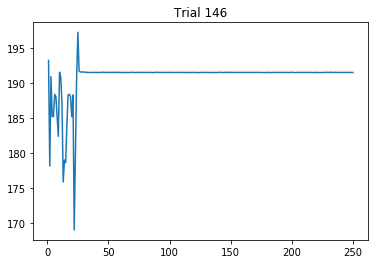

In [12]:
#rewards
plt.plot(list(rewards.keys()), list(rewards.values()))
plt.title('Trial 146')
_=plt.ylim()

In [13]:
import csv
import numpy as np

## Run last simulations after training for plotting
## acknowledgement to https://github.com/miquelbeltran for this plotting idea & code section

done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
rewards_table = []

for i_episode in range(20):

    # Inital State
    state = agent.reset_episode()
    # print("Initial state", state)
    rewards = []

    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        rewards.append(reward)
        state = next_state

        # Write x and xhat for plotting
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])

        if done:
            rewards_table.append(rewards)
            break
        

____
offset reward
1.0
____
offset reward
0.99955445361
____
offset reward
0.998298686942
____
offset reward
0.997308663607
____
offset reward
0.99730862245
____
offset reward
0.998583904891
____
offset reward
0.997032149742
____
offset reward
0.997478746766
____
offset reward
0.997880730116
____
offset reward
0.997304139577
____
offset reward
0.995753204279
____
offset reward
0.995453259684
____
offset reward
0.995502387907
____
offset reward
0.996340543623
____
offset reward
0.997977260835
____
offset reward
0.999166489496
____
offset reward
0.999522871893
____
offset reward
0.999526532193
____
offset reward
0.998938698276
____
offset reward
0.997463794093
____
offset reward
0.99592798338
____
offset reward
0.995161661204
____
offset reward
0.994982693146
____
offset reward
0.995241304746
____
offset reward
0.996320485291
____
offset reward
0.997959544937
____
offset reward
0.999184145843
____
offset reward
0.999665898823
____
offset reward
0.999633068171
____
offset reward
0.9988871

____
offset reward
0.996987860916
____
offset reward
0.995502022949
____
offset reward
0.99461491644
____
offset reward
0.994570636695
____
offset reward
0.995392908219
____
offset reward
0.996851180693
____
offset reward
0.998466674109
____
offset reward
0.999697563642
____
offset reward
0.999844855805
____
offset reward
0.999697377018
____
offset reward
0.99846066766
____
offset reward
0.996843075565
____
offset reward
0.995376848118
____
offset reward
0.994535350645
____
offset reward
0.994584722075
____
offset reward
0.995509994441
____
offset reward
0.997016033236
____
offset reward
0.99861625625
____
offset reward
0.999792097302
____
offset reward
0.999837413135
____
offset reward
0.999607310995
____
offset reward
0.998306248425
____
offset reward
0.996680375279
____
offset reward
0.995257005782
____
offset reward
0.994496245639
____
offset reward
0.994641964294
____
offset reward
0.995651008734
____
offset reward
0.997196385783
____
offset reward
0.99876706475
____
offset reward

____
offset reward
0.999666291344
____
offset reward
0.99881009688
____
offset reward
0.997254741164
____
offset reward
0.995748922316
____
offset reward
0.994917512395
____
offset reward
0.994723694289
____
offset reward
0.995200266051
____
offset reward
0.996526979913
____
offset reward
0.998169955142
____
offset reward
0.999250845793
____
offset reward
0.999632046545
____
offset reward
0.999510809489
____
offset reward
0.998619408328
____
offset reward
0.997008960741
____
offset reward
0.99562129342
____
offset reward
0.995027304485
____
offset reward
0.994937553648
____
offset reward
0.995430790728
____
offset reward
0.996829476135
____
offset reward
0.998440370229
____
offset reward
0.999289218863
____
offset reward
0.999488781206
____
offset reward
0.999353535513
____
offset reward
0.998420075773
____
offset reward
0.99676038426
____
offset reward
0.995551809947
____
offset reward
0.995226726818
____
offset reward
0.995206336496
____
offset reward
0.995702709162
____
offset rewar

____
offset reward
0.999965265872
____
offset reward
0.99996136915
____
offset reward
0.998153053547
____
offset reward
1.0
____
offset reward
0.999545211618
____
offset reward
0.998270555255
____
offset reward
0.997252563199
____
offset reward
0.997252542123
____
offset reward
0.998526166967
____
offset reward
0.996980216631
____
offset reward
0.997422204166
____
offset reward
0.99782625517
____
offset reward
0.997249861204
____
offset reward
0.995699699567
____
offset reward
0.995401808102
____
offset reward
0.995452617673
____
offset reward
0.996298320744
____
offset reward
0.997937693994
____
offset reward
0.999119057512
____
offset reward
0.999470477524
____
offset reward
0.999471335031
____
offset reward
0.998877099573
____
offset reward
0.997399105453
____
offset reward
0.995868948174
____
offset reward
0.995110135017
____
offset reward
0.994934587423
____
offset reward
0.995196310073
____
offset reward
0.996278241515
____
offset reward
0.997915011397
____
offset reward
0.999133

____
offset reward
0.999918214036
____
offset reward
0.999909143503
____
offset reward
0.9988982737
____
offset reward
0.997340841881
____
offset reward
0.99578443613
____
offset reward
0.994747825641
____
offset reward
0.994524090687
____
offset reward
0.995181257773
____
offset reward
0.996543862767
____
offset reward
0.998173955451
____
offset reward
0.999521676704
____
offset reward
0.999844505836
____
offset reward
0.999879835497
____
offset reward
0.998773434201
____
offset reward
0.99718889775
____
offset reward
0.99564878152
____
offset reward
0.994652173399
____
offset reward
0.994515648534
____
offset reward
0.995282641443
____
offset reward
0.996708948837
____
offset reward
0.998334079429
____
offset reward
0.999630340239
____
offset reward
0.999821537226
____
offset reward
0.999800844653
____
offset reward
0.998617986924
____
offset reward
0.997013138101
____
offset reward
0.995507005387
____
offset reward
0.994586451823
____
offset reward
0.994548599909
____
offset reward


____
offset reward
0.997941762027
____
offset reward
0.999208877903
____
offset reward
0.999781126796
____
offset reward
0.999709416585
____
offset reward
0.998858951836
____
offset reward
0.997306420886
____
offset reward
0.995797017628
____
offset reward
0.994960289325
____
offset reward
0.994762610364
____
offset reward
0.995233856686
____
offset reward
0.996555592321
____
offset reward
0.998199830175
____
offset reward
0.999285061579
____
offset reward
0.999669397158
____
offset reward
0.99955195034
____
offset reward
0.998667689652
____
offset reward
0.997061128875
____
offset reward
0.995669705616
____
offset reward
0.995072423791
____
offset reward
0.994980032714
____
offset reward
0.995464775179
____
offset reward
0.996853765106
____
offset reward
0.998465472646
____
offset reward
0.99932162649
____
offset reward
0.999524918336
____
offset reward
0.999395875804
____
offset reward
0.998476859598
____
offset reward
0.996822727877
____
offset reward
0.99560283717
____
offset rewar

____
offset reward
0.997860434113
____
offset reward
0.999232084488
____
offset reward
0.999262114438
____
offset reward
0.999062359096
____
offset reward
0.999108221129
____
offset reward
0.998106144293
____
offset reward
0.996388665979
____
offset reward
0.99590701859
____
offset reward
0.996392925337
____
offset reward
0.996351029603
____
offset reward
0.997117137535
____
offset reward
0.999075446258
____
offset reward
0.999915009199
____
offset reward
0.999411471023
____
offset reward
0.999349762907
____
offset reward
1.0
____
offset reward
0.999566935499
____
offset reward
0.998337314661
____
offset reward
0.997387889332
____
offset reward
0.997386942127
____
offset reward
0.998595152578
____
offset reward
0.997093128943
____
offset reward
0.997477529971
____
offset reward
0.997934151192
____
offset reward
0.997421203554
____
offset reward
0.995837404676
____
offset reward
0.995500716476
____
offset reward
0.995533185351
____
offset reward
0.996315225773
____
offset reward
0.99794

____
offset reward
0.998078627461
____
offset reward
0.999265260864
____
offset reward
0.999748207652
____
offset reward
0.999568312624
____
offset reward
0.998589704786
____
offset reward
0.997002810089
____
offset reward
0.995533888133
____
offset reward
0.994705653913
____
offset reward
0.99457453579
____
offset reward
0.995192000876
____
offset reward
0.996554080244
____
offset reward
0.998174348064
____
offset reward
0.999381897367
____
offset reward
0.999874783183
____
offset reward
0.999584717689
____
offset reward
0.998485989133
____
offset reward
0.996885048624
____
offset reward
0.995417723654
____
offset reward
0.994565454175
____
offset reward
0.994492393347
____
offset reward
0.995242479548
____
offset reward
0.996671159519
____
offset reward
0.998286255637
____
offset reward
0.999502672577
____
offset reward
0.999970492542
____
offset reward
0.999569858691
____
offset reward
0.998376720996
____
offset reward
0.996762559291
____
offset reward
0.995298972815
____
offset rew

____
offset reward
0.994680518317
____
offset reward
0.995742167563
____
offset reward
0.997320635661
____
offset reward
0.998851627092
____
offset reward
0.999833896871
____
offset reward
0.999980546168
____
offset reward
0.999342340087
____
offset reward
0.997948542355
____
offset reward
0.996321486245
____
offset reward
0.995064590547
____
offset reward
0.994522303046
____
offset reward
0.994812371855
____
offset reward
0.995931560611
____
offset reward
0.997541224232
____
offset reward
0.998990823646
____
offset reward
0.999816494524
____
offset reward
0.999903615159
____
offset reward
0.999186194596
____
offset reward
0.997746793416
____
offset reward
0.99614381531
____
offset reward
0.995031694366
____
offset reward
0.994625428202
____
offset reward
0.994963791022
____
offset reward
0.996128945962
____
offset reward
0.997764221604
____
offset reward
0.999103409752
____
offset reward
0.999756359703
____
offset reward
0.99976913497
____
offset reward
0.999031571124
____
offset rewa

____
offset reward
0.995735888475
____
offset reward
0.995599057404
____
offset reward
0.995609369444
____
offset reward
0.995927201756
____
offset reward
0.997334142354
____
offset reward
0.998895214488
____
offset reward
0.999337051385
____
offset reward
0.99923535879
____
offset reward
0.999232929087
____
offset reward
0.998420898742
____
offset reward
0.996715413391
____
offset reward
0.995793322441
____
offset reward
0.995965572826
____
offset reward
0.995990394239
____
offset reward
0.996263043119
____
offset reward
0.997751716059
____
offset reward
0.999208594253
____
offset reward
0.999324152818
____
offset reward
0.999092847465
____
offset reward
0.999162113766
____
offset reward
0.998283086334
____
offset reward
0.996547093704
____
offset reward
0.995927012189
____
offset reward
0.996406811295
____
offset reward
0.996400569027
____
offset reward
0.996968376281
____
offset reward
0.998882475048
____
offset reward
0.999792375192
____
offset reward
0.999999749956
____
offset rew

____
offset reward
0.9947610726
____
offset reward
0.995129520941
____
offset reward
0.996301613135
____
offset reward
0.997934443886
____
offset reward
0.999211633726
____
offset reward
0.999785513722
____
offset reward
0.999701720153
____
offset reward
0.998834912061
____
offset reward
0.997293314759
____
offset reward
0.995762755247
____
offset reward
0.994835969678
____
offset reward
0.994609878949
____
offset reward
0.995120175559
____
offset reward
0.996401290098
____
offset reward
0.998033149163
____
offset reward
0.999328894144
____
offset reward
0.99992462974
____
offset reward
0.999741281614
____
offset reward
0.998736763519
____
offset reward
0.997161396309
____
offset reward
0.995637011539
____
offset reward
0.994690416336
____
offset reward
0.994516350229
____
offset reward
0.995169820525
____
offset reward
0.996540702717
____
offset reward
0.998171011967
____
offset reward
0.999461032373
____
offset reward
0.999973785385
____
offset reward
0.999724192026
____
offset rewar

____
offset reward
0.996390176528
____
offset reward
0.995054471377
____
offset reward
0.994429676977
____
offset reward
0.994698227842
____
offset reward
0.995805434399
____
offset reward
0.997399843012
____
offset reward
0.998908935294
____
offset reward
0.999846372487
____
offset reward
0.999978425377
____
offset reward
0.999248551409
____
offset reward
0.997821845312
____
offset reward
0.996200773598
____
offset reward
0.994979950378
____
offset reward
0.994486956679
____
offset reward
0.994832680348
____
offset reward
0.996001539978
____
offset reward
0.997625547167
____
offset reward
0.999047742831
____
offset reward
0.999828033368
____
offset reward
0.999863628557
____
offset reward
0.999087661795
____
offset reward
0.997612334201
____
offset reward
0.996024729454
____
offset reward
0.994960001474
____
offset reward
0.994604490533
____
offset reward
0.995002631014
____
offset reward
0.996223611936
____
offset reward
0.997864640181
____
offset reward
0.999159066078
____
offset re

____
offset reward
0.999162914786
____
offset reward
0.998115917664
____
offset reward
0.996424820113
____
offset reward
0.995521685995
____
offset reward
0.995492977369
____
offset reward
0.995495173116
____
offset reward
0.996048646263
____
offset reward
0.997652605684
____
offset reward
0.999009797826
____
offset reward
0.999217551572
____
offset reward
0.999148609291
____
offset reward
0.99905277202
____
offset reward
0.997922197146
____
offset reward
0.996241036204
____
offset reward
0.995669646746
____
offset reward
0.995895842668
____
offset reward
0.995858423957
____
offset reward
0.996433898684
____
offset reward
0.998119644998
____
offset reward
0.999259331696
____
offset reward
0.999126720397
____
offset reward
0.999008551018
____
offset reward
0.998971057076
____
offset reward
0.997730054003
____
offset reward
0.996112152612
____
offset reward
0.995939828245
____
offset reward
0.996383749313
____
offset reward
0.996261509363
____
offset reward
0.996910451126
____
offset rew

____
offset reward
0.995218381976
____
offset reward
0.995011160171
____
offset reward
0.995228024218
____
offset reward
0.996246348359
____
offset reward
0.99787952554
____
offset reward
0.999157953166
____
offset reward
0.999683078049
____
offset reward
0.999686148
____
offset reward
0.998999320466
____
offset reward
0.997515341579
____
offset reward
0.995962514822
____
offset reward
0.995066050436
____
offset reward
0.994817228897
____
offset reward
0.995166982166
____
offset reward
0.996320453389
____
offset reward
0.997950618854
____
offset reward
0.999242619394
____
offset reward
0.999832619052
____
offset reward
0.999766164845
____
offset reward
0.998922650725
____
offset reward
0.997395819569
____
offset reward
0.995860570164
____
offset reward
0.994918562254
____
offset reward
0.99467414885
____
offset reward
0.995159193376
____
offset reward
0.996415351909
____
offset reward
0.998040684235
____
offset reward
0.999349588136
____
offset reward
0.999968518878
____
offset reward


____
offset reward
0.998048334652
____
offset reward
0.996421164238
____
offset reward
0.995045942736
____
offset reward
0.994365139597
____
offset reward
0.994599408205
____
offset reward
0.995677375963
____
offset reward
0.997250333422
____
offset reward
0.998797181932
____
offset reward
0.999819477142
____
offset reward
0.999994569529
____
offset reward
0.999292166097
____
offset reward
0.997889518689
____
offset reward
0.996262052089
____
offset reward
0.994959482674
____
offset reward
0.994382874365
____
offset reward
0.994701782048
____
offset reward
0.995847864451
____
offset reward
0.997453365182
____
offset reward
0.998941390374
____
offset reward
0.99983905068
____
offset reward
0.999925181366
____
offset reward
0.999152091165
____
offset reward
0.997701252806
____
offset reward
0.996089603888
____
offset reward
0.994903277528
____
offset reward
0.994452759439
____
offset reward
0.994842808005
____
offset reward
0.996045327069
____
offset reward
0.997671861907
____
offset rew

____
offset reward
0.998854817054
____
offset reward
0.997304193926
____
offset reward
0.99582980257
____
offset reward
0.99513657956
____
offset reward
0.994991720576
____
offset reward
0.995368232299
____
offset reward
0.996650315391
____
offset reward
0.998307026517
____
offset reward
0.999288314839
____
offset reward
0.999546548894
____
offset reward
0.999476945004
____
offset reward
0.998691741372
____
offset reward
0.997077262718
____
offset reward
0.995735722794
____
offset reward
0.995313258324
____
offset reward
0.995265806059
____
offset reward
0.995634641138
____
offset reward
0.996989948328
____
offset reward
0.99860832857
____
offset reward
0.999323733174
____
offset reward
0.999389483495
____
offset reward
0.999330136216
____
offset reward
0.998512340783
____
offset reward
0.996841192641
____
offset reward
0.995701099732
____
offset reward
0.995577590237
____
offset reward
0.99558498142
____
offset reward
0.995934054148
____
offset reward
0.997377696892
____
offset reward

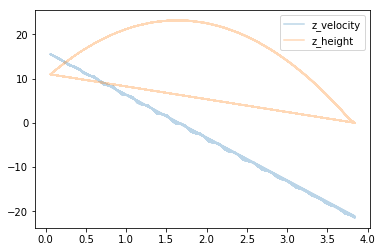

In [15]:
# Plot the results for z and zhat which we are most interested in

import matplotlib.pyplot as plt
%matplotlib inline

# Only Z 
plt.plot(results['time'], results['z_velocity'], label='z_velocity',alpha=0.3)
plt.plot(results['time'], results['z'], label='z_height',alpha=0.3)
plt.legend()
_ = plt.ylim()


**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

Describe the task.

The task set was to hover at the initial position above the ground at 10m.

How did you design the reward function?

Submission3:

Learning and understanding more about the quadcopter frame of reference was useful:
https://charlestytler.com/modeling-vehicle-dynamics-euler-angles/

The reward function took many iterations and was quite tricky. Some of the major themes are listed below.

Details of the trials (experiments) are attached in Quadcopter_Trial_notes.txt (146 trials ++)

what have I learned in designing the reward function?

1. large changes in rewards lead to instability (eg. reward +=2)
2. keep it simple and matched to the objective you want to achieve (minimise difference between actual and target height)
3. the reward function is CRITICAL to the Agent learning
4. too large a reward (including negative) will result in saturation ie. instability where the Agent just alternates between different extreme cases
5. reward functions that vary from 0 to 1 (scaled) work 
6. need a continuous reward function ie. one that penalises / rewards along a continuum rather than discrete steps [4]
7. debugging REALLY helps I added some debug in task.py which helped me understand what was going on in every iteration

The final reward function:

reward = 1 - 0.0067*abs(abs(self.sim.v[:2]).sum() - self.target_pos[:2].sum())

gave a solution in combination with the Agent that did not crash and stayed in the air.

______________________________
1. starting really simply with just a constant.
2. originally using just a proportional reward function ie. if it was in the air then a reward provided
3. then a proportionality away from the target position
4. it kept crashing, so then a penalty for hitting the ground
5. then it kept wanting to decrease it's speed so a penalty for getting too close to the ground
6. then adjusting the reward and penalty parameters
7. then it kept wanting to hit the roof so a penalty for getting too far away
8. changing the reward parameters to include penalties for heights, velocities etc.
9. going back to basics - a simple one based on height difference between the target and actual z_height

How did the reward function help the machine learn?

There is a good description in the paper [4]

Carrot: Positive Reward
By describing a gradually changing reward function (rather than sparse) this assists the Agent learn across a wider range of poses - target positions.

Stick: Disincentive
The reward was designed to extract the Agent out of this state as quickly as possible with a terminal state and large negative penalty.  

Submission 2: updated the reward function with reward = 1.-.003*(abs(self.sim.pose[:3] - self.target_pos)).sum() and it seemed to have more stable performance in terms of minimising large negative jumps.

[4]https://www.bons.ai/blog/deep-reinforcement-learning-models-tips-tricks-for-writing-reward-functions

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

What learning algorithms did you try? What worked best for you?

Submission 3:

for a list of the experiments/trials please refer to Quadcopter_Trial_notes.txt (146++)

The Agent was having numerical stability issues and was not responding well to the input reward function.
So I went back to basics and used a 32/64/32 Adam optimizer and only 3 layers + ReLU for the Agent (Actor, Critic, Action, States)

This helped me to tune the reward function and then I further optimised the original layer architecture to reduce the depth and number of layers. I also reduced the Dropout rate p = 0.1-0.2 which improved performance.

The hyperparameter set was (mu, theta, sigma, gamma, tau) = (0, 0.15, 0.3, 0.99,0.001))

This allowed for noise to prevent local minima and also for some decay over time.

For the layer architecture benefits please see already described information below which was approved.

[Final] Submission 3: Model
********************************************

Actor:

input layer: states

hidden layers:

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(64), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(128), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

final output layer with sigmoid activation

scale to [0 1] to output compatible with the action dimension

Critic:

input layers: states and actions

State pathway hidden layers:

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(64), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

Action pathway hidden layers:

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(64), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(64), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

Combined state and action pathways with relu activation

Added final output later to produce action (Q-values)

Action gradients (dQ/dactions)

____________________________________________________________________________________________
Submission1&2:
I was interested to see the performance of the Actor-Critic RL model so tried this.

What was your final choice of hyperparameters (such as alpha, gamma, epsilon etc.)

The hyperparameter set was (mu, theta, sigma, gamma, tau) = (0, 0.15, 0.2, 0.99,0.01))
I did a sensitivity analysis on the hyperparameters and the most sensitive parameters were:
tau => convergence was affected
gamma => tended to favour the learning in the epoch set depending on this parameter ie. if it was high, would not coverge,
if it were too low then it would favour the start of the learning epochs where it was still learning and not coverge
the other parameters did not seem to affect  the result as much as the reward design.

What NN architecture did you use? Specify layers, sizes, activation functions etc.
I used an Agent with Actor-Critic RL model.  I spent some time reading before creating an initial design (see references below, including reward function)

I initially only used two hidden layers for the action pathway (Critic) but this provided significantly poorer results.

Then I added an additional two hidden layesr for the Critic action pathway and this proved useful.

*Vanishing and Exploding gradients is a possible issue related to numerical stability.

The issue with deep and wide Neural Network designs is that the backprop weights become harder to access leading to numerical instability.
This is what I did in the design to avoid / prevent Vanishing/Exploding gradients. 
Refer to [7] for details.

A. Use of ReLU has improved performance over tanh and sigmoid activation [6]

B. choice of initialisation function of weights affects stability [8]. I experimented with ones and random but the default gave the best performance (glorot)

C. Adam optimizer was chosen as it has momentum like characteristics to avoid local min/max issues [5].

D. L1 and L2 regularisation to avoid overfitting

E. Dropout layers help improve the accuracy and reduce overfitting also [9]


Using simpler functions in the early trials without these additional features to the NN the Agent would tend to "saturate" ie. collect the min/max reward and not continue learning.

Submission 2: Model
********************************************

Actor:

input layer: states

hidden layers:

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(64), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.3)

dense(128), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.4)

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

final output layer with sigmoid activation

scale to [0 1] to output compatible with the action dimension

Critic:

input layers: states and actions

State pathway hidden layers:

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(64), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.3)

dense(128), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.4)

Action pathway hidden layers:

dense(32), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.2)

dense(64), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.3)

Initially these two layers were not included but once added the performance improved.

dense(128), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.4)

dense(128), L2, L1 regularization(0.01), batch normalisation, relu activation, dropout(0.4)

Combined state and action pathways with relu activation

Added final output later to produce action (Q-values)

Action gradients (dQ/dactions)

********************************************

[1]https://towardsdatascience.com/reinforcement-learning-w-keras-openai-actor-critic-models-f084612cfd69

[2]http://www.rage.net/~greg/2016-07-05-ActorCritic-with-OpenAI-Gym.html

[3]https://hackernoon.com/intuitive-rl-intro-to-advantage-actor-critic-a2c-4ff545978752

[4]https://www.bons.ai/blog/deep-reinforcement-learning-models-tips-tricks-for-writing-reward-functions

[5]https://tjmachinelearning.com/lectures/1819/nn3/Neural_Networks_3.pdf

[6]https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/

[7]https://www.dlology.com/blog/how-to-deal-with-vanishingexploding-gradients-in-keras/

[8]https://keras.io/initializers/

[9]http://mipal.snu.ac.kr/images/1/16/Dropout_ACCV2016.pdf

[10]https://www.dlology.com/blog/how-to-deal-with-vanishingexploding-gradients-in-keras/

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

Using the episode rewards plot, discuss how the agent learned over time.

Submission 3:

refer to the reward and z-height graphs above.

The Agent learned quickly and converged.  This was also shown in the z-height and z-velocity graphs which previously showed the following:

1. quadcopter always crashing
2. no difference in path between best and worst episodes

In this submission, the quadcopter is able to not crash and it flies along with a straight trajectory in the majority of cases.  There are further improvements that could be made (z accuracy) but due to time constraints this submission met the rubric requirements.


Was it an easy task to learn or hard?

It's a hard task to learn! the dynamics of the quadcopter come into play, and there are a number of pitfalls that the RL Agent
has to be "helped" with otherwise they will crash the copter in order to maximise the reward.

Was there a gradual learning curve, or an "a-ha" moment?
See above - an "a-ha" moment when it started to optimise around the hover height

How good was the final performance of the agent? (mean rewards over last 10 episodes)
see above





**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

Briefly summarize your experience working on this project.

What was the hardest part of the project?

This was a really hard project ;]

Some of the challenges:
1. I was doing full time work at the same time as the study
2. my major was in EE with lots of comp sci classes, but I hadn't done comp sci. and it was not using Python.
This meant I learned a lot about Python and how it uses object oriented classes/methods/etc.  especially the use of self.foo()
I learned about the deque data structure which was very handy.
3. I didnt realise the sample code was available after the workspace, so just started to software engineer it from scratch.  
I learned a few things from this process:
a) do the design upfront.  provide a picture or other modelling or documentation eg. UML this would have helped my understanding of 
how the Classes should have been best arrranged, esp for Actor-Critic RL and Agent.
b) check the course material before and after the workspace. this meant I could spend more time learning about RL and less about wrangling the code.
4. There was lots of experimentation and altering of the reward function, the Neural Network layer architecture and double-checking.
I would have benefited from visualising what the quadcopter was doing earlier eg. checking the velocities.

Did you find anything interesting in how the quadcopter or your agent behaved?

Yes! A key takeaway for me was that the Agent will do _anything_ that is free to maximise the reward function.
It kind of reminded me of a slack worker or a naughty child that if I forgot to constrain some areas or penalised too harshly then 
it would not converge for example crashing into the ground.

I was reminded of the lecture by Lex Fridman from MIT who showed the RL Agent in one situation playing a boat racing game.
The boat when driven by the RL just kept crashing to pick up points rather than reach the end of the game
https://deeplearning.mit.edu/

Also the quadcopter physics shoudl be taken into account - initially I didn't assume any velocity but having a slight initial vertical velocity helpeed the model converge really quickly - this makes intuitive sense also.  When you see someone flying a drone they apply power to the rotors before letting go to avoid it crashing.
